In [2]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# System and file operations
import os
import sys as SYS
SYS.path.insert(0, '../..')
import csv
from collections import defaultdict

import numpy as np
import pandas as pd
import h5py

from scipy import stats
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.table import Table
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import networkx as nx

# Statistical plotting
import seaborn as sns

from src import setup
from src import (
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation,
    ket as ket
)

from Scripts import simulation_CLI as cleo
#pick={therm,inhomov1,inhomov2,random} pick one of these to properly store images with the correct tick_labels
dataset_label = "therm"
num=12

In [3]:
newdata5_th = dict(h5py.File("../data/unnati_submit_12_therm_strong_max/unnati_submit_12_therm_strong_max.hdf5"))
newdata2_th = dict(h5py.File("../data/unnati_submit_12_therm_greedy/unnati_submit_12_therm_greedy.hdf5"))
newdata3_th = dict(h5py.File("../data/unnati_submit_12_therm_mimic/unnati_submit_12_therm_mimic.hdf5"))
newdata4_th = dict(h5py.File("../data/unnati_submit_12_therm_landmax/unnati_submit_12_therm_landmax.hdf5"))
newdata1_th = dict(h5py.File("../data/unnati_submit_12_therm_random/unnati_submit_12_therm_random.hdf5"))

#newdata5 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_therm/strongmax.hdf5"))
#newdata2 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_therm/greedy.hdf5"))
#newdata3 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_therm/mimic.hdf5"))
#newdata4 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_therm/landmax.hdf5"))
#newdata1 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_therm/random.hdf5"))

newdata5_p = dict(h5py.File("../data/unnati_submit_12_pure_strongmax/unnati_submit_12_pure_strongmax.hdf5"))
newdata2_p = dict(h5py.File("../data/unnati_submit_12_pure_greedy/unnati_submit_12_pure_greedy.hdf5"))
newdata3_p = dict(h5py.File("../data/unnati_submit_12_pure_mimic/unnati_submit_12_pure_mimic.hdf5"))
newdata4_p = dict(h5py.File("../data/unnati_submit_12_pure_landmax/unnati_submit_12_pure_landmax.hdf5"))
newdata1_p = dict(h5py.File("../data/unnati_submit_12_pure_random/unnati_submit_12_pure_random.hdf5"))

#newdata5 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_pure/strongmax.hdf5"))
#newdata2 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_pure/greedy.hdf5"))
##newdata3 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_pure/mimic.hdf5"))
#newdata4 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_pure/landmax.hdf5"))
#newdata1 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_pure/random.hdf5"))

newdata5_v1 = dict(h5py.File("../data/unnati_submit_12_inhomo_v1_strong_max/unnati_submit_12_inhomo_v1_strong_max.hdf5"))
newdata2_v1 = dict(h5py.File("../data/unnati_submit_12_inhomo_v1_greedy/unnati_submit_12_inhomo_v1_greedy.hdf5"))
newdata3_v1 = dict(h5py.File("../data/unnati_submit_12_inhomo_v1_mimic/unnati_submit_12_inhomo_v1_mimic.hdf5"))
newdata4_v1 = dict(h5py.File("../data/unnati_submit_12_inhomo_v1_landmax/unnati_submit_12_inhomo_v1_landmax.hdf5"))
newdata1_v1 = dict(h5py.File("../data/unnati_submit_12_inhomo_v1_random/unnati_submit_12_inhomo_v1_random.hdf5"))

#newdata5 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v1/strongmax.hdf5"))
#newdata2 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v1/greedy.hdf5"))
#newdata3 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v1/mimic.hdf5"))
#newdata4 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v1/landmax.hdf5"))
#newdata1 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v1/random.hdf5"))

newdata5_v2 = dict(h5py.File("../data/unnati_submit_12_inhomo_v2_strongmax/unnati_submit_12_inhomo_v2_strongmax.hdf5"))
newdata2_v2 = dict(h5py.File("../data/unnati_submit_12_inhomo_v2_greedy/unnati_submit_12_inhomo_v2_greedy.hdf5"))
newdata3_v2 = dict(h5py.File("../data/unnati_submit_12_inhomo_v2_mimic/unnati_submit_12_inhomo_v2_mimic.hdf5"))
newdata4_v2 = dict(h5py.File("../data/unnati_submit_12_inhomo_v2_landmax/unnati_submit_12_inhomo_v2_landmax.hdf5"))
newdata1_v2 = dict(h5py.File("../data/unnati_submit_12_inhomo_v2_random/unnati_submit_12_inhomo_v2_random.hdf5"))

#newdata5 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v2/strongmax.hdf5"))
#newdata2 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v2/greedy.hdf5"))
#newdata3 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v2/mimic.hdf5"))
#newdata4 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v2/landmax.hdf5"))
#newdata1 = dict(h5py.File("../data/Sarah_10/unnati_submit_10_inhomo_v2/random.hdf5"))

In [4]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [6]:
pops_random_c2 = get_pops(newdata1, num, "c2_2local", "random")
pops_random_c4 = get_pops(newdata1, num, "c4_2local", "random")
pops_greedy_c2 = get_pops(newdata2, num, "c2_2local", "greedy")
pops_greedy_c4 = get_pops(newdata2, num, "c4_2local", "greedy")
pops_mimic_c2 = get_pops(newdata5, num, "c2_2local", "mimic")
pops_mimic_c4 = get_pops(newdata5, num, "c4_2local", "mimic")
pops_landscape_maximizes_c2 = get_pops(newdata3, num, "c2_2local", "landscape_maximizes")
pops_landscape_maximizes_c4 = get_pops(newdata3, num, "c4_2local", "landscape_maximizes")
pops_strongest_maximizes_c2 = get_pops(newdata4, num, "c2_2local", "strongest_maximizes")
pops_strongest_maximizes_c4 = get_pops(newdata4, num, "c4_2local", "strongest_maximizes")

NameError: name 'newdata1' is not defined

In [6]:
size=12
twoQdmsrandomc2_th = get_2_qbit_dms(newdata1_th,size,"c2_2local","random")
twoQdmsgreedyc2_th = get_2_qbit_dms(newdata2_th,size,"c2_2local","greedy")
twoQdmsmimicc2_th = get_2_qbit_dms(newdata3_th,size,"c2_2local","mimic")
twoQdmslandmaxc2_th = get_2_qbit_dms(newdata4_th,size,"c2_2local","landscape_maximizes")
twoQdmsstrongmaxc2_th = get_2_qbit_dms(newdata5_th,size,"c2_2local","strongest_maximizes")

twoQdmsrandomc2_p = get_2_qbit_dms(newdata1_p,size,"c2_2local","random")
twoQdmsgreedyc2_p = get_2_qbit_dms(newdata2_p,size,"c2_2local","greedy")
twoQdmsmimicc2_p = get_2_qbit_dms(newdata3_p,size,"c2_2local","mimic")
twoQdmslandmaxc2_p = get_2_qbit_dms(newdata4_p,size,"c2_2local","landscape_maximizes")
twoQdmsstrongmaxc2_p = get_2_qbit_dms(newdata5_p,size,"c2_2local","strongest_maximizes")

twoQdmsrandomc2_v1 = get_2_qbit_dms(newdata1_v1,size,"c2_2local","random")
twoQdmsgreedyc2_v1 = get_2_qbit_dms(newdata2_v1,size,"c2_2local","greedy")
twoQdmsmimicc2_v1 = get_2_qbit_dms(newdata3_v1,size,"c2_2local","mimic")
twoQdmslandmaxc2_v1 = get_2_qbit_dms(newdata4_v1,size,"c2_2local","landscape_maximizes")
twoQdmsstrongmaxc2_v1 = get_2_qbit_dms(newdata5_v1,size,"c2_2local","strongest_maximizes")

twoQdmsrandomc2_v2 = get_2_qbit_dms(newdata1_v2,size,"c2_2local","random")
twoQdmsgreedyc2_v2 = get_2_qbit_dms(newdata2_v2,size,"c2_2local","greedy")
twoQdmsmimicc2_v2 = get_2_qbit_dms(newdata3_v2,size,"c2_2local","mimic")
twoQdmslandmaxc2_v2 = get_2_qbit_dms(newdata4_v2,size,"c2_2local","landscape_maximizes")
twoQdmsstrongmaxc2_v2 = get_2_qbit_dms(newdata5_v2,size,"c2_2local","strongest_maximizes")

In [ ]:
size=12
twoQdmsrandomc4_th = get_2_qbit_dms(newdata1_th,size,"c4_2local","random")
twoQdmsgreedyc4_th = get_2_qbit_dms(newdata2_th,size,"c4_2local","greedy")
twoQdmsmimicc4_th = get_2_qbit_dms(newdata3_th,size,"c4_2local","mimic")
twoQdmslandmaxc4_th = get_2_qbit_dms(newdata4_th,size,"c4_2local","landscape_maximizes")
twoQdmsstrongmax2_th = get_2_qbit_dms(newdata5_th,size,"c4_2local","strongest_maximizes")

twoQdmsrandomc4_p = get_2_qbit_dms(newdata1_p,size,"c4_2local","random")
twoQdmsgreedyc4_p = get_2_qbit_dms(newdata2_p,size,"c4_2local","greedy")
twoQdmsmimicc4_p = get_2_qbit_dms(newdata3_p,size,"c4_2local","mimic")
twoQdmslandmaxc4_p = get_2_qbit_dms(newdata4_p,size,"c4_2local","landscape_maximizes")
twoQdmsstrongmax2_p = get_2_qbit_dms(newdata5_p,size,"c4_2local","strongest_maximizes")

twoQdmsrandomc4_v1 = get_2_qbit_dms(newdata1_v1,size,"c4_2local","random")
twoQdmsgreedyc4_v1 = get_2_qbit_dms(newdata2_v1,size,"c4_2local","greedy")
twoQdmsmimicc4_v1 = get_2_qbit_dms(newdata3_v1,size,"c4_2local","mimic")
twoQdmslandmaxc4_v1 = get_2_qbit_dms(newdata4_v1,size,"c4_2local","landscape_maximizes")
twoQdmsstrongmax2_v1 = get_2_qbit_dms(newdata5_v1,size,"c4_2local","strongest_maximizes")

twoQdmsrandomc4_v2 = get_2_qbit_dms(newdata1_v2,size,"c4_2local","random")
twoQdmsgreedyc4_v2 = get_2_qbit_dms(newdata2_v2,size,"c4_2local","greedy")
twoQdmsmimicc4_v2 = get_2_qbit_dms(newdata3_v2,size,"c4_2local","mimic")
twoQdmslandmaxc4_v2 = get_2_qbit_dms(newdata4_v2,size,"c4_2local","landscape_maximizes")
twoQdmsstrongmax2_v2 = get_2_qbit_dms(newdata5_v2,size,"c4_2local","strongest_maximizes")

In [7]:
def extract_observables(two_qubit_dms, n_qubits):
    """
    Extract single-qubit σz expectation values and two-qubit correlations from density matrices.
    
    Args:
        two_qubit_dms: Array of shape (n_trials, n_timesteps, n_pairs) containing dictionaries 
                       with two-qubit density matrices
        n_qubits: Number of qubits in the system
    
    Returns:
        sz: Array of shape (n_trials, n_timesteps, n_qubits) with σz expectation values
        corr: Array of shape (n_trials, n_timesteps, n_qubits, n_qubits) with σz-σz correlations
    """
    n_trials = two_qubit_dms.shape[0]
    n_timesteps = two_qubit_dms.shape[1]
    
    # Pauli Z matrix
    pauli_z = np.array([[1, 0], [0, -1]], dtype=complex)
    pauli_z_tensor = np.kron(pauli_z, pauli_z)
    
    # Initialize arrays as complex to avoid casting warnings
    sz = np.zeros((n_trials, n_timesteps, n_qubits), dtype=complex)
    corr = np.zeros((n_trials, n_timesteps, n_qubits, n_qubits), dtype=complex)
    
    # For each trial and timestep
    for trial in range(n_trials):
        for t in range(n_timesteps):
            # Count how many times each qubit appears to average properly
            counts = np.zeros(n_qubits)
            
            # For each qubit pair
            for pair, dm in two_qubit_dms[trial, t].items():
                i, j = pair
                
                # Get density matrix as numpy array
                rho = dm.data
                
                # Calculate local observables
                sz_i = np.trace(rho @ np.kron(pauli_z, np.eye(2, dtype=complex)))
                sz_j = np.trace(rho @ np.kron(np.eye(2, dtype=complex), pauli_z))
                
                # Calculate correlation
                corr_ij = np.trace(rho @ pauli_z_tensor) - sz_i * sz_j
                
                # Update counts
                counts[i] += 1
                counts[j] += 1
                
                # Update expectation values (will average later)
                sz[trial, t, i] += sz_i
                sz[trial, t, j] += sz_j
                
                # Store correlation
                corr[trial, t, i, j] = corr_ij
                corr[trial, t, j, i] = corr_ij
            
            # Average the expectation values
            for i in range(n_qubits):
                if counts[i] > 0:
                    sz[trial, t, i] /= counts[i]
    
    # Take real parts at the end - for Hermitian observables like Pauli-Z
    # the expectation values should be real, with any imaginary component
    # coming from numerical imprecision
    return sz.real, corr.real
    
    return sz, corr

def analyze_light_cone(corr, distances, thresholds=[0.05, 0.1, 0.2]):
    """
    Analyze correlation spreading and extract light cone.
    
    Args:
        corr: Array of shape (n_trials, n_timesteps, n_qubits, n_qubits) with correlations
        distances: Matrix of shape (n_qubits, n_qubits) with distances between qubits
        thresholds: List of correlation thresholds to define the light cone boundary
    
    Returns:
        light_cone_data: Dictionary with light cone analysis results
    """
    n_trials, n_timesteps, n_qubits, _ = corr.shape
    max_distance = int(np.max(distances))
    
    # Average over trials
    avg_corr = np.mean(np.abs(corr), axis=0)
    
    # For each distance, average the correlation magnitude
    light_cone = np.zeros((max_distance + 1, n_timesteps))
    counts = np.zeros(max_distance + 1)
    
    for d in range(max_distance + 1):
        mask = (distances == d)
        if np.any(mask):
            for t in range(n_timesteps):
                light_cone[d, t] = np.mean(np.abs(avg_corr[t][mask]))
            counts[d] = np.sum(mask)
    
    # Extract light cone velocities for different thresholds
    velocities = {}
    fronts = {}
    
    for threshold in thresholds:
        # Find maximum distance where correlation exceeds threshold
        front = np.zeros(n_timesteps)
        for t in range(n_timesteps):
            for d in range(max_distance, -1, -1):
                if light_cone[d, t] > threshold:
                    front[t] = d
                    break
        
        # Fit linear model to find velocity, only using data after state-dependent rules kick in
        times = np.arange(10, n_timesteps)
        if len(times) > 0 and np.any(front[times] > 0):
            # Linear fit: d = v*t + d0
            def linear_func(t, v, d0):
                return v * t + d0
            
            try:
                popt, _ = curve_fit(linear_func, times, front[times], 
                                   p0=[1.0, 0.0],
                                   bounds=([0, -np.inf], [np.inf, np.inf]))
                velocity, intercept = popt
                velocities[threshold] = velocity
                fronts[threshold] = front
            except:
                velocities[threshold] = None
                fronts[threshold] = front
    
    light_cone_data = {
        'light_cone_matrix': light_cone,
        'threshold_velocities': velocities,
        'threshold_fronts': fronts
    }
    
    return light_cone_data

def plot_light_cone(light_cone_data, post_random=10):
    """
    Plot light cone visualization and extract velocity.
    
    Args:
        light_cone_data: Dictionary from analyze_light_cone
        post_random: Time step when state-dependent rules start
    """
    plt.figure(figsize=(10, 8))
    n_timesteps=490
    
    # Plot heatmap
    plt.subplot(2, 1, 1)
    plt.imshow(light_cone_data['light_cone_matrix'], aspect='auto', origin='lower', 
              cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Average correlation magnitude')
    plt.axvline(x=post_random, color='r', linestyle='--', 
               label=f'State-dependent rules start (t={post_random})')
    plt.xlabel('Time step')
    plt.ylabel('Distance')
    plt.title('Correlation Light Cone')
    plt.legend()
    
    # Plot threshold fronts
    #plt.subplot(2, 1, 2)
    #for threshold, front in light_cone_data['threshold_fronts'].items():
    #    plt.plot(front, label=f'Threshold = {threshold}')
        
        # Add velocity information if available
    #    if light_cone_data['threshold_velocities'][threshold] is not None:
    #        velocity = light_cone_data['threshold_velocities'][threshold]
    #        plt.annotate(f'v ≈ {velocity:.3f}', 
    #                   xy=(n_timesteps * 0.7, front[-30]), 
    #                   xytext=(n_timesteps * 0.7, front[-30] + 1),
    #                   arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
   # 
    #plt.axvline(x=post_random, color='r', linestyle='--')
    #plt.xlabel('Time step')
    #plt.ylabel('Maximum distance with correlation > threshold')
    #plt.title('Light Cone Front Propagation')
    #plt.legend()
    #plt.tight_layout()
    
    return plt.gcf()


    
def analyze_chaos_indicators(corr, sz, n_timesteps_plot=10, thresholds=[0.05, 0.1, 0.2]):
    """
    Compute quantum chaos indicators from correlations.
    
    Args:
        corr: Array of shape (n_trials, n_timesteps, n_qubits, n_qubits) with correlations
        sz: Array of shape (n_trials, n_timesteps, n_qubits) with σz expectation values
        n_timesteps_plot: Number of timesteps to plot level statistics for
    
    Returns:
        chaos_data: Dictionary with chaos analysis results
    """
    n_trials, n_timesteps, n_qubits, _ = corr.shape
    
    # Average over trials
    avg_corr = np.mean(corr, axis=0)
    avg_sz = np.mean(sz, axis=0)
    
    # Level spacing statistics data
    timesteps_to_analyze = np.linspace(0, n_timesteps-1, n_timesteps_plot, dtype=int)
    level_statistics = {}
    
    for t in timesteps_to_analyze:
        # Create correlation matrix
        corr_matrix = avg_corr[t]
        
        # Get eigenvalues
        try:
            eigenvalues = np.linalg.eigvalsh(corr_matrix)
            eigenvalues = eigenvalues[~np.isclose(eigenvalues, 0)]  # Remove near-zero eigenvalues
            
            # Calculate level spacings
            if len(eigenvalues) > 1:
                eigenvalues = np.sort(eigenvalues)
                spacings = eigenvalues[1:] - eigenvalues[:-1]
                
                # Normalize spacings
                if len(spacings) > 0 and np.mean(spacings) > 0:
                    normalized_spacings = spacings / np.mean(spacings)
                    level_statistics[t] = normalized_spacings
        except:
            pass
    
    # Correlation decay and quantum chaos metrics
    decay_metrics = {}
    
    # Calculate average correlation magnitude over time
    avg_corr_mag = np.zeros(n_timesteps)
    for t in range(n_timesteps):
        # Remove diagonal elements
        off_diag_mask = ~np.eye(n_qubits, dtype=bool)
        avg_corr_mag[t] = np.mean(np.abs(avg_corr[t][off_diag_mask]))
    
    decay_metrics['avg_corr_magnitude'] = avg_corr_mag
    
    # Calculate approximate scrambling time
    # (time for correlations to decay to 1/e of initial value)
    if avg_corr_mag[0] > 0:
        threshold = avg_corr_mag[0] / np.e
        scrambling_time = None
        for t in range(1, n_timesteps):
            if avg_corr_mag[t] <= threshold:
                scrambling_time = t
                break
        decay_metrics['scrambling_time'] = scrambling_time
    
    # Calculate scrambling time based on multiple thresholds
    scrambling_times = {}
    if avg_corr_mag[0] > 0:
        thresholds = [0.5, 0.3, 0.1]  # Different decay thresholds (50%, 30%, 10%)
        for threshold_factor in thresholds:
            threshold = avg_corr_mag[0] * threshold_factor
            time_to_threshold = None
            for t in range(1, n_timesteps):
                if avg_corr_mag[t] <= threshold:
                    time_to_threshold = t
                    break
            scrambling_times[f'time_to_{int(threshold_factor*100)}pct'] = time_to_threshold
    
    decay_metrics['detailed_scrambling_times'] = scrambling_times
    
    # Compute OTOC-like quantities
    # Use correlations as proxies for operator growth
    otoc_data = {}
    
    # Calculate growth of correlations (proxy for operator spreading)
    # For each qubit pair, track how correlation grows over time
    otoc_growth_rates = np.zeros((n_qubits, n_qubits))
    otoc_saturation_times = np.zeros((n_qubits, n_qubits))
    
    for i in range(n_qubits):
        for j in range(n_qubits):
            if i != j:
                # Extract correlation time series for this qubit pair
                corr_timeseries = np.abs(avg_corr[:, i, j])
                
                # Find maximum correlation value and when it's reached
                max_corr = np.max(corr_timeseries)
                max_corr_time = np.argmax(corr_timeseries)
                
                # Estimate growth rate (if enough data points)
                if max_corr_time > 0:
                    # Simple linear approximation of initial growth rate
                    growth_rate = max_corr / max_corr_time if max_corr_time > 0 else 0
                    otoc_growth_rates[i, j] = growth_rate
                    otoc_saturation_times[i, j] = max_corr_time
    
    # Average OTOC metrics across qubit pairs
    otoc_data['avg_growth_rate'] = np.mean(otoc_growth_rates[otoc_growth_rates > 0])
    otoc_data['avg_saturation_time'] = np.mean(otoc_saturation_times[otoc_saturation_times > 0])
    
    # Compute spatial propagation of correlations
    # Assuming qubits are arranged in a line for simplicity
    # If different topology, this needs adjustment
    otoc_velocities = []
    
    for t in range(1, n_timesteps):
        # For each reference qubit
        for i in range(n_qubits):
            # Find the furthest qubit with correlation above threshold
            threshold = 0.05 * np.max(np.abs(avg_corr[t]))
            max_distance = 0
            
            for j in range(n_qubits):
                if i != j and np.abs(avg_corr[t, i, j]) > threshold:
                    distance = abs(i - j)  # Linear distance (adapt for your topology)
                    max_distance = max(max_distance, distance)
            
            # Approximate velocity as distance/time
            if t > 0 and max_distance > 0:
                velocity = max_distance / t
                otoc_velocities.append(velocity)
    
    if otoc_velocities:
        otoc_data['butterfly_velocity'] = np.mean(otoc_velocities)
    else:
        otoc_data['butterfly_velocity'] = None
    
    # Calculate information scrambling metric based on correlation pattern
    # Compute entropy of the correlation matrix as a scrambling measure
    correlation_entropies = np.zeros(n_timesteps)
    
    for t in range(n_timesteps):
        # Normalize correlation matrix to be probability-like
        norm_corr = np.abs(avg_corr[t])
        total = np.sum(norm_corr)
        
        if total > 0:
            prob_like = norm_corr / total
            # Calculate entropy (avoiding log(0))
            entropy = -np.sum(prob_like * np.log2(prob_like + 1e-10))
            correlation_entropies[t] = entropy
    
    otoc_data['correlation_entropy'] = correlation_entropies
    
    # Add OTOC data to chaos data
    chaos_data = {
        'level_statistics': level_statistics,
        'decay_metrics': decay_metrics,
        'otoc_metrics': otoc_data
    }
    
    return chaos_data
def plot_chaos_data(chaos_data, start_from=10):
    """
    Plot the chaos data metrics starting from a specific timestep, focusing on
    scrambling times, correlation magnitude, and OTOC metrics.
    
    Args:
        chaos_data: Dictionary with chaos analysis results from analyze_chaos_indicators
        start_from: First timestep to include in the plot (default: 10)
    """
    # Extract necessary data
    decay_metrics = chaos_data['decay_metrics']
    otoc_metrics = chaos_data['otoc_metrics']
    
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(12, 15))
    
    # 1. Plot average correlation magnitude
    ax1 = fig.add_subplot(3, 1, 1)
    avg_corr_magnitude = decay_metrics['avg_corr_magnitude']
    time = np.arange(len(avg_corr_magnitude))
    
    # Slice the data to start from desired timestep
    time_sliced = time[start_from:]
    avg_corr_magnitude_sliced = avg_corr_magnitude[start_from:]
    
    ax1.plot(time_sliced, avg_corr_magnitude_sliced, 'b-', linewidth=2)
    ax1.set_xlabel('Timestep')
    ax1.set_ylabel('Average Correlation Magnitude')
    ax1.set_title('Correlation Decay (from t=10)')
    
    # Mark scrambling time if it exists and is after start_from
    if 'scrambling_time' in decay_metrics and decay_metrics['scrambling_time'] is not None:
        scrambling_time = decay_metrics['scrambling_time']
        if scrambling_time >= start_from:
            threshold = decay_metrics['avg_corr_magnitude'][0] / np.e
            ax1.axhline(y=threshold, color='r', linestyle='--', alpha=0.7, 
                        label=f'1/e threshold: {threshold:.4f}')
            ax1.axvline(x=scrambling_time, color='g', linestyle='--', alpha=0.7,
                        label=f'Scrambling time: {scrambling_time}')
            ax1.legend()
    ax1.grid(True)
    
    # 2. Plot detailed scrambling times
    ax2 = fig.add_subplot(3, 1, 2)
    if 'detailed_scrambling_times' in decay_metrics:
        scrambling_times = decay_metrics['detailed_scrambling_times']
        
        # Create bar chart of detailed scrambling times
        thresholds = []
        times = []
        
        for key, value in scrambling_times.items():
            if value is not None and value >= start_from:
                # Extract percentage from key (e.g., 'time_to_50pct' -> '50%')
                pct = key.split('_')[-1].replace('pct', '%')
                thresholds.append(pct)
                times.append(value)
        
        if thresholds:  # Only plot if we have valid data
            ax2.bar(thresholds, times, color='teal', alpha=0.7)
            ax2.set_xlabel('Threshold')
            ax2.set_ylabel('Timestep')
            ax2.set_title('Detailed Scrambling Times')
            
            # Add values on top of bars
            for i, v in enumerate(times):
                ax2.text(i, v + 0.5, str(v), ha='center')
        else:
            ax2.text(0.5, 0.5, 'No detailed scrambling times after t=10',
                    horizontalalignment='center', verticalalignment='center',
                    transform=ax2.transAxes)
    else:
        ax2.text(0.5, 0.5, 'No detailed scrambling times data available',
                horizontalalignment='center', verticalalignment='center',
                transform=ax2.transAxes)
    ax2.grid(True)
    
    # 3. Plot OTOC metrics
    ax3 = fig.add_subplot(3, 1, 3)
    
    # Plot correlation entropy
    if 'correlation_entropy' in otoc_metrics:
        correlation_entropy = otoc_metrics['correlation_entropy']
        entropy_sliced = correlation_entropy[start_from:]
        ax3.plot(time_sliced, entropy_sliced, 'r-', linewidth=2, label='Correlation Entropy')
    
    # Add butterfly velocity as text annotation
    if 'butterfly_velocity' in otoc_metrics and otoc_metrics['butterfly_velocity'] is not None:
        butterfly_velocity = otoc_metrics['butterfly_velocity']
        ax3.text(0.05, 0.95, f'Butterfly Velocity: {butterfly_velocity:.4f}',
                transform=ax3.transAxes, fontsize=10, 
                bbox=dict(facecolor='yellow', alpha=0.5))
    
    # Add growth rate and saturation time as text annotation
    text_info = []
    if 'avg_growth_rate' in otoc_metrics and otoc_metrics['avg_growth_rate'] is not None:
        text_info.append(f'Avg Growth Rate: {otoc_metrics["avg_growth_rate"]:.4f}')
    if 'avg_saturation_time' in otoc_metrics and otoc_metrics['avg_saturation_time'] is not None:
        text_info.append(f'Avg Saturation Time: {otoc_metrics["avg_saturation_time"]:.1f}')
    
    if text_info:
        ax3.text(0.05, 0.85, '\n'.join(text_info), transform=ax3.transAxes, 
                fontsize=10, bbox=dict(facecolor='lightgreen', alpha=0.5))
    
    ax3.set_xlabel('Timestep')
    ax3.set_ylabel('Value')
    ax3.set_title('OTOC Metrics')
    ax3.legend(loc='upper right')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

def perform_fourier_analysis(sz, dt=1.0):
    """
    Perform Fourier analysis on the time evolution.
    
    Args:
        sz: Array of shape (n_trials, n_timesteps, n_qubits) with σz expectation values
        dt: Time step size
    
    Returns:
        fourier_data: Dictionary with Fourier analysis results
    """
    n_trials, n_timesteps, n_qubits = sz.shape
    
    # Average over trials
    avg_sz = np.mean(sz, axis=0)
    
    # Generate frequency axis
    freqs = fftfreq(n_timesteps, d=dt)
    positive_freq_idx = np.arange(1, n_timesteps//2)  # Skip DC component (0 freq)
    
    # Compute FFT for each qubit
    fft_magnitudes = np.zeros((n_qubits, len(positive_freq_idx)))
    for i in range(n_qubits):
        signal = avg_sz[:, i]
        # Remove mean
        signal = signal - np.mean(signal)
        # Apply window to reduce spectral leakage
        window = np.blackman(n_timesteps)
        windowed_signal = signal * window
        # Compute FFT
        signal_fft = fft(windowed_signal)
        # Store magnitude of positive frequencies
        fft_magnitudes[i] = np.abs(signal_fft[positive_freq_idx])
    
    # Compute total power across all qubits
    total_power = np.sum(fft_magnitudes, axis=0)
    
    # Find dominant frequencies
    peaks, properties = find_peaks(total_power, height=0.1*np.max(total_power))
    dominant_freqs = freqs[positive_freq_idx[peaks]]
    dominant_powers = total_power[peaks]
    
    # Sort by power
    sort_idx = np.argsort(dominant_powers)[::-1]
    dominant_freqs = dominant_freqs[sort_idx]
    dominant_powers = dominant_powers[sort_idx]
    
    fourier_data = {
        'frequencies': freqs[positive_freq_idx],
        'qubit_fft_magnitudes': fft_magnitudes,
        'total_power': total_power,
        'dominant_frequencies': dominant_freqs,
        'dominant_powers': dominant_powers
    }
    
    return fourier_data

def plot_fourier_analysis(fourier_data, n_qubits_plot=5):
    """
    Plot Fourier analysis results.
    
    Args:
        fourier_data: Dictionary from perform_fourier_analysis
        n_qubits_plot: Number of qubits to show individual spectra for
    """
    plt.figure(figsize=(12, 8))
    
    # Plot spectra for individual qubits
    plt.subplot(2, 1, 1)
    for i in range(min(n_qubits_plot, fourier_data['qubit_fft_magnitudes'].shape[0])):
        plt.plot(fourier_data['frequencies'], fourier_data['qubit_fft_magnitudes'][i], 
                alpha=0.7, label=f'Qubit {i}')
    
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Fourier Spectra for Individual Qubits')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot total power spectrum and mark dominant frequencies
    plt.subplot(2, 1, 2)
    plt.plot(fourier_data['frequencies'], fourier_data['total_power'], 'k-')
    
    # Mark dominant frequencies
    for i, (freq, power) in enumerate(zip(fourier_data['dominant_frequencies'], 
                                        fourier_data['dominant_powers'])):
        plt.plot([freq, freq], [0, power], 'r--', alpha=0.7)
        if i < 5:  # Label only the top 5
            plt.text(freq, power, f'{freq:.3f}', ha='center', va='bottom')
    
    plt.xlabel('Frequency')
    plt.ylabel('Total Power')
    plt.title('Total Power Spectrum with Dominant Frequencies')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return plt.gcf()

def run_full_analysis(two_qubit_dms, n_qubits, distances=None, post_random=10, dt=1.0):
    """
    Run the complete analysis pipeline.
    
    Args:
        two_qubit_dms: Array of shape (n_trials, n_timesteps, n_pairs) containing dictionaries 
                      with two-qubit density matrices
        n_qubits: Number of qubits in the system
        distances: Matrix of shape (n_qubits, n_qubits) with distances between qubits.
                  If None, assumes 1D chain.
        post_random: Time step when state-dependent rules start
        dt: Time step size for Fourier analysis
    
    Returns:
        analysis_results: Dictionary with all analysis results
    """
    # Extract observables
    print("Extracting observables from density matrices...")
    sz, corr = extract_observables(two_qubit_dms, n_qubits)
    
    # Create distance matrix if not provided
    if distances is None:
        distances = np.zeros((n_qubits, n_qubits))
        for i in range(n_qubits):
            for j in range(n_qubits):
                distances[i, j] = abs(i - j)
    
    # Analyze light cone
    print("Analyzing correlation spreading and light cone...")
    light_cone_data = analyze_light_cone(corr, distances)
    light_cone_plot = plot_light_cone(light_cone_data, post_random)
    
    # Analyze quantum chaos indicators
    print("Analyzing quantum chaos indicators...")
    chaos_data = analyze_chaos_indicators(corr, sz)
    chaos_plot = plot_chaos_indicators(chaos_data, post_random)
    
    # Perform Fourier analysis
    print("Performing Fourier analysis...")
    fourier_data = perform_fourier_analysis(sz, dt)
    fourier_plot = plot_fourier_analysis(fourier_data)
    
    # Collect results
    analysis_results = {
        'observables': {
            'sz': sz,
            'corr': corr
        },
        'light_cone': light_cone_data,
        'chaos': chaos_data,
        'fourier': fourier_data,
        'plots': {
            'light_cone': light_cone_plot,
            'chaos': chaos_plot,
            'fourier': fourier_plot
        }
    }
    
    return analysis_results

# Example usage:
# Assuming we have two_qubit_dms and n_qubits
# results = run_full_analysis(two_qubit_dms, n_qubits)
# plt.show()

In [8]:
def analyze_correlation_strength(corr):
    """
    Analyze the strength of correlations in the quantum system to determine
    appropriate thresholds.
    
    Args:
        corr: Array of shape (n_trials, n_timesteps, n_qubits, n_qubits) with correlations
             Can also be a tuple where the second element is the correlation array
    
    Returns:
        stats_dict: Dictionary with correlation statistics
        fig: Figure with correlation analysis plots
    """
    # Handle case where input might be a tuple from extract_observables
    if isinstance(corr, tuple) and len(corr) == 2:
        # Extract just the correlations (second element)
        corr = corr[1]
    
    # Get dimensions
    n_trials, n_timesteps, n_qubits, _ = corr.shape
    
    # Calculate correlation magnitudes (absolute values)
    corr_abs = np.abs(corr)
    
    # Average over trials
    avg_corr_abs = np.mean(corr_abs, axis=0)
    
    # Create mask to exclude self-correlations (diagonal elements)
    mask = ~np.eye(n_qubits, dtype=bool)
    mask_3d = np.broadcast_to(mask, (n_timesteps, n_qubits, n_qubits))
    
    # Extract off-diagonal elements for each time step
    off_diag_values = []
    for t in range(n_timesteps):
        off_diag_values.append(avg_corr_abs[t][mask])
    
    # Calculate statistics for each time step
    means = np.array([np.mean(vals) for vals in off_diag_values])
    medians = np.array([np.median(vals) for vals in off_diag_values])
    max_vals = np.array([np.max(vals) for vals in off_diag_values])
    percentile_75 = np.array([np.percentile(vals, 75) for vals in off_diag_values])
    percentile_90 = np.array([np.percentile(vals, 90) for vals in off_diag_values])
    
    # Calculate overall statistics
    overall_stats = {
        'mean': np.mean(means[250:]),
        'median': np.median(medians),
        'max': np.max(max_vals),
        'p75': np.mean(percentile_75),
        'p90': np.mean(percentile_90)
    }
    
    # Create recommended thresholds based on distribution
    recommended_thresholds = [
        overall_stats['p75'] * 0.5,  # Conservative threshold
        overall_stats['p75'],        # Moderate threshold
        overall_stats['p90']         # Stringent threshold
    ]
    
    # Round thresholds to 3 decimal places for clarity
    recommended_thresholds = [round(t, 3) for t in recommended_thresholds]
    
    # Determine correlation strength category
    if overall_stats['max'] < 0.1:
        strength_category = "Weak"
    elif overall_stats['max'] < 0.3:
        strength_category = "Moderate"
    else:
        strength_category = "Strong"
    
    # Create figure with multiple plots
    fig = plt.figure(figsize=(15, 10))
    
    # Plot 1: Correlation magnitude distribution (histogram)
    plt.subplot(2, 2, 1)
    # Flatten all off-diagonal correlations from all time steps
    all_corrs = np.concatenate(off_diag_values)
    sns.histplot(all_corrs, bins=30, kde=True)
    
    # Add vertical lines for recommended thresholds
    for threshold in recommended_thresholds:
        plt.axvline(x=threshold, color='r', linestyle='--', 
                   alpha=0.7, label=f'Threshold: {threshold:.3f}')
    
    plt.xlabel('Correlation Magnitude')
    plt.ylabel('Frequency')
    plt.title('Distribution of Correlation Magnitudes')
    plt.legend()
    
    # Plot 2: Correlation statistics over time
    plt.subplot(2, 2, 2)
    plt.plot(means, label='Mean')
    plt.plot(medians, label='Median')
    plt.plot(max_vals, label='Max')
    plt.plot(percentile_75, label='75th Percentile')
    plt.plot(percentile_90, label='90th Percentile')
    
    plt.xlabel('Time Step')
    plt.ylabel('Correlation Magnitude')
    plt.title('Correlation Statistics Over Time')
    plt.legend()
    
    # Plot 3: Box plot of correlation magnitudes at select time steps
    plt.subplot(2, 2, 3)
    # Select a subset of time steps for clarity
    time_indices = np.linspace(0, n_timesteps-1, min(10, n_timesteps), dtype=int)
    box_data = [off_diag_values[t] for t in time_indices]
    plt.boxplot(box_data, tick_labels=[f't={t}' for t in time_indices])
    plt.ylabel('Correlation Magnitude')
    plt.title('Correlation Distribution at Selected Time Steps')
    plt.xticks(rotation=45)
    
    # Plot 4: Heatmap of average correlation by distance and time
    plt.subplot(2, 2, 4)
    # Create simple distance matrix for 1D chain (can be replaced with actual distances)
    distances = np.zeros((n_qubits, n_qubits))
    for i in range(n_qubits):
        for j in range(n_qubits):
            distances[i, j] = abs(i - j)
    
    # Calculate average correlation by distance
    max_dist = int(np.max(distances))
    dist_corr = np.zeros((max_dist+1, n_timesteps))
    
    for d in range(1, max_dist+1):  # Skip d=0 (self correlations)
        mask_d = (distances == d)
        for t in range(n_timesteps):
            values = avg_corr_abs[t][mask_d]
            if len(values) > 0:
                dist_corr[d, t] = np.mean(values)
    
    # Plot heatmap
    im = plt.imshow(dist_corr[1:], aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(im, label='Average Correlation Magnitude')
    plt.xlabel('Time Step')
    plt.ylabel('Distance')
    plt.title('Average Correlation by Distance and Time')
    
    # Add text with overall statistics and recommendations
    plt.figtext(0.5, 0.01, 
               f"Overall Correlation Strength: {strength_category}\n"
               f"Mean: {overall_stats['mean']:.3f} | Max: {overall_stats['max']:.3f} | "
               f"75th Percentile: {overall_stats['p75']:.3f} | 90th Percentile: {overall_stats['p90']:.3f}\n"
               f"Recommended Thresholds: {recommended_thresholds}",
               ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust for the figtext
    plt.savefig('Correlations_statistics_therm.png')
    
    # Prepare statistics dictionary for return
    stats_dict = {
        'overall': overall_stats,
        'by_time': {
            'mean': means,
            'median': medians,
            'max': max_vals,
            'p75': percentile_75,
            'p90': percentile_90
        },
        'strength_category': strength_category,
        'recommended_thresholds': recommended_thresholds
    }
    
    return stats_dict, fig

# Example usage
#stats, fig = analyze_correlation_strength(corr_random_c2_th)
#plt.show()
# print(f"Recommended thresholds: {stats['recommended_thresholds']}")

In [10]:
corr_random_c2_th = extract_observables(twoQdmsrandomc2_th, 12)
corr_greedy_c2_th = extract_observables(twoQdmsgreedyc2_th, 12)
corr_landmax_c2_th = extract_observables(twoQdmslandmaxc2_th, 12)
corr_strongmax_c2_th = extract_observables(twoQdmsstrongmaxc2_th, 12)
corr_mimic_c2_th = extract_observables(twoQdmsmimicc2_th, 12)

corr_random_c2_p = extract_observables(twoQdmsrandomc2_p, 12)
corr_greedy_c2_p = extract_observables(twoQdmsgreedyc2_p, 12)
corr_landmax_c2_p = extract_observables(twoQdmslandmaxc2_p, 12)
corr_strongmax_c2_p = extract_observables(twoQdmsstrongmaxc2_p, 12)
corr_mimic_c2_p = extract_observables(twoQdmsmimicc2_p, 12)

corr_random_c2_v1 = extract_observables(twoQdmsrandomc2_v1, 12)
corr_greedy_c2_v1 = extract_observables(twoQdmsgreedyc2_v1, 12)
corr_landmax_c2_v1 = extract_observables(twoQdmslandmaxc2_v1, 12)
corr_strongmax_c2_v1 = extract_observables(twoQdmsstrongmaxc2_v1, 12)
corr_mimic_c2_v1 = extract_observables(twoQdmsmimicc2_v1, 12)

corr_random_c2_v2 = extract_observables(twoQdmsrandomc2_v2, 12)
corr_greedy_c2_v2 = extract_observables(twoQdmsgreedyc2_v2, 12)
corr_landmax_c2_v2 = extract_observables(twoQdmslandmaxc2_v2, 12)
corr_strongmax_c2_v2 = extract_observables(twoQdmsstrongmaxc2_v2, 12)
corr_mimic_c2_v2 = extract_observables(twoQdmsmimicc2_v2, 12)

In [ ]:
corr_random_c4_th = extract_observables(twoQdmsrandomc4_th, 12)
corr_greedy_c4_th = extract_observables(twoQdmsgreedyc4_th, 12)
corr_landmax_c4_th = extract_observables(twoQdmslandmaxc4_th, 12)
corr_strongmax_c4_th = extract_observables(twoQdmsstrongmax2_th, 12)
corr_mimic_c4_th = extract_observables(twoQdmsmimicc4_th, 12)

corr_random_c4_p = extract_observables(twoQdmsrandomc4_p, 12)
corr_greedy_c4_p = extract_observables(twoQdmsgreedyc4_p, 12)
corr_landmax_c4_p = extract_observables(twoQdmslandmaxc4_p, 12)
corr_strongmax_c4_p = extract_observables(twoQdmsstrongmax2_p, 12)
corr_mimic_c4_p = extract_observables(twoQdmsmimicc4_p, 12)

corr_random_c4_v1 = extract_observables(twoQdmsrandomc4_v1, 12)
corr_greedy_c4_v1 = extract_observables(twoQdmsgreedyc4_v1, 12)
corr_landmax_c4_v1 = extract_observables(twoQdmslandmaxc4_v1, 12)
corr_strongmax_c4_v1 = extract_observables(twoQdmsstrongmax2_v1, 12)
corr_mimic_c4_v1 = extract_observables(twoQdmsmimicc4_v1, 12)

corr_random_c4_v2 = extract_observables(twoQdmsrandomc4_v2, 12)
corr_greedy_c4_v2 = extract_observables(twoQdmsgreedyc4_v2, 12)
corr_landmax_c4_v2 = extract_observables(twoQdmslandmaxc4_v2, 12)
corr_strongmax_c4_v2 = extract_observables(twoQdmsstrongmax2_v2, 12)
corr_mimic_c4_v2 = extract_observables(twoQdmsmimicc4_v2, 12)

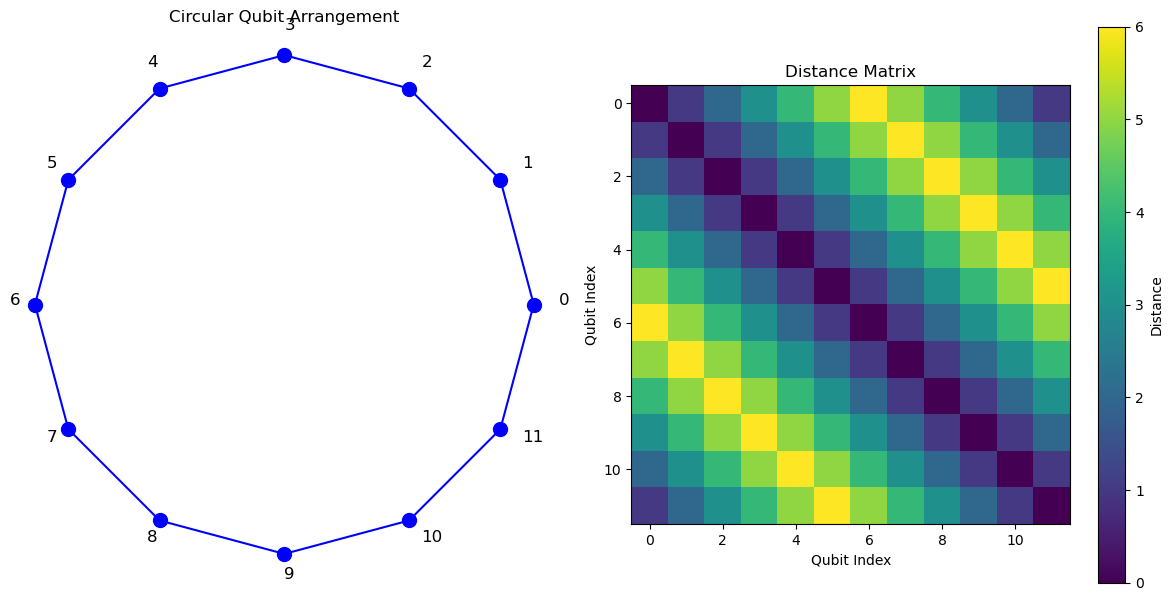

In [11]:
def create_circular_distances(n_qubits):
    """
    Creates a distance matrix for qubits arranged in a circle.
    
    For a circular arrangement, the distance between qubits i and j
    is the minimum of the clockwise and counterclockwise path lengths.
    
    Args:
        n_qubits: Number of qubits in the circle
        
    Returns:
        distances: Matrix of shape (n_qubits, n_qubits) with distances
    """
    distances = np.zeros((n_qubits, n_qubits))
    
    for i in range(n_qubits):
        for j in range(n_qubits):
            # Calculate shortest path on the circle
            direct_distance = abs(i - j)
            wraparound_distance = n_qubits - direct_distance
            distances[i, j] = min(direct_distance, wraparound_distance)
    
    return distances

def visualize_circular_connectivity(n_qubits, distances=None):
    """
    Visualize the circular qubit arrangement and optionally display
    the distance matrix.
    
    Args:
        n_qubits: Number of qubits in the circle
        distances: Optional distance matrix to display
    """
    fig, axes = plt.subplots(1, 2 if distances is not None else 1, 
                            figsize=(12, 6) if distances is not None else (6, 6))
    
    if distances is not None:
        ax1, ax2 = axes
    else:
        ax1 = axes
    
    # Plot circular arrangement
    theta = np.linspace(0, 2*np.pi, n_qubits, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)
    
    ax1.scatter(x, y, s=100, c='blue')
    
    # Add qubit tick_labels
    for i in range(n_qubits):
        ax1.text(x[i]*1.1, y[i]*1.1, f'{i}', fontsize=12)
    
    # Add connections between adjacent qubits
    for i in range(n_qubits):
        next_i = (i + 1) % n_qubits
        ax1.plot([x[i], x[next_i]], [y[i], y[next_i]], 'b-')
    
    ax1.set_title('Circular Qubit Arrangement')
    ax1.set_aspect('equal')
    ax1.axis('off')
    
    # Plot distance matrix if provided
    if distances is not None:
        im = ax2.imshow(distances, cmap='viridis')
        ax2.set_title('Distance Matrix')
        ax2.set_xlabel('Qubit Index')
        ax2.set_ylabel('Qubit Index')
        plt.colorbar(im, ax=ax2, label='Distance')
    
    plt.tight_layout()
    return fig

# Example usage:
n_qubits = 12
distances = create_circular_distances(n_qubits)
visualize_circular_connectivity(n_qubits, distances)
plt.show()

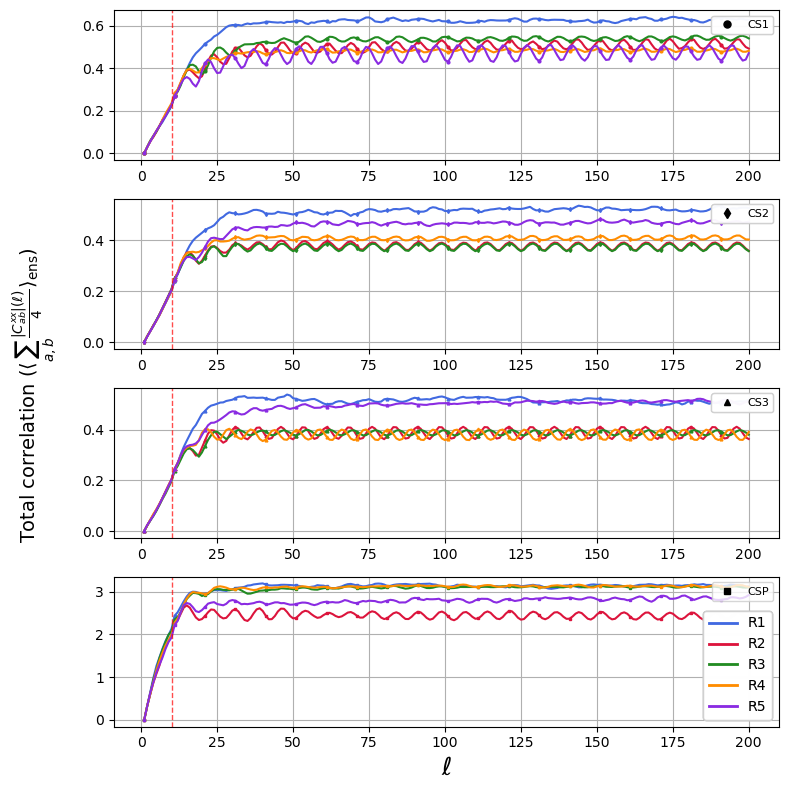

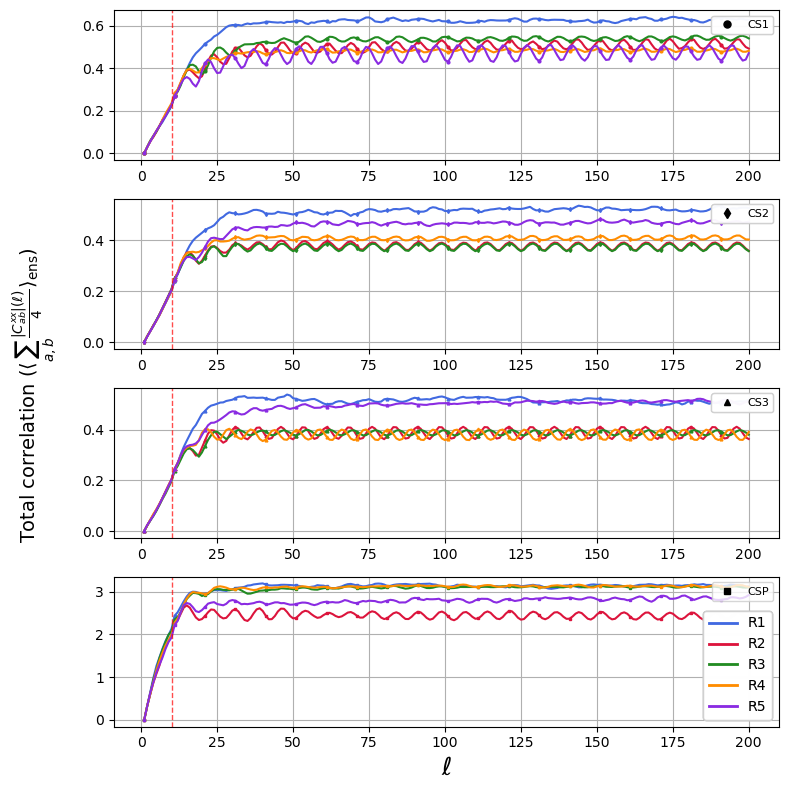

In [13]:
n_qubits = 12
distances = create_circular_distances(n_qubits)
def plot_multiple_chaos_data(chaos_data_list, labels, colors, start_from=10,thresholds=[0.1,0.2,0.5]):
    """
    Plot multiple chaos datasets on the same charts for a system where
    correlations build up from an initially uncorrelated state.
    
    Args:
        chaos_data_list: List of dictionaries with chaos analysis results
        labels: List of labels for each dataset
        colors: List of colors for each dataset
        start_from: First timestep to include in the plot (default: 10)
    """
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(14, 16))
    
    # 1. Plot average correlation magnitude (building up, not decaying)
    ax1 = fig.add_subplot(3, 1, 1)
    
    for i, chaos_data in enumerate(chaos_data_list):
        decay_metrics = chaos_data['decay_metrics']  # The name is misleading in your case
        avg_corr_magnitude = decay_metrics['avg_corr_magnitude']
        time = np.arange(len(avg_corr_magnitude))
        
        # Slice the data to start from desired timestep
        time_sliced = time[start_from:]
        avg_corr_magnitude_sliced = avg_corr_magnitude[start_from:]
        
        ax1.plot(time_sliced, avg_corr_magnitude_sliced, color=colors[i], 
                 linewidth=2, label=labels[i])
        
    ax1.set_xlabel('Timestep')
    ax1.set_ylabel('Average Correlation Magnitude')
    ax1.set_title('Correlation Growth (from t=10)')
    ax1.grid(True)
    ax1.legend(loc='best')
    
    # For the correlation build-up times panel
    ax2 = fig.add_subplot(3, 1, 2)
    
    # Let's use relative thresholds based on the max correlation in each dataset
    relative_thresholds = [0.25, 0.5, 0.75]  # 25%, 50%, 75% of maximum correlation
    build_up_times = {label: [] for label in labels}
    threshold_labels = [f"{int(rt*100)}% of max" for rt in relative_thresholds]
    
    for i, chaos_data in enumerate(chaos_data_list):
        decay_metrics = chaos_data['decay_metrics']
        avg_corr_magnitude = decay_metrics['avg_corr_magnitude']
        
        # Find the maximum correlation value
        max_corr = np.max(avg_corr_magnitude)
        
        # Calculate build-up times for each relative threshold
        for rt in relative_thresholds:
            threshold = max_corr * rt
            
            # Find the first time correlation exceeds this threshold
            build_up_time = None
            for t in range(start_from, len(avg_corr_magnitude)):
                if avg_corr_magnitude[t] >= threshold:
                    build_up_time = t
                    break
            
            build_up_times[labels[i]].append(build_up_time)
    
    # Plot the build-up times
    x = np.arange(len(threshold_labels))
    width = 0.15  # Width of each bar
    
    for i, label in enumerate(labels):
        # Filter out None values for plotting
        valid_indices = [j for j, time in enumerate(build_up_times[label]) if time is not None]
        valid_x = [x[j] for j in valid_indices]
        valid_times = [build_up_times[label][j] for j in valid_indices]
        
        if valid_times:  # Only plot if we have valid data
            offset = width * (i - len(labels)/2 + 0.5)
            ax2.bar([pos + offset for pos in valid_x], valid_times, width, 
                    color=colors[i], alpha=0.7, label=label)
    
    ax2.set_xticks(x)
    ax2.set_xticklabels(threshold_labels)
    ax2.set_xlabel('Correlation Threshold')
    ax2.set_ylabel('Timestep')
    ax2.set_title('Correlation Build-up Times')
    ax2.grid(True, axis='y')
    
    # If any data was plotted, show a legend
    if any(any(time is not None for time in times) for times in build_up_times.values()):
        ax2.legend(loc='best')
    else:
        # If no bars were plotted, show a message
        ax2.text(0.5, 0.5, 'No correlation thresholds were reached after t=10',
                 horizontalalignment='center', verticalalignment='center',
                 transform=ax2.transAxes, fontsize=12)
    
    # 3. Plot OTOC metrics
    ax3 = fig.add_subplot(3, 1, 3)
    
    # For each dataset, plot correlation entropy
    for i, chaos_data in enumerate(chaos_data_list):
        otoc_metrics = chaos_data['otoc_metrics']
        
        if 'correlation_entropy' in otoc_metrics:
            correlation_entropy = otoc_metrics['correlation_entropy']
            time = np.arange(len(correlation_entropy))
            
            # Slice the data to start from desired timestep
            time_sliced = time[start_from:]
            entropy_sliced = correlation_entropy[start_from:]
            
            ax3.plot(time_sliced, entropy_sliced, color=colors[i], 
                     linewidth=2, label=labels[i])
    
    ax3.set_xlabel('Timestep')
    ax3.set_ylabel('Correlation Entropy')
    ax3.set_title('Information Scrambling (from t=10)')
    ax3.grid(True)
    ax3.legend(loc='best')
    
    # 4. Create a fourth subplot for butterfly velocity and growth rates
    #ax4 = fig.add_subplot(3, 2, 6)
    
    # Collect butterfly velocities and growth rates
    butterfly_velocities = []
    growth_rates = []
    saturation_times = []
    
    for chaos_data in chaos_data_list:
        otoc_metrics = chaos_data['otoc_metrics']
        
        if 'butterfly_velocity' in otoc_metrics and otoc_metrics['butterfly_velocity'] is not None:
            butterfly_velocities.append(otoc_metrics['butterfly_velocity'])
        else:
            butterfly_velocities.append(0)
            
        if 'avg_growth_rate' in otoc_metrics and otoc_metrics['avg_growth_rate'] is not None:
            growth_rates.append(otoc_metrics['avg_growth_rate'])
        else:
            growth_rates.append(0)
            
        if 'avg_saturation_time' in otoc_metrics and otoc_metrics['avg_saturation_time'] is not None:
            saturation_times.append(otoc_metrics['avg_saturation_time'])
        else:
            saturation_times.append(0)
    
    # Create bar chart for butterfly velocities
    # Create three separate subplots for OTOC metrics
    fig2 = plt.figure(figsize=(15, 6))
    
    # 1. Butterfly Velocity
    ax4 = fig2.add_subplot(1, 3, 1)
    ax4.bar(np.arange(len(labels)), butterfly_velocities, color=colors, alpha=0.9)
    ax4.set_xticks(np.arange(len(labels)))
    ax4.set_xticklabels(labels)
    ax4.set_title('Butterfly Velocity')
    ax4.set_ylabel('Velocity')
    ax4.grid(True, axis='y')
    
    # 2. Average Growth Rate
    ax5 = fig2.add_subplot(1, 3, 2)
    ax5.bar(np.arange(len(labels)), growth_rates, color=colors, alpha=0.9)
    ax5.set_xticks(np.arange(len(labels)))
    ax5.set_xticklabels(labels)
    ax5.set_title('Average Growth Rate')
    ax5.set_ylabel('Growth Rate')
    ax5.grid(True, axis='y')
    
    # 3. Average Saturation Time
    ax6 = fig2.add_subplot(1, 3, 3)
    ax6.bar(np.arange(len(labels)), saturation_times, color=colors, alpha=0.9)
    ax6.set_xticks(np.arange(len(labels)))
    ax6.set_xticklabels(labels)
    ax6.set_title('Average Saturation Time')
    ax6.set_ylabel('Timesteps')
    ax6.grid(True, axis='y')
    
    plt.tight_layout()
    plt.show()

def plot_mean_correlation_sums(corrs_all_datas):
    dataset_labels = ["CS1", "CS2", "CS3", "CSP"]
    markers = ["o", "d", "^", "s"]
    rules = ["R1", "R2", "R3", "R4", "R5"]
    colors = ['#4169E1', '#DC143C', '#228B22', '#FF8C00', '#8A2BE2']
    
    fig, axes = plt.subplots(len(corrs_all_datas), 1, figsize=(8, 2*len(corrs_all_datas)))
    
    # Make axes iterable if there's only one subplot
    if len(corrs_all_datas) == 1:
        axes = [axes]
    
    for i, corr_per_ic in enumerate(corrs_all_datas):
        for j, corr_per_rule_in_ic in enumerate(corr_per_ic):
            # Get the correlation matrices for all trials
            trial_data = corr_per_rule_in_ic[1]
            
            # Number of time steps
            n_timesteps = len(trial_data[0])
            
            # Calculate mean sum for each time step across all trials
            mean_correlation_sums = []
            for t in range(n_timesteps):
                # Get the sum of absolute values for this time step across all trials
                step_sums = [np.sum(np.abs(trial[t])) for trial in trial_data]
                # Calculate the mean across all trials
                mean_correlation_sums.append(np.mean(step_sums))

            n_timesteps=200
            # Create time steps array
            x = np.arange(1, n_timesteps + 1)
            
            # Plot the mean sums
            axes[i].plot(x, mean_correlation_sums[0:200], 
                        marker=markers[i], color=colors[j], 
                        label=rules[j], markersize=2, markevery=10)
        
        # Add a vertical line at x=10 to each subplot
        axes[i].axvline(x=10, color='red', linestyle='--', linewidth=1, alpha=0.7)
        
        # Add dataset marker and label to upper right corner
        dataset_handle = plt.Line2D([0], [0], marker=markers[i], color='black', 
                              markerfacecolor='black', markersize=5, linestyle='')
        dataset_legend = axes[i].legend([dataset_handle], [dataset_labels[i]], 
                            loc='upper right', fontsize=8)
        axes[i].add_artist(dataset_legend)
        
        # Add rule legend at the bottom of each subplot
        rule_handles = [plt.Line2D([0], [0], color=colors[k], linewidth=2) 
                     for k in range(len(rules))]
        rule_legend = axes[3].legend(handles=rule_handles, labels=rules, 
                             loc='lower right', fontsize=10)
        axes[3].add_artist(rule_legend)
        
        # Add x-axis label only to the bottom subplot
        if i == len(corrs_all_datas) - 1:
            axes[i].set_xlabel(r'$\ell$', fontsize=18)
        
        # Remove y-axis label from individual subplots
        axes[i].set_ylabel('')
        
        axes[i].grid(True)
    
    # Add a single y-axis label for the entire figure
    fig.text(0.02, 0.5, r'Total correlation $(\langle \sum_{a,b} \frac{|C^{xx}_{ab}| (\ell)}{4}\rangle_{\rm ens}$)', va='center', rotation='vertical', fontsize=14)
    
    plt.tight_layout()
    plt.subplots_adjust(left=0.15)

    plt.savefig("Correlation_growth_12Q_all_rules_all_CS.png",dpi=300,bbox_inches="tight")
    # Adjust layout to make room for the y-axis label
    
    return fig

corrs_all_datas = [[corr_random_c2_th, corr_greedy_c2_th, corr_landmax_c2_th, corr_strongmax_c2_th, corr_mimic_c2_th],
                   [corr_random_c2_v1, corr_greedy_c2_v1, corr_landmax_c2_v1, corr_strongmax_c2_v1, corr_mimic_c2_v1],
                   [corr_random_c2_v2, corr_greedy_c2_v2, corr_landmax_c2_v2, corr_strongmax_c2_v2, corr_mimic_c2_v2],
                   [corr_random_c2_p, corr_greedy_c2_p, corr_landmax_c2_p, corr_strongmax_c2_p, corr_mimic_c2_p]]
            
plot_mean_correlation_sums(corrs_all_datas)
      

In [13]:
def analyze_distribution(data):
    """
    Analyze the distribution of 12 numbers across multiple trials and timesteps.
    
    Args:
        data: Array of shape (n_trials, n_timesteps, n_dimensions) where n_dimensions=12
    
    Returns:
        stats_dict: Dictionary with distribution statistics
        fig: Figure with distribution analysis plots
    """
    # Get dimensions
    n_trials, n_timesteps, n_dimensions = data.shape
    
    if n_dimensions != 12:
        raise ValueError(f"Expected 12 dimensions, but got {n_dimensions}")
    
    # Calculate statistics across all trials and timesteps
    all_values = data.reshape(-1, n_dimensions)  # Reshape to (n_trials*n_timesteps, n_dimensions)
    
    # Statistics per dimension
    means = np.mean(all_values, axis=0)
    medians = np.median(all_values, axis=0)
    stds = np.std(all_values, axis=0)
    min_vals = np.min(all_values, axis=0)
    max_vals = np.max(all_values, axis=0)
    percentile_25 = np.percentile(all_values, 25, axis=0)
    percentile_75 = np.percentile(all_values, 75, axis=0)
    
    # Overall statistics
    overall_stats = {
        'mean': np.mean(means),
        'median': np.median(medians),
        'std': np.mean(stds),
        'min': np.min(min_vals),
        'max': np.max(max_vals),
        'p25': np.mean(percentile_25),
        'p75': np.mean(percentile_75)
    }
    
    # Time evolution of statistics
    time_means = np.mean(data, axis=(0, 2))  # Average across trials and dimensions
    time_stds = np.std(data, axis=(0, 2))
    
    # Create figure with multiple plots
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(3, 2, figure=fig)
    
    # Plot 1: Overall distribution of all values
    # Modified Plot 1: Overall distribution with statistics in the plot
    ax1 = fig.add_subplot(gs[0, 0])
    all_flat = all_values.flatten()
    sns.histplot(all_flat, bins=30, kde=True, ax=ax1)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Overall Distribution of All Values')
    
    # Add vertical lines for mean and median
    ax1.axvline(x=np.mean(all_flat), color='r', linestyle='--', 
               label=f'Mean: {np.mean(all_flat):.3f}')
    ax1.axvline(x=np.median(all_flat), color='g', linestyle='--', 
               label=f'Median: {np.median(all_flat):.3f}')
    
    # Add text box with statistics inside the histogram
    stats_text = (f"Mean: {np.mean(all_flat):.3f}\n"
                  f"Median: {np.median(all_flat):.3f}\n"
                  f"Std Dev: {np.std(all_flat):.3f}\n"
                  f"Min: {np.min(all_flat):.3f}\n"
                  f"Max: {np.max(all_flat):.3f}\n"
                  f"25th %: {np.percentile(all_flat, 25):.3f}\n"
                  f"75th %: {np.percentile(all_flat, 75):.3f}")
    
    # Position the text box in the upper right corner with a light background
    ax1.text(0.95, 0.95, stats_text, 
            transform=ax1.transAxes,
            fontsize=9,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax1.legend()
    
    # Plot 2: Box plot for each dimension
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.boxplot([all_values[:, i] for i in range(n_dimensions)], 
               labels=[f'Dim {i+1}' for i in range(n_dimensions)])
    ax2.set_ylabel('Value')
    ax2.set_title('Value Distribution by Dimension')
    
    # Plot 3: Time evolution of mean and std
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.plot(time_means, label='Mean')
    ax3.fill_between(range(n_timesteps), 
                    time_means - time_stds, 
                    time_means + time_stds, 
                    alpha=0.3, label='±1 Std Dev')
    ax3.set_xlabel('Time Step')
    ax3.set_ylabel('Value')
    ax3.set_title('Time Evolution of Mean Value')
    ax3.legend()
    
    # Plot 4: Heatmap of mean values by dimension and time
    ax4 = fig.add_subplot(gs[1, 1])
    time_dim_means = np.mean(data, axis=0)  # Average across trials
    im = ax4.imshow(time_dim_means.T, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(im, ax=ax4, label='Mean Value')
    ax4.set_xlabel('Time Step')
    ax4.set_ylabel('Dimension')
    ax4.set_title('Mean Value by Dimension and Time')
    
    # Plot 5: Correlation matrix between dimensions
    ax5 = fig.add_subplot(gs[2, 0])
    corr_matrix = np.corrcoef(all_values.T)
    im2 = ax5.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(im2, ax=ax5, label='Correlation Coefficient')
    ax5.set_xticks(range(n_dimensions))
    ax5.set_yticks(range(n_dimensions))
    ax5.set_xticklabels([f'Dim {i+1}' for i in range(n_dimensions)])
    ax5.set_yticklabels([f'Dim {i+1}' for i in range(n_dimensions)])
    ax5.set_title('Correlation Matrix Between Dimensions')
    
    # Plot 6: Distribution evolution over time (violinplot)
    ax6 = fig.add_subplot(gs[2, 1])
    # Select a subset of time steps for clarity
    time_indices = np.linspace(0, n_timesteps-1, min(5, n_timesteps), dtype=int)
    violin_data = [data[:, t, :].flatten() for t in time_indices]
    ax6.violinplot(violin_data, positions=time_indices, showmeans=True)
    ax6.set_xlabel('Time Step')
    ax6.set_ylabel('Value')
    ax6.set_title('Value Distribution at Selected Time Steps')
    
    # Add text with overall statistics
    plt.figtext(0.5, 0.01, 
               f"Overall Statistics:\n"
               f"Mean: {overall_stats['mean']:.3f} | Median: {overall_stats['median']:.3f} | "
               f"Std Dev: {overall_stats['std']:.3f} | Min: {overall_stats['min']:.3f} | "
               f"Max: {overall_stats['max']:.3f}",
               ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    
    # Prepare statistics dictionary for return
    stats_dict = {
        'overall': overall_stats,
        'by_dimension': {
            'mean': means,
            'median': medians,
            'std': stds,
            'min': min_vals,
            'max': max_vals,
            'p25': percentile_25,
            'p75': percentile_75
        },
        'by_time': {
            'mean': time_means,
            'std': time_stds
        }
    }
    
    return stats_dict, fig

for tz in [tz_random_c2,tz_greedy_c2,tz_landmax_c2,tz_strongmax_c2,tz_mimic_c2]:
    stats, fig = analyze_distribution(tz)
        
        # Print some key statistics
    print(f"Overall mean: {stats['overall']['mean']:.3f}")
    print(f"Dimension means: {stats['by_dimension']['mean']}")
        
        # Save the figure
        #plt.savefig('distribution_analysis.png', dpi=300)
    plt.show()

NameError: name 'tz_random_c2' is not defined

In [46]:
#number of steps in any one evolution
steps=499
# insert the angle denominator chosen for Haar Q unitary eg pi/15 then denom =15
denom = 15 
#find the the numerical value of shift per qubit map in one trial index i.e. one full time series of evolution
def tz_two_q_dyns_map(pops_trial_index,denom): 
    tz = []
    np.array(pops_trial_index)
    for step_index in range(steps):
        tzi =  np.sin(np.pi/denom)*np.sin(np.pi/denom) -2*(pops_trial_index[step_index + 1 ] - np.cos(np.pi / denom)*np.cos(np.pi / denom)* pops_trial_index[step_index])
        tz.append(tzi)
    return tz

def all_tz_per_rule(pops):
    tz_total=[]
    for seed in range(100):
        tz_total.append(tz_two_q_dyns_map(pops[seed],15))
    return np.array(tz_total)


/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_4264/3852651838.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([all_values[:, i] for i in range(n_dimensions)],


Overall mean: 0.125
Dimension means: [0.12399707 0.12457357 0.12375742 0.1237876  0.12492193 0.12528084
 0.1309734  0.12528957 0.12484751 0.12466974 0.12414994 0.1238028 ]


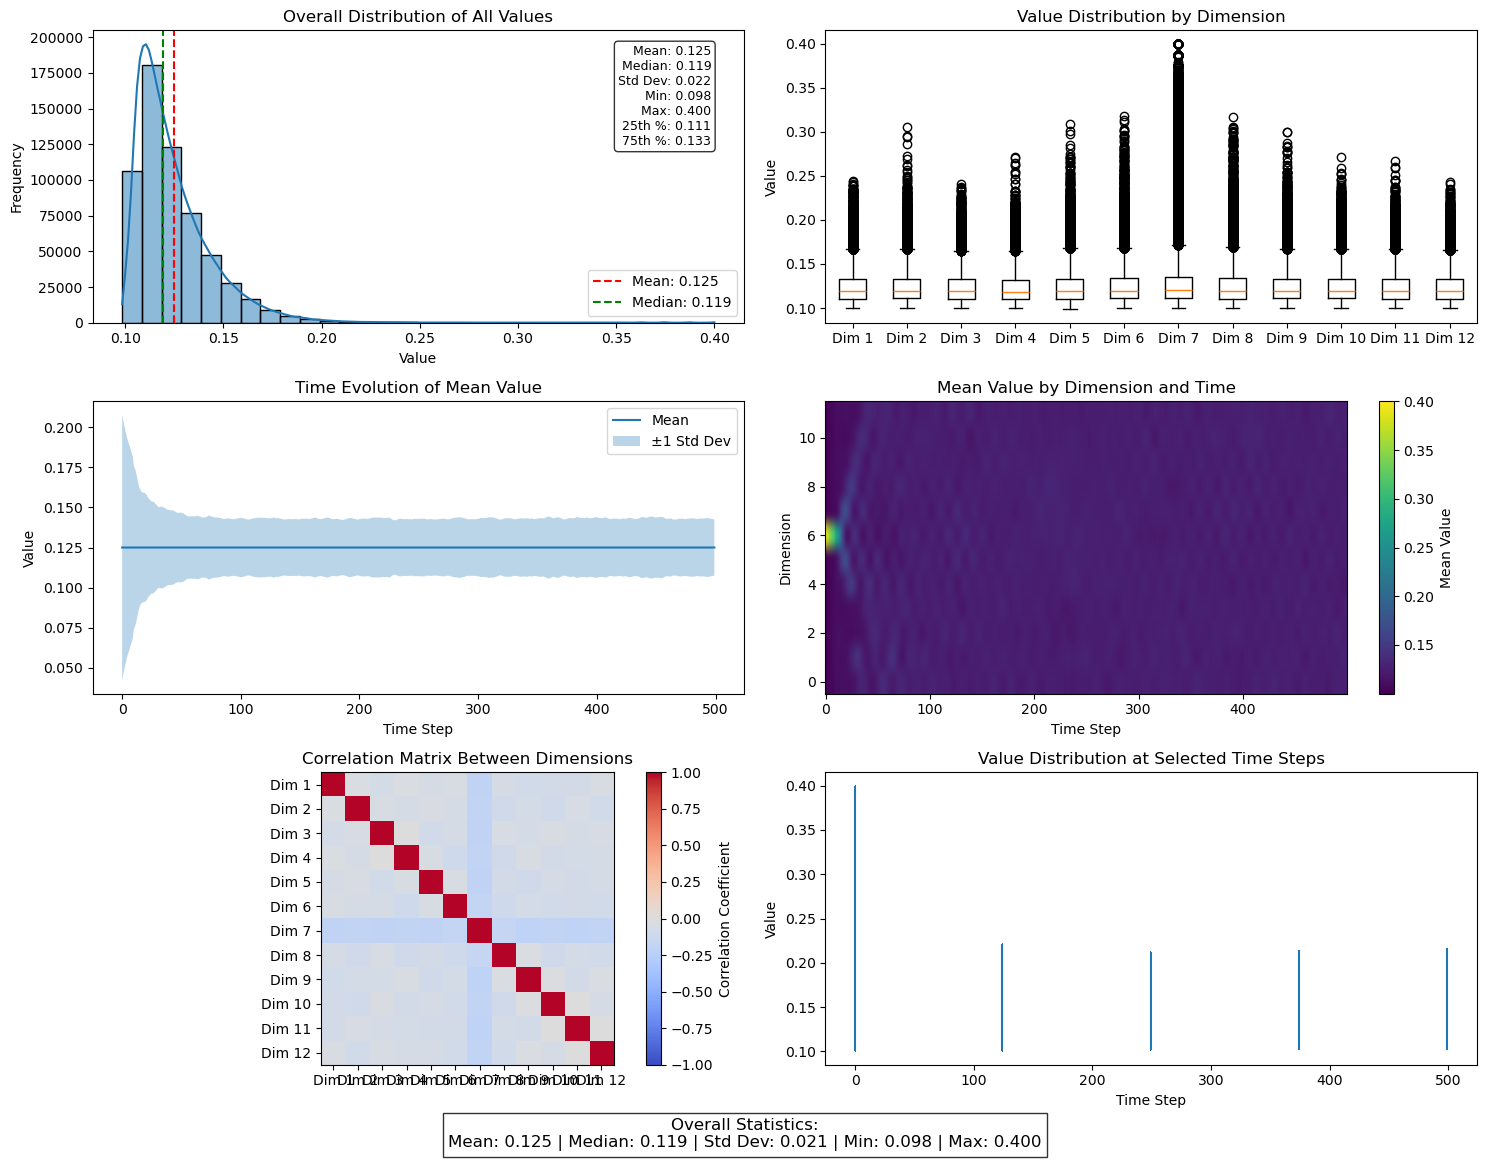

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_4264/3852651838.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([all_values[:, i] for i in range(n_dimensions)],


Overall mean: 0.125
Dimension means: [0.11517418 0.11742539 0.11497322 0.11657837 0.13372923 0.14111131
 0.14165875 0.13663407 0.13119972 0.12150256 0.11580784 0.11425587]


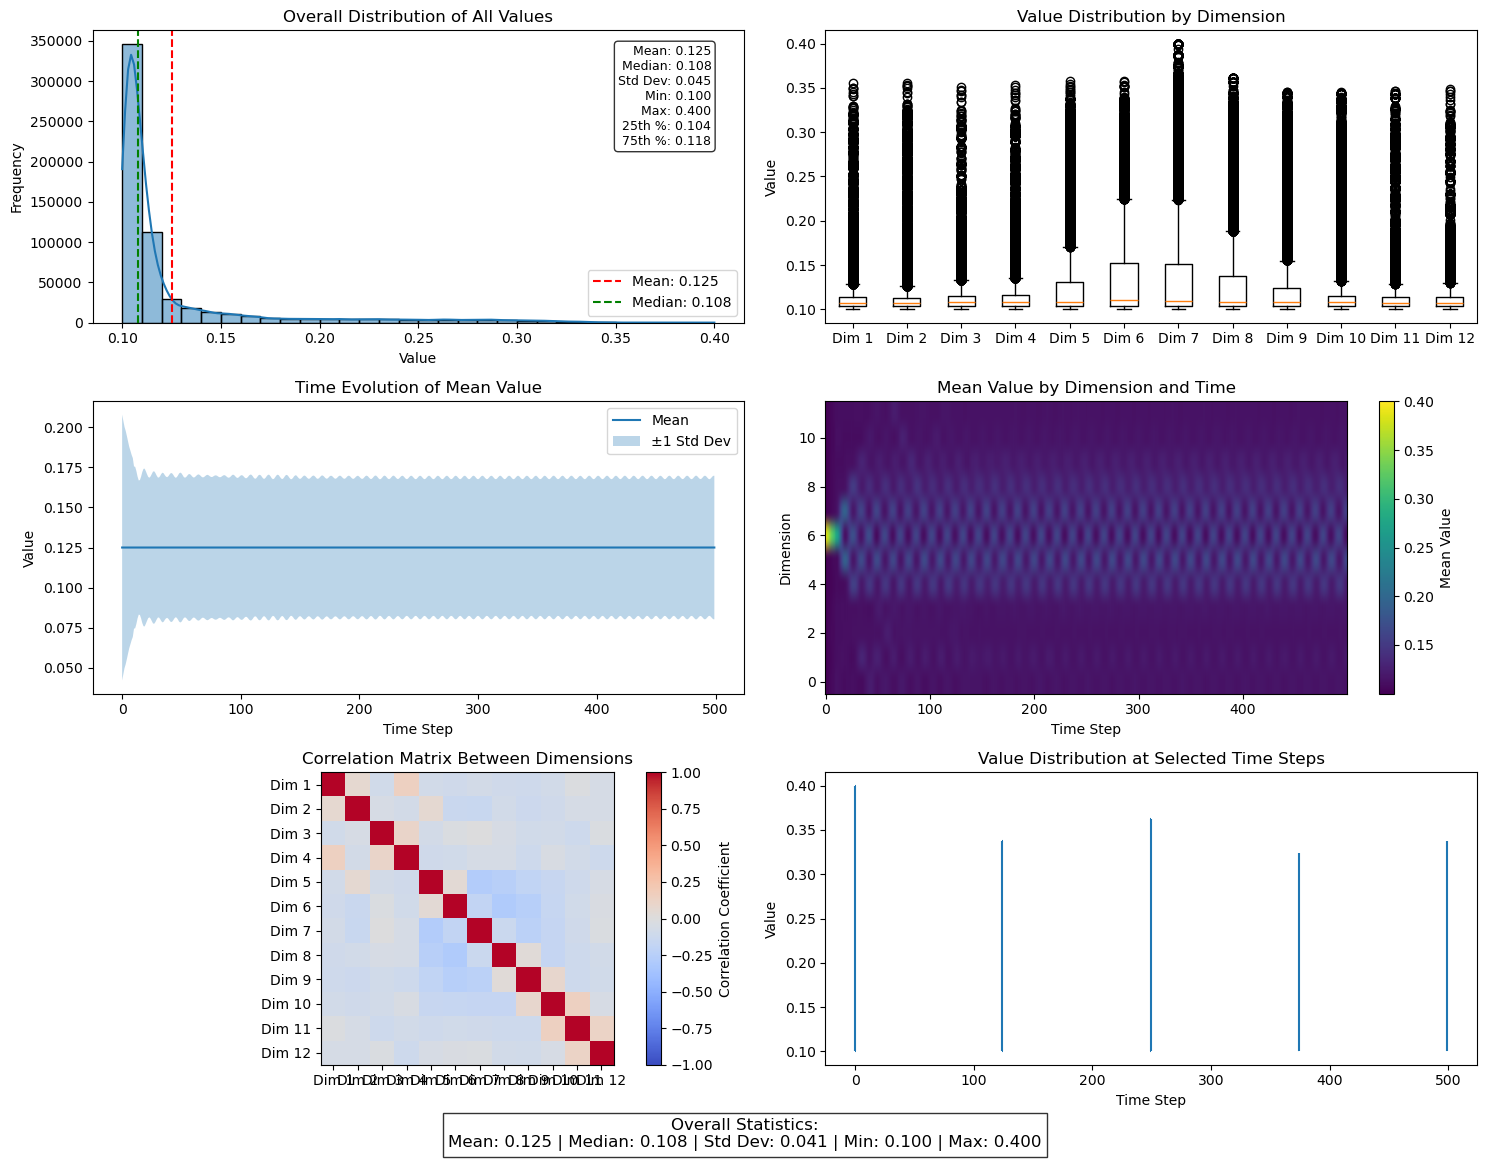

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_4264/3852651838.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([all_values[:, i] for i in range(n_dimensions)],


Overall mean: 0.125
Dimension means: [0.11716375 0.12584901 0.11268663 0.11395726 0.1309912  0.13247438
 0.14352511 0.14070776 0.12869012 0.12148023 0.11924893 0.11329038]


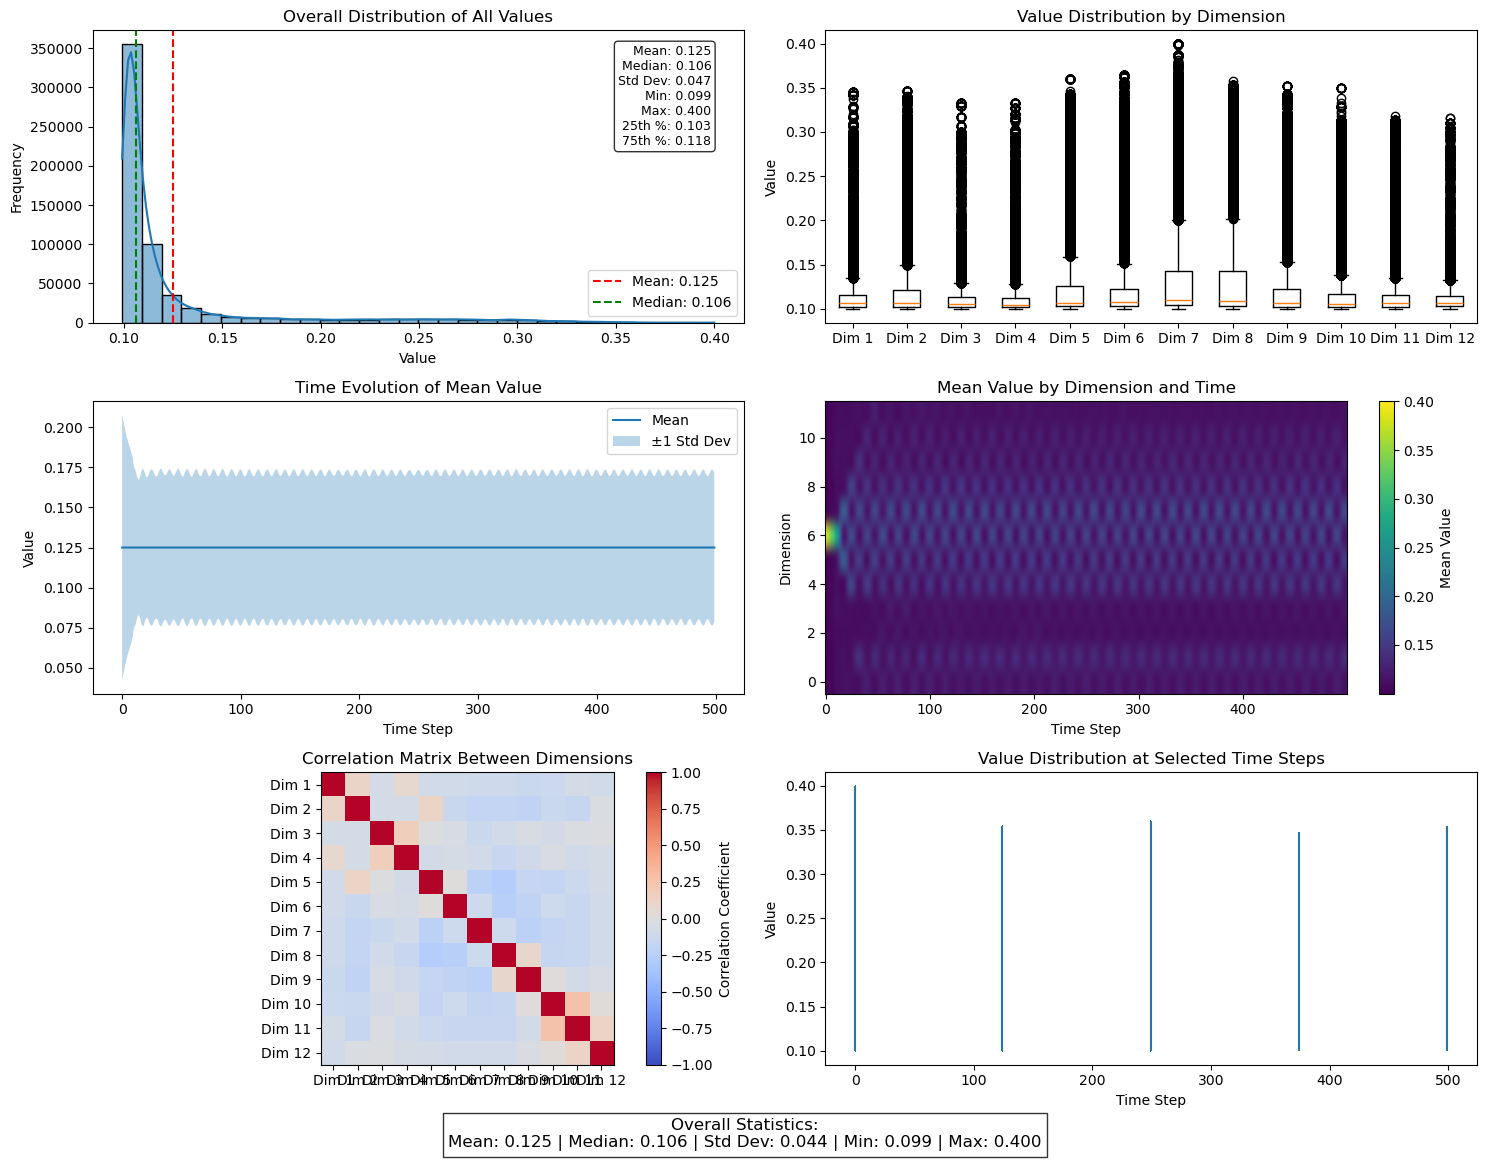

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_4264/3852651838.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([all_values[:, i] for i in range(n_dimensions)],


Overall mean: 0.125
Dimension means: [0.11763433 0.12212638 0.11287499 0.11330216 0.1264156  0.13235469
 0.14938796 0.14508498 0.1297307  0.12073652 0.11660811 0.11379603]


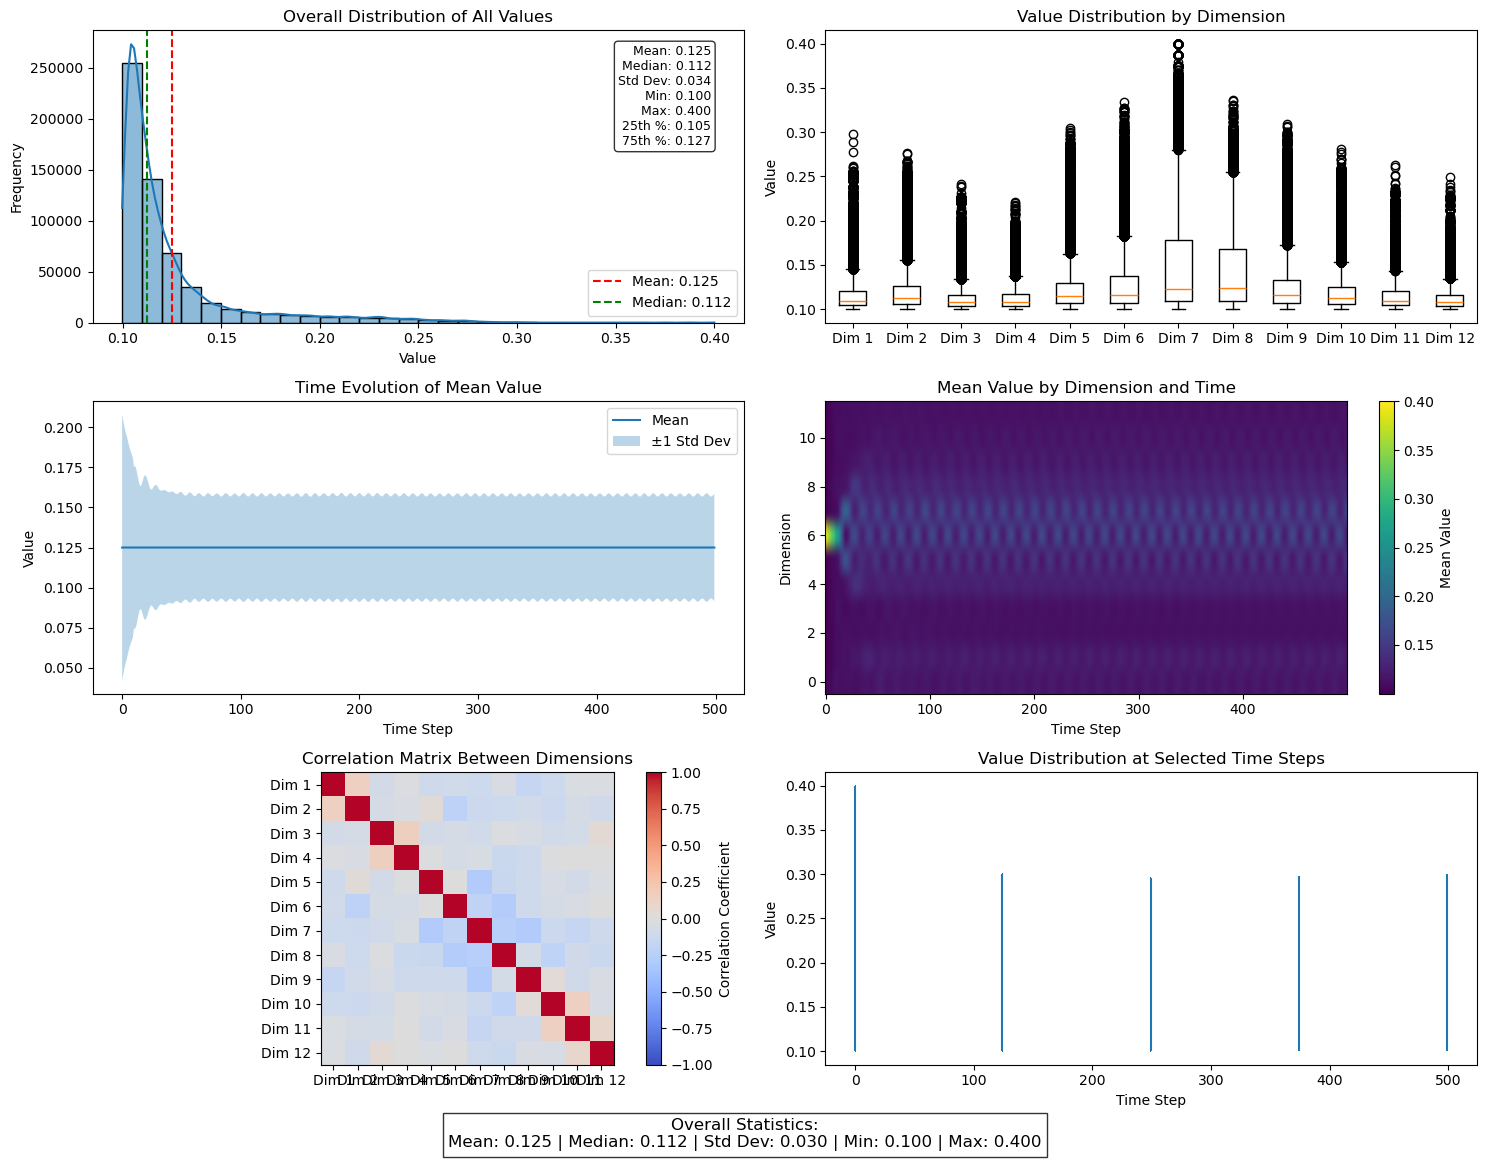

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_4264/3852651838.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([all_values[:, i] for i in range(n_dimensions)],


Overall mean: 0.125
Dimension means: [0.11045088 0.1174824  0.10869244 0.11286866 0.13033803 0.14595708
 0.16193144 0.14202656 0.12627979 0.11890724 0.11485062 0.11026843]


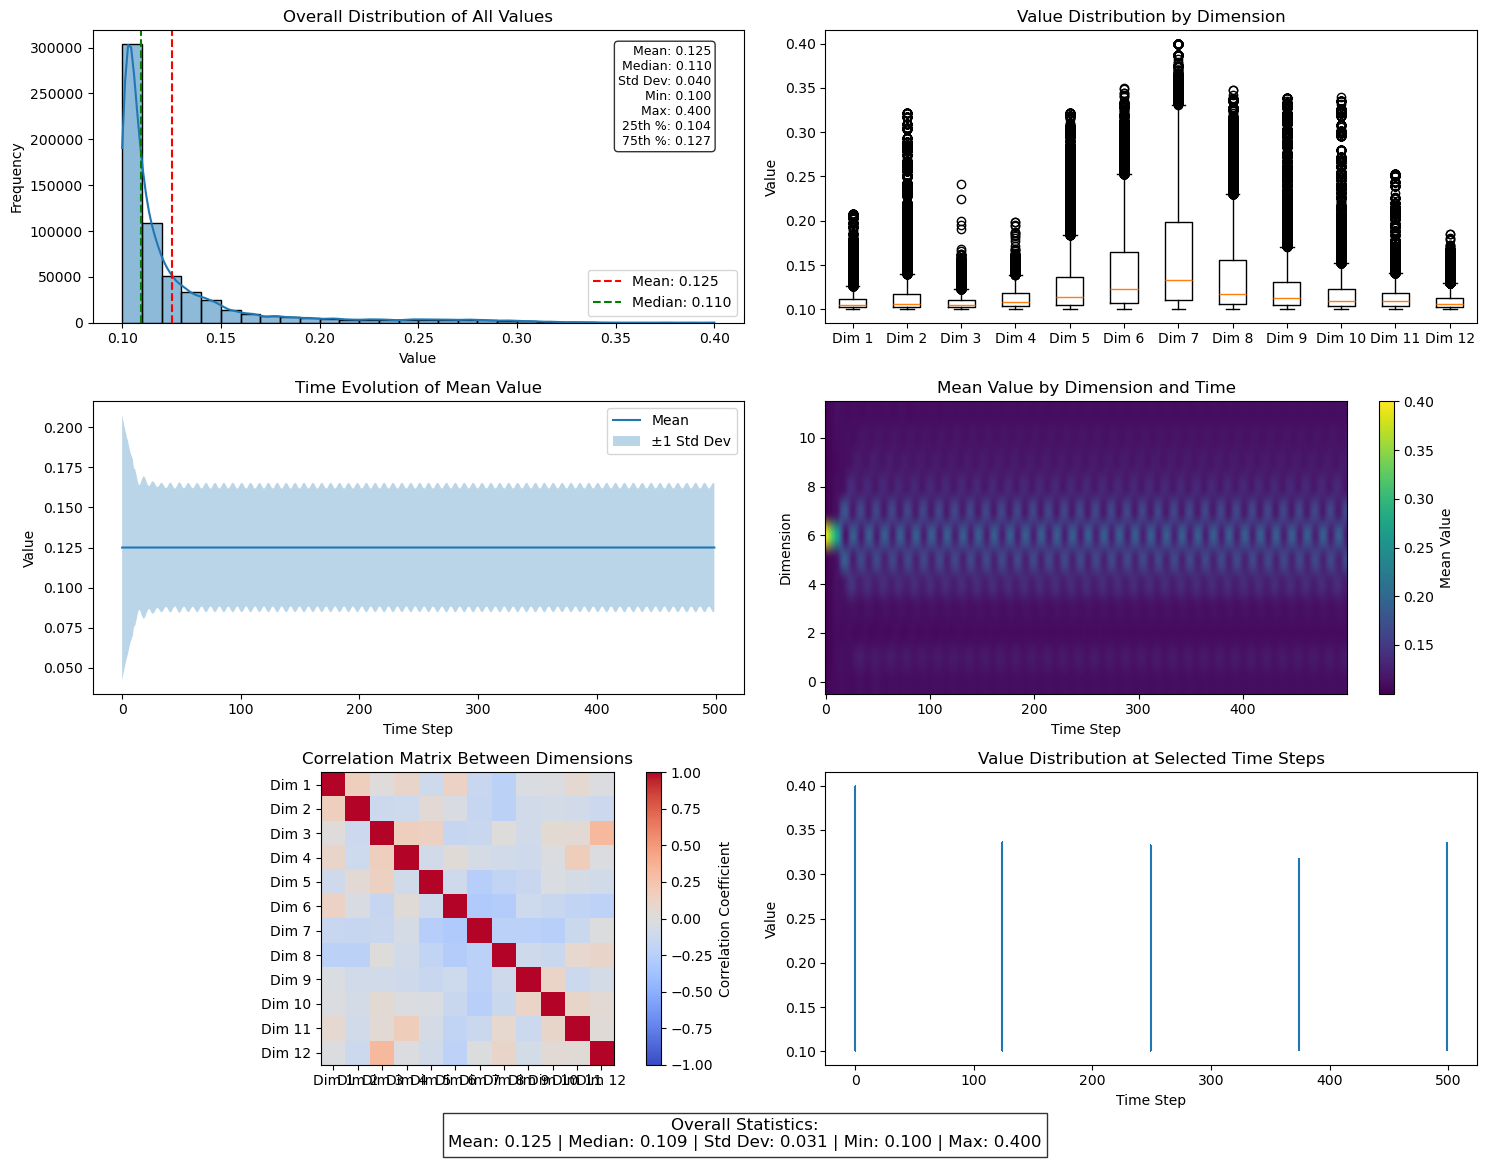

In [57]:
for tz in [pops_random_c2,pops_greedy_c2,pops_mimic_c2,pops_landscape_maximizes_c2,pops_strongest_maximizes_c2]:
    stats, fig = analyze_distribution(tz)
        
        # Print some key statistics
    print(f"Overall mean: {stats['overall']['mean']:.3f}")
    print(f"Dimension means: {stats['by_dimension']['mean']}")
        
        # Save the figure
        #plt.savefig('distribution_analysis.png', dpi=300)
    plt.show()

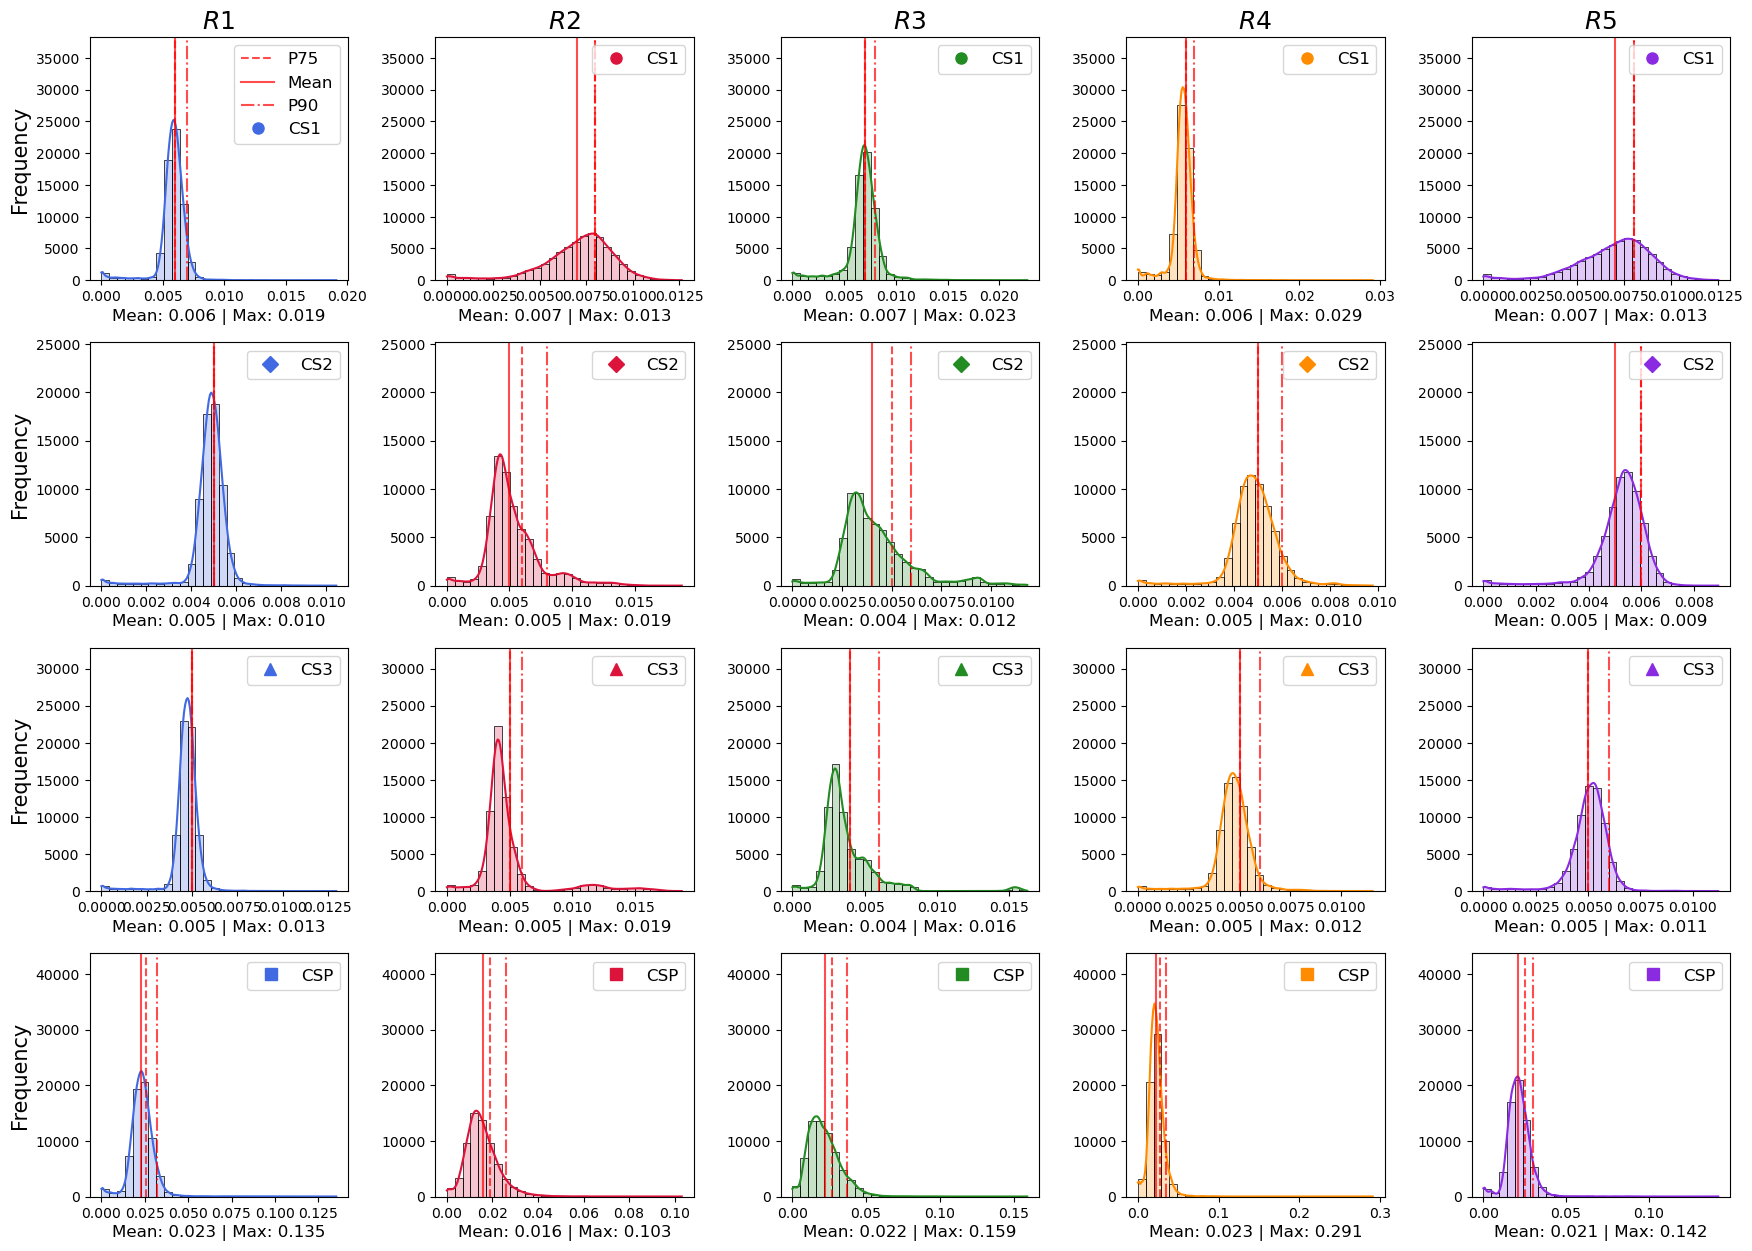

In [14]:
def plot_multiple_correlation_distributions(correlation_datasets, labels, colors, bins=30):
    """
    Plot correlation magnitude distributions for multiple datasets in a single row
    with square-like aspect ratio for each plot.
    
    Args:
        correlation_datasets: List of correlation arrays or tuples
        labels: List of labels for each dataset
        colors: List of colors for each dataset
        bins: Number of histogram bins (default: 30)
        
    Returns:
        fig: The figure object
        stats_dict: Dictionary with correlation statistics for each dataset
    """
    # Calculate figure size based on number of datasets to maintain square plots
    n_datasets = len(correlation_datasets)
    # Height of 4, width scales with number of datasets (3.5 per dataset)
    figsize = (max(3.8 * n_datasets, 7), 7)  
    
    # Create figure
    fig, axes = plt.subplots(1, n_datasets, figsize=figsize)
    
    # Handle case of single dataset
    if n_datasets == 1:
        axes = [axes]
    
    # Container for statistics
    stats_dict = {}
    
    # Process each dataset
    for i, corr_data in enumerate(correlation_datasets):
        # Handle case where input might be a tuple
        if isinstance(corr_data, tuple) and len(corr_data) >= 2:
            corr = corr_data[1]  # Extract correlations
        else:
            corr = corr_data
        
        # Get dimensions
        if len(corr.shape) == 4:
            n_trials, n_timesteps, n_qubits, _ = corr.shape
        else:
            # Handle case where there might not be multiple trials
            n_timesteps, n_qubits, _ = corr.shape
            n_trials = 1
            corr = corr.reshape(1, n_timesteps, n_qubits, n_qubits)
        
        # Calculate correlation magnitudes (absolute values)
        corr_abs = np.abs(corr)
        
        # Average over trials
        avg_corr_abs = np.mean(corr_abs, axis=0)
        
        # Create mask to exclude self-correlations (diagonal elements)
        mask = ~np.eye(n_qubits, dtype=bool)
        mask_3d = np.broadcast_to(mask, (n_timesteps, n_qubits, n_qubits))
        
        # Extract off-diagonal elements for each time step
        off_diag_values = []
        for t in range(n_timesteps):
            off_diag_values.append(avg_corr_abs[t][mask])
        
        # Calculate statistics
        means = np.array([np.mean(vals) for vals in off_diag_values])
        medians = np.array([np.median(vals) for vals in off_diag_values])
        max_vals = np.array([np.max(vals) for vals in off_diag_values])
        percentile_75 = np.array([np.percentile(vals, 75) for vals in off_diag_values])
        percentile_90 = np.array([np.percentile(vals, 90) for vals in off_diag_values])
        
        # Calculate overall statistics
        overall_stats = {
            'mean': np.mean(means),
            'median': np.median(medians),
            'max': np.max(max_vals),
            'p75': np.mean(percentile_75),
            'p90': np.mean(percentile_90)
        }
        
        # Create recommended thresholds
        recommended_thresholds = [
            overall_stats['p75'],  # Conservative
            overall_stats['mean'],        # Moderate
            overall_stats['p90']         # Stringent
        ]
        
        # Round thresholds for clarity
        recommended_thresholds = [round(t, 3) for t in recommended_thresholds]
        
        # Store statistics for this dataset
        stats_dict[labels[i]] = {
            'overall': overall_stats,
            'by_time': {
                'mean': means,
                'median': medians,
                'max': max_vals,
                'p75': percentile_75,
                'p90': percentile_90
            },
            'recommended_thresholds': recommended_thresholds
        }
        
        # Flatten all off-diagonal correlations from all time steps for plotting
        all_corrs = np.concatenate(off_diag_values)
        
        # Plot histogram with KDE
        sns.histplot(all_corrs, bins=bins, kde=True, color=colors[i], alpha=0.25, ax=axes[i])
        
        # Add vertical lines for recommended thresholds
        for j, threshold in enumerate(recommended_thresholds):
            linestyle = ['--', '-', '-.'][j % 3]
            axes[i].axvline(x=threshold, color='r', linestyle=linestyle, 
                          alpha=0.7, label=f'Threshold: {threshold:.3f}')
        
        # Set labels and title
        axes[i].set_xlabel('Correlation Magnitude')
        if i == 0:  # Only add y-label to the first plot
            axes[i].set_ylabel('Frequency')
        else:
            axes[i].set_ylabel('')  # Remove y-labels from other plots
            
        axes[i].set_title(f'{labels[i]}')
        
        # Make the plot more square by adjusting y-limits
        # Get current y-limit
        y_max = axes[i].get_ylim()[1]
        # Set a reasonable y-limit to make plots more square
        axes[i].set_ylim(0, y_max * 1.2)
        
        # Add stats below the plot
        stats_text = (f"Mean: {overall_stats['mean']:.3f} | "
                     f"Median: {overall_stats['median']:.3f} | "
                     f"Max: {overall_stats['max']:.3f}")
        
        thresholds_text = (f"Thresholds: {recommended_thresholds[0]:.3f}, "
                          f"{recommended_thresholds[1]:.3f}, "
                          f"{recommended_thresholds[2]:.3f}")
        
        axes[i].annotate(stats_text, xy=(0.5, -0.15), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=9)
        
        axes[i].annotate(thresholds_text, xy=(0.5, -0.25), xycoords='axes fraction', 
                       ha='center', va='center', fontsize=9)
    
    plt.tight_layout(rect=[0, 0.15, 1, 0.95])  # Add space at the bottom for annotations
    
    return fig, stats_dict


# Create a new function to plot all ICs at once in a grid
def plot_all_correlations_grid(ic_all_datas, corrs_all_datas, colors=None):
    """
    Plot all correlation datasets in a grid, with each row corresponding to an IC type
    and each column to a different rule.
    
    Args:
        ic_all_datas: List of IC types
        corrs_all_datas: 2D list of correlation datasets (rows=IC types, cols=rules)
        colors: List of colors for each rule
        
    Returns:
        fig: The figure object
    """
    n_ics = len(ic_all_datas)
    n_rules = len(corrs_all_datas[0])
    
    if colors is None:
        colors = ['#4169E1', '#DC143C', '#228B22', '#FF8C00', '#8A2BE2']
    markers = ['o', 'D', '^', 's']  # circle, diamond, triangle, square
    labels=["CS1","CS2","CS3","CSP"]

    
    # Create a larger figure for the grid
    fig, axes = plt.subplots(n_ics, n_rules, figsize=(n_rules * 3.5, n_ics * 3.5))

    #Max y per row
    max_ylims = [0] * n_ics
    
    # Define rule names
    rule_names = [f'R{i+1}' for i in range(n_rules)]
    
    # Container for statistics
    all_stats = {}
    
    # Process each IC type and rule
    for i, (IC, corr_row) in enumerate(zip(ic_all_datas, corrs_all_datas)):
        for j, corr_data in enumerate(corr_row):
            # Process this specific correlation dataset
            
            # Handle case where input might be a tuple
            if isinstance(corr_data, tuple) and len(corr_data) >= 2:
                corr = corr_data[1]  # Extract correlations
            else:
                corr = corr_data
            
            # Get dimensions
            if len(corr.shape) == 4:
                n_trials, n_timesteps, n_qubits, _ = corr.shape
            else:
                # Handle case where there might not be multiple trials
                n_timesteps, n_qubits, _ = corr.shape
                n_trials = 1
                corr = corr.reshape(1, n_timesteps, n_qubits, n_qubits)
            
            # Calculate correlation magnitudes (absolute values)
            corr_abs = np.abs(corr)
            
            # Average over trials
            avg_corr_abs = np.mean(corr_abs, axis=0)
            
            # Create mask to exclude self-correlations (diagonal elements)
            mask = ~np.eye(n_qubits, dtype=bool)
            mask_3d = np.broadcast_to(mask, (n_timesteps, n_qubits, n_qubits))
            
            # Extract off-diagonal elements for each time step
            off_diag_values = []
            for t in range(n_timesteps):
                off_diag_values.append(avg_corr_abs[t][mask])
            
            # Calculate statistics
            means = np.array([np.mean(vals) for vals in off_diag_values])
            medians = np.array([np.median(vals) for vals in off_diag_values])
            max_vals = np.array([np.max(vals) for vals in off_diag_values])
            percentile_75 = np.array([np.percentile(vals, 75) for vals in off_diag_values])
            percentile_90 = np.array([np.percentile(vals, 90) for vals in off_diag_values])
            
            # Calculate overall statistics
            overall_stats = {
                'mean': np.mean(means),
                'median': np.median(medians),
                'max': np.max(max_vals),
                'p75': np.mean(percentile_75),
                'p90': np.mean(percentile_90)
            }
            
            # Create recommended thresholds
            recommended_thresholds = [
                overall_stats['p75'] ,  
                overall_stats['mean'],        # Moderate
                overall_stats['p90']         # Stringent
            ]
            
            # Round thresholds for clarity
            recommended_thresholds = [round(t, 3) for t in recommended_thresholds]
            
            # Store statistics
            key = f"{IC}_{rule_names[j]}"
            all_stats[key] = {
                'overall': overall_stats,
                'recommended_thresholds': recommended_thresholds
            }
            
            # Flatten all off-diagonal correlations from all time steps for plotting
            all_corrs = np.concatenate(off_diag_values)
            
            # Plot histogram with KDE
            sns.histplot(all_corrs, bins=30, kde=True, color=colors[j], alpha=0.25, ax=axes[i, j])
            
            # Add vertical lines for recommended thresholds
            for k, threshold in enumerate(recommended_thresholds):
                linestyle = ['--', '-', '-.'][k % 3]
                threshold_key=["P75","Mean","P90"]
                if (i,j) == (0,0):
                    axes[i, j].axvline(x=threshold, color='r', linestyle=linestyle, 
                              alpha=0.7, label=f'{threshold_key[k]}')
                else:
                    axes[i, j].axvline(x=threshold, color='r', linestyle=linestyle, 
                              alpha=0.7, label='')
                
            # Don't call legend() here - we'll combine all elements later
                        
            # Create label with proper superscripts/subscripts
            label = f'$R{j+1}$'
            if i == 3:
                legend_label = f'CSP'
            else:
                legend_label = f'CS{i+1}'
            
            # Set labels and title
            if i == n_ics - 1:  # Only add x-label to the bottom row
                axes[i, j].set_xlabel('Correlation Magnitude', fontsize=15)
                axes[i, j].xaxis.set_label_coords(0.5, -0.25)
            else:
                axes[i, j].set_xlabel('')
                
            if j == 0:  # Only add y-label to the first column
                axes[i, j].set_ylabel(f'Frequency', fontsize=15)
            else:
                axes[i, j].set_ylabel('')
                
            if i == 0:
                axes[i, j].set_title(label, fontsize=18)
            else:
                axes[i, j].set_xlabel('')
            
            # Create custom handle for scatter plot legend
            from matplotlib.lines import Line2D
            custom_handle = Line2D([0], [0], marker=markers[i], color=colors[j], 
                             markersize=8, linestyle='None')
            
            # Get current handles and labels from threshold lines
            handles, labels_list = axes[i, j].get_legend_handles_labels()
            
            # Add custom handle to handles list
            handles.append(custom_handle)
            
            # Add custom label to labels list
            labels_list.append(legend_label)
            
            # Now create a single legend with all elements
            axes[i, j].legend(handles=handles, labels=labels_list, 
                      loc='upper right', fontsize=12)

            y_max = axes[i, j].get_ylim()[1]
            max_ylims[i] = max(max_ylims[i], y_max)
            
            # Make the plot more square by adjusting y-limits
            # Get current y-limit
            #y_max = axes[i, j].get_ylim()[1]
            # Set a reasonable y-limit to make plots more square
            
            # Add stats below the plot
            stats_text = (f"Mean: {overall_stats['mean']:.3f} | "
                         f"Max: {overall_stats['max']:.3f}")
            
            #thresholds_text = (f"Thresholds: {recommended_thresholds[1]:.3f}")
            
            # Use smaller font size for the annotations due to the grid layout
            axes[i, j].annotate(stats_text, xy=(0.5, -0.15), xycoords='axes fraction', 
                           ha='center', va='center', fontsize=12)

            
            
            #axes[i, j].annotate(thresholds_text, xy=(0.5, -0.25), xycoords='axes fraction', 
             #             ha='center', va='center', fontsize=8)
    
    # Adjust layout with room for annotations
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    
    for i in range(n_ics):
    # Find maximum y-limit in this row
        row_max = max(ax.get_ylim()[1] for ax in axes[i, :])
    # Apply to all plots in the row
        for j in range(n_rules):
            axes[i, j].set_ylim(0, row_max * 1.2)
    
    return fig, all_stats


# Your data
ic_all_datas = ['IC_{th}', 'IC_{v1}', 'IC_{v2}', 'IC_{pure}']
corrs_all_datas = [[corr_random_c4_th, corr_greedy_c4_th, corr_landmax_c4_th, corr_strongmax_c4_th, corr_mimic_c4_th],
                   [corr_random_c4_v1, corr_greedy_c4_v1, corr_landmax_c4_v1, corr_strongmax_c4_v1, corr_mimic_c4_v1],
                   [corr_random_c4_v2, corr_greedy_c4_v2, corr_landmax_c4_v2, corr_strongmax_c4_v2, corr_mimic_c4_v2],
                   [corr_random_c4_p, corr_greedy_c4_p, corr_landmax_c4_p, corr_strongmax_c4_p, corr_mimic_c4_p]]

# Define colors for each rule
colors = ['#4169E1', '#DC143C', '#228B22', '#FF8C00', '#8A2BE2']

# Plot all data in a single grid
fig, all_stats = plot_all_correlations_grid(ic_all_datas, corrs_all_datas, colors)

# Save the figure
plt.savefig('all_correlation_distributions_grid_12q_c4.png', dpi=300, bbox_inches='tight')
plt.show()



In [30]:
#MI of every pair
def mutual_info_dicts(twoQdms, trial_index):
    mutual_info_list = []
    for time_step in twoQdms[trial_index]:
        mutual_info_dict = {}
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-6 else 0 for k, v in mutual_info.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        mutual_info_dict.update(filtered_mutual_info)
        # Append the mutual_info_dict to the list
        mutual_info_list.append(mutual_info_dict)
    return mutual_info_list
# Call the two_point_dict function for each trial index
# Get the list of dictionaries containing two point values for each time step
def create_adjacency_matrix_two_dim(two_point_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), two_point_value in two_point_dict.items():
        adjacency_matrix[node1][node2] = two_point_value
        adjacency_matrix[node2][node1] = two_point_value  # Assuming undirected graph
    return adjacency_matrix
def adjacency_matrices_list_two_dim(twoQdms, trial_index, num_nodes, two_point_dicts):
    # Get the list of dictionaries containing mutual information values for each time step
    two_point_dicts_list = two_point_dicts(twoQdms, trial_index)
    # Create adjacency matrices for each time step
    adjacency_matrices = []
    for two_point_dict in two_point_dicts_list:
        adj_matrix = create_adjacency_matrix_two_dim(two_point_dict, num_nodes)
        adjacency_matrices.append(adj_matrix)
    return adjacency_matrices

def compute_averaged_matrix(matrix_list):

    # Sum all matrices element-wise
    summed_matrix = np.sum(matrix_list, axis=0)
    
    # Compute the average by dividing by the number of matrices (time steps)
    time_avg_matrix = summed_matrix / len(matrix_list)
    
    return time_avg_matrix
#Time average value for each qubit
def time_averaged_one_point_measures_at_t(dataset,t):
    # Assuming dataset is list of 100 lists i.e. one trial
    #stack datasets in 3D
    # Take the ensemble average along the first axis (averaging over all datasets)
    sum_till_t = np.sum(dataset[:t], axis=0)
    time_average_t = (1/(t+1))*(sum_till_t)
    return (time_average_t)

def time_averaged_one_point_measures_matrix_full_sim(dataset):
    # Take the ensemble average along the first axis (averaging over all datasets)
    time_average=[]
    for t in range(len(dataset)):
        time_average.append(time_averaged_one_point_measures_at_t(dataset,t))
    return (time_average)
def generate_all_adjacency_matrices(twoQdms, num_seeds, num_qubits, mutual_info_dicts):
    # Initialize an empty list to store the adjacency matrices for each trial
    all_trials_adjacency_matrices = []
    
    # Loop over each seed from 0 to num_seeds-1
    for seed in range(num_seeds):
        # Generate an empty list to store adjacency matrices for this trial
        trial_matrices = []
        
        # Generate the adjacency matrix for the given seed
        adj_matrix = adjacency_matrices_list_two_dim(twoQdms, seed, num_qubits, mutual_info_dicts)
        
        # Append each generated adjacency matrix to the trial-specific list
        trial_matrices.append(adj_matrix)
        
        # Append the list of matrices for this trial to the overall list
        all_trials_adjacency_matrices.append(trial_matrices)
    
    # Convert to a NumPy array if needed
    all_trials_adjacency_matrices_array = np.array(all_trials_adjacency_matrices)
    
    return all_trials_adjacency_matrices_array


def ensemble_avg_list(data):
    ensemble_avg_list = []
    
    # Loop through each time step
    for t in range(499):
        matrix_at_t_diff_trials=[]
        for seed in range(99):
            matrix_at_t_diff_trials.append(data[seed][0][t])
        # Calculate the average adjacency matrix for this time step
        avg_matrix_at_t = np.mean(matrix_at_t_diff_trials, axis=0) 
        # Append the averaged matrix to the ensemble list
        ensemble_avg_list.append(avg_matrix_at_t)
    return ensemble_avg_list

#Total Mutual information on the network. This serves as a measure compared to the maximum mutual information that can develop on network
def MItotal(MI_adj):
    MI_adj_tot=[]
    for i in range(499):
       MI_adj_tot.append(np.sum(MI_adj[i],axis=0))
    return np.array(MI_adj_tot)

In [19]:
size=8
num_seeds=100;
num_qubits=12;
#MI_adj_random_c2_th=adjacency_matrices_list_two_dim(twoQdmsrandomc2,seed,size, mutual_info_dicts)
#MI_adj_greedy_c2_th=adjacency_matrices_list_two_dim(twoQdmsgreedyc2,seed,size, mutual_info_dicts)
#MI_adj_mimic_c2_th=adjacency_matrices_list_two_dim(twoQdmsmimicc2,seed,size, mutual_info_dicts)
#MI_adj_landmax_c2_th=adjacency_matrices_list_two_dim(twoQdmslandmaxc2_th,seed,size, mutual_info_dicts)
#MI_adj_strongmax_c2_th=adjacency_matrices_list_two_dim(twoQdmsstrongmax2_th,seed,size, mutual_info_dicts)

MI_adj_random_all_c4_th = generate_all_adjacency_matrices(twoQdmsrandomc4_th, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_greedy_all_c4_th = generate_all_adjacency_matrices(twoQdmsgreedyc4_th, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_mimic_all_c4_th = generate_all_adjacency_matrices(twoQdmsmimicc4_th, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_landscape_maximizes_all_c4_th = generate_all_adjacency_matrices(twoQdmslandmaxc4_th, num_seeds, num_qubits, mutual_info_dicts)
MI_adj_strongest_maximizes_all_c4_th = generate_all_adjacency_matrices(twoQdmsstrongmax2_th, num_seeds, num_qubits, mutual_info_dicts)


#ensemble_avg_random_c2=ensemble_avg_list(MI_adj_random_all_c2)
#ensemble_avg_random_c4=ensemble_avg_list(MI_adj_random_all_c4)
#ensemble_avg_random_c5=ensemble_avg_list(MI_adj_random_all_c5)
#ensemble_avg_random_c6=ensemble_avg_list(MI_adj_random_all_c6)
#ensemble_avg_random_cn=ensemble_avg_list(MI_adj_random_all_cn)

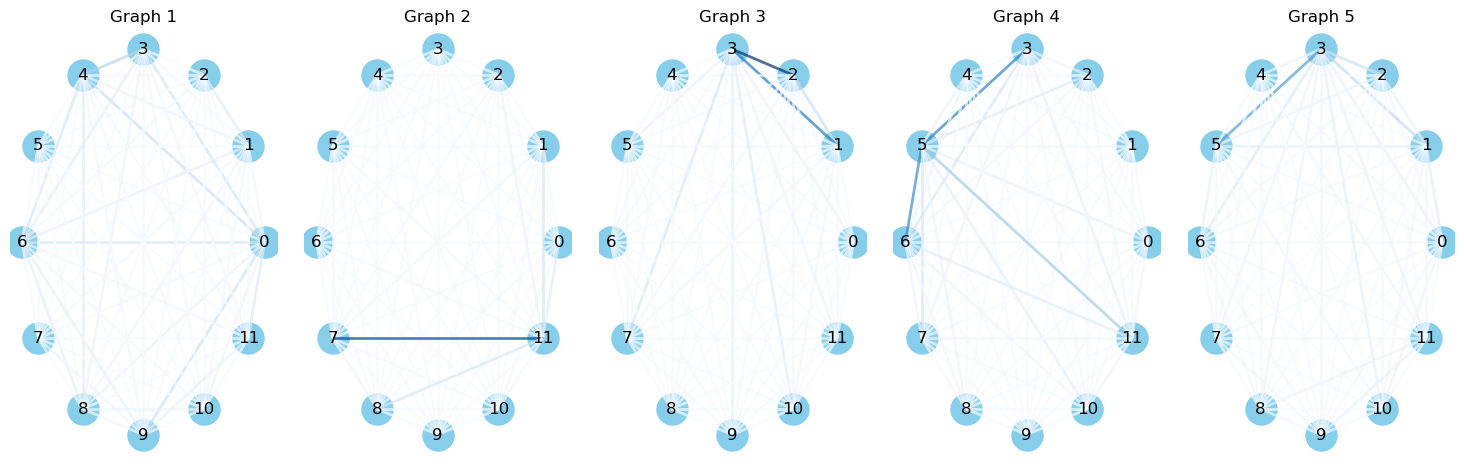

<Figure size 640x480 with 0 Axes>

In [361]:
# Function to draw graph with consistent coloring and thickness
#step number
n=499
#trial number
m=15

# Example: four different datasets of node pairs (replace with your real data)
#datasets = np.array([MI_adj_random_cn[490], MI_adj_greedy_cn[490], MI_adj_mimic_cn[490], MI_adj_landmax_cn[490]]) #MI_adj_landmax[99]]) # Replace these with your actual datasets
datasets = np.array([MI_adj_random_all_c2_th[m][0][n], MI_adj_greedy_all_c2_th[m][0][n], MI_adj_mimic_all_c2_th[m][0][n], MI_adj_landscape_maximizes_all_c2_th[m][0][n]
                     ,MI_adj_strongest_maximizes_all_c2_th[m][0][n]]) #MI_adj_landmax[99]]) # Replace these with your actual datasets
dataset_titles = ["Random MI", "Greedy MI", "Mimic MI", "Landmax MI"]

G1 = nx.from_numpy_array(datasets[0])
G2 = nx.from_numpy_array(datasets[1])
G3 = nx.from_numpy_array(datasets[2])
G4 = nx.from_numpy_array(datasets[3])
G5 = nx.from_numpy_array(datasets[4])

# Function to draw graph with consistent coloring and uniform thickness
def draw_graph_with_consistent_weights(G, pos, title, ax, vmin, vmax, cmap_name='Blues'):
    # Get the edge weights
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=500, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, ax=ax)
    
    # Get edges and weights in correct order
    edgelist = list(G.edges())
    weights = []
    for u, v in edgelist:
        if (u, v) in edge_weights:
            weights.append(edge_weights[(u, v)])
        else:
            weights.append(edge_weights.get((v, u), 1.0))
    
    # Use a constant line width for all edges
    constant_width = 2.0
    
    # Draw edges with color based on weights, but uniform thickness
    cmap = mpl.colormaps[cmap_name]
    edge_colors = [cmap((w - vmin) / (vmax - vmin) if vmax > vmin else 0.5) for w in weights]
    
    # Create edge collection manually
    edge_pos = np.asarray([(pos[e[0]], pos[e[1]]) for e in edgelist])
    
    # Draw the edges
    line_segments = []
    for (x1, y1), (x2, y2) in edge_pos:
        line_segments.append([(x1, y1), (x2, y2)])
    
    from matplotlib.collections import LineCollection
    lc = LineCollection(line_segments, colors=edge_colors, linewidths=constant_width, alpha=0.7)
    ax.add_collection(lc)
    
    ax.set_title(title)
    ax.axis('off')
    
    return lc

# Find global min and max weights across all graphs
all_weights = []
for G in [G1, G2, G3, G4,G5]:
    weights = list(nx.get_edge_attributes(G, 'weight').values())
    all_weights.extend(weights)

vmin = min(all_weights)
vmax = max(all_weights)

# Create figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes = axes.flatten()

# Set axis limits for all subplots
for ax in axes:
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

# Draw each graph with consistent scale
pos = nx.circular_layout(G1)  # Use consistent layout
edges1 = draw_graph_with_consistent_weights(G1, pos, "Graph 1", axes[0], vmin, vmax)
edges2 = draw_graph_with_consistent_weights(G2, pos, "Graph 2", axes[1], vmin, vmax)
edges3 = draw_graph_with_consistent_weights(G3, pos, "Graph 3", axes[2], vmin, vmax)
edges4 = draw_graph_with_consistent_weights(G4, pos, "Graph 4", axes[3], vmin, vmax)
edges5 = draw_graph_with_consistent_weights(G5, pos, "Graph 5", axes[4], vmin, vmax)


# Add a common colorbar
cmap = mpl.colormaps['RdBu']  # Updated to use the new method
sm = ScalarMappable(norm=Normalize(vmin, vmax), cmap=cmap)
sm.set_array([])
#cbar = fig.colorbar(sm, ax=axes, label='Edge Weight', orientation='vertical', fraction=0.046, pad=0.04)

# Use fig.tight_layout() with a larger pad to prevent the warning
fig.tight_layout(pad=2.0)
plt.show()

# For the combined graph
#plt.figure(figsize=(10, 8))
#ax = plt.gca()
#ax.set_xlim(-1.1, 1.1)
#ax.set_ylim(-1.1, 1.1)
#combined_graph = nx.compose_all([G1, G2, G3, G4,G5])
#edges = draw_graph_with_consistent_weights(combined_graph, pos, "Combined Graph", ax, vmin, vmax)

# Add colorbar for combined graph
sm = ScalarMappable(norm=Normalize(vmin, vmax), cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, label='Edge Weight')

plt.tight_layout(pad=2.0)
plt.show()


G1 average edge weight: 0.0005953890077723964


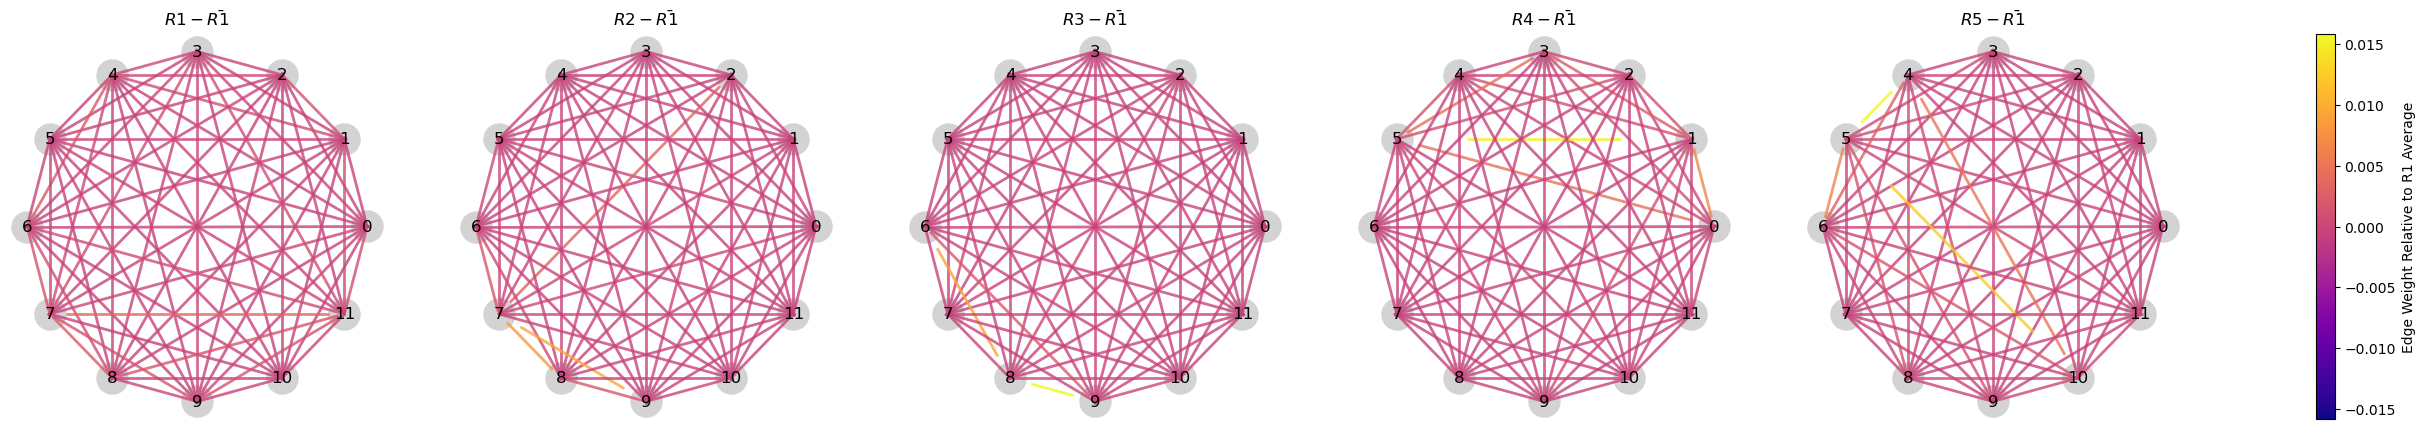

In [347]:
# Function to calculate average edge weight of a graph
def calculate_avg_edge_weight(G):
    edge_weights = nx.get_edge_attributes(G, 'weight')
    if not edge_weights:
        return 0
    return sum(edge_weights.values()) / len(edge_weights)

# Function to create new graphs with normalized weights (subtract G1 average)
def normalize_graphs_to_G1(G1, G2, G3, G4,G5):
    # Calculate G1 average
    G1_avg = calculate_avg_edge_weight(G1)
    print(f"G1 average edge weight: {G1_avg}")
    
    # Create new graphs with normalized weights
    G1_norm = nx.Graph()
    G2_norm = nx.Graph()
    G3_norm = nx.Graph()
    G4_norm = nx.Graph()
    G5_norm = nx.Graph()
    
    # Copy nodes
    G1_norm.add_nodes_from(G1.nodes())
    G2_norm.add_nodes_from(G2.nodes())
    G3_norm.add_nodes_from(G3.nodes())
    G4_norm.add_nodes_from(G4.nodes())
    G5_norm.add_nodes_from(G5.nodes())

    
    # Normalize edge weights by subtracting G1 average
    for u, v, data in G1.edges(data=True):
        G1_norm.add_edge(u, v, weight=data['weight'] - G1_avg)
    
    for u, v, data in G2.edges(data=True):
        G2_norm.add_edge(u, v, weight=data['weight'] - G1_avg)
    
    for u, v, data in G3.edges(data=True):
        G3_norm.add_edge(u, v, weight=data['weight'] - G1_avg)
    
    for u, v, data in G4.edges(data=True):
        G4_norm.add_edge(u, v, weight=data['weight'] - G1_avg)

    for u, v, data in G5.edges(data=True):
        G5_norm.add_edge(u, v, weight=data['weight'] - G1_avg)
    return G1_norm, G2_norm, G3_norm, G4_norm, G5_norm

# Function to draw graph with consistent coloring and uniform thickness
def draw_graph_with_consistent_weights(G, pos, title, ax, vmin, vmax, cmap_name='plasma'):
    # Get the edge weights
    edge_weights = nx.get_edge_attributes(G, 'weight')
    
    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=500, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=12, ax=ax)
    
    # Get edges and weights in correct order
    edgelist = list(G.edges())
    weights = []
    for u, v in edgelist:
        if (u, v) in edge_weights:
            weights.append(edge_weights[(u, v)])
        else:
            weights.append(edge_weights.get((v, u), 0.0))
    
    # Use a constant line width
    constant_width = 2.0
    
    # Draw edges with color based on weights (RdBu diverging colormap)
    cmap = mpl.colormaps[cmap_name]
    
    # Normalize to symmetric vmin/vmax for diverging colormap
    # This ensures zero is at the center (white)
    abs_max = max(abs(vmin), abs(vmax))
    norm = Normalize(-abs_max, abs_max)
    
    edge_colors = [cmap(norm(w)) for w in weights]
    
    # Create edge collection manually
    edge_pos = np.asarray([(pos[e[0]], pos[e[1]]) for e in edgelist])
    
    # Inside your draw_graph_with_consistent_weights function
    # Replace the line_segments calculation with:
    
    line_segments = []
    for i, ((x1, y1), (x2, y2)) in enumerate(edge_pos):
        # Calculate the original full length vector between nodes
        dx, dy = x2 - x1, y2 - y1
        full_length = np.sqrt(dx**2 + dy**2)
        
        # Get the weight for this edge
        weight = weights[i]
        
        # Calculate the target length based on weight
        # You can adjust this formula to control how weights affect length
        # For example, inversely proportional: smaller weight = longer line
        target_length = full_length * (1.0 - 0.5 * (weight / abs(vmax)))
        
        # Calculate the new endpoints to shorten the line
        # This preserves the original direction but changes length
        scale_factor = target_length / full_length
        
        # Keep the line anchored at both endpoints but make it shorter
        # Calculate new midpoint
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        
        # Calculate new endpoints that are closer to the midpoint
        new_x1 = mid_x + (x1 - mid_x) * scale_factor
        new_y1 = mid_y + (y1 - mid_y) * scale_factor
        new_x2 = mid_x + (x2 - mid_x) * scale_factor
        new_y2 = mid_y + (y2 - mid_y) * scale_factor
        
        line_segments.append([(new_x1, new_y1), (new_x2, new_y2)])
    
    from matplotlib.collections import LineCollection
    lc = LineCollection(line_segments, colors=edge_colors, linewidths=constant_width, alpha=0.8)
    
    ax.add_collection(lc)
    
    ax.set_title(title)
    ax.axis('off')
    
    return lc


n=499
#trial number
m=50

# Example: four different datasets of node pairs (replace with your real data)
#datasets = np.array([MI_adj_random_cn[490], MI_adj_greedy_cn[490], MI_adj_mimic_cn[490], MI_adj_landmax_cn[490]]) #MI_adj_landmax[99]]) # Replace these with your actual datasets
datasets = np.array([MI_adj_random_all_c2_th[m][0][n], MI_adj_greedy_all_c2_th[m][0][n], MI_adj_mimic_all_c2_th[m][0][n], MI_adj_landscape_maximizes_all_c2_th[m][0][n]
                     ,MI_adj_strongest_maximizes_all_c2_th[m][0][n]]) #MI_adj_landmax[99]]) # Replace these with your actual datasets
dataset_titles = ["Random MI", "Greedy MI", "Mimic MI", "Landmax MI"]

G1 = nx.from_numpy_array(datasets[0])
G2 = nx.from_numpy_array(datasets[1])
G3 = nx.from_numpy_array(datasets[2])
G4 = nx.from_numpy_array(datasets[3])
G5 = nx.from_numpy_array(datasets[4])
# Create normalized graphs
G1_norm, G2_norm, G3_norm, G4_norm, G5_norm = normalize_graphs_to_G1(G1, G2, G3, G4,G5)

# Find global min and max weights across normalized graphs
all_weights = []
for G in [G1_norm, G2_norm, G3_norm, G4_norm]:
    weights = list(nx.get_edge_attributes(G, 'weight').values())
    all_weights.extend(weights)

vmin = min(all_weights)
vmax = max(all_weights)

# Create figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(35, 5))
axes = axes.flatten()

# Set axis limits for all subplots
for ax in axes:
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

# Draw each graph with consistent scale
pos = nx.circular_layout(G1)  # Use consistent layout
edges1 = draw_graph_with_consistent_weights(G1_norm, pos, r"$R1-\bar{R1}$", axes[0], vmin, vmax)
pos = nx.circular_layout(G2)  # Use consistent layout

edges2 = draw_graph_with_consistent_weights(G2_norm, pos, r"$R2-\bar{R1}$", axes[1], vmin, vmax)
pos = nx.circular_layout(G3)  # Use consistent layout

edges3 = draw_graph_with_consistent_weights(G3_norm, pos, r"$R3-\bar{R1}$", axes[2], vmin, vmax)
pos = nx.circular_layout(G4)  # Use consistent layout

edges4 = draw_graph_with_consistent_weights(G4_norm, pos, r"$R4-\bar{R1}$", axes[3], vmin, vmax)
pos = nx.circular_layout(G5)  # Use consistent layout

edges5 = draw_graph_with_consistent_weights(G5_norm, pos, r"$R5-\bar{R1}$", axes[4], vmin, vmax)


# Add a common colorbar with diverging colormap
cmap = mpl.colormaps['plasma']
abs_max = max(abs(vmin), abs(vmax))
norm = Normalize(-abs_max, abs_max)
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes, label='Edge Weight Relative to R1 Average', orientation='vertical')
# Add helpful labels to the colorbar
#cbar.ax.text(1.0, 0.5, 'Higher than G1 avg', rotation=90, 
#             transform=cbar.ax.transAxes, va='center', ha='left', fontsize=10)
#cbar.ax.text(1.0, 0.1, 'Lower than G1 avg', rotation=90, 
#             transform=cbar.ax.transAxes, va='center', ha='left', fontsize=10)

#fig.suptitle('Edge Weights Normalized by Subtracting G1 Average Edge Weight', fontsize=16)
#fig.tight_layout(rect=[0, 0, 1, 0.96], pad=2.0)  # Adjust for suptitle
plt.savefig("MI_matrix_12_Q_all_rules_seed_52_step_498")
plt.show()

In [186]:
def clustering_coeff(adjacency_matrix_list):
    C_list = []
    for adj_mat in adjacency_matrix_list:
        adj_mat = np.array(adj_mat)
        M_sq = adj_mat @ adj_mat
        sum_of_M_sq = np.sum(M_sq)
        M_cube = adj_mat @ adj_mat @ adj_mat
        M_cube_trace = np.trace(M_cube)
        if sum_of_M_sq == 0:
            C_list.append(0)
        else:
            C_list.append(M_cube_trace / sum_of_M_sq)
    return np.array(C_list)

def disparity_function(adjacency_matrix_list, N):
    D_list = []
    for adj_mat in adjacency_matrix_list:
        M_row_sum_squared = np.sum(adj_mat, axis=1)**2
        M_row_sum_of_squared_elements = np.sum(adj_mat**2, axis=1)
        # Check for zero division before performing division
        Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)
        D_list.append(np.sum(Di) / N)
    return np.array(D_list)

# Function to calculate node-level metrics
def node_level_metrics(adj_mat):
    """Calculate node-level clustering and disparity for a given adjacency matrix"""
    n_nodes = adj_mat.shape[0]
    
    # Node-level clustering
    node_clustering = np.zeros(n_nodes)
    # Node-level disparity
    node_disparity = np.zeros(n_nodes)
    
    for i in range(n_nodes):
        # For node clustering, we need to calculate the local clustering coefficient
        neighbors = np.where(adj_mat[i] > 0)[0]
        if len(neighbors) >= 2:
            # Extract the subgraph of neighbors
            subgraph = adj_mat[np.ix_(neighbors, neighbors)]
            # Calculate clustering for this node (triangles / possible triangles)
            possible_connections = len(neighbors) * (len(neighbors) - 1) / 2
            if possible_connections > 0:
                actual_connections = np.sum(subgraph) / 2  # Divide by 2 for undirected graph
                node_clustering[i] = actual_connections / possible_connections
            else:
                node_clustering[i] = 0
        else:
            node_clustering[i] = 0
        
        # For node disparity
        row_sum = np.sum(adj_mat[i])
        if row_sum > 0:
            node_disparity[i] = np.sum((adj_mat[i] / row_sum) ** 2)
        else:
            node_disparity[i] = 0
    
    return node_clustering, node_disparity

# Function to analyze multiple temporal networks
def analyze_multiple_temporal_networks(network_list, network_names=None):
    """
    Analyze multiple temporal networks and provide comparative metrics and visualizations
    
    Parameters:
    network_list: list of lists of adjacency matrices, each inner list represents time evolution of one network
    network_names: optional list of names for networks
    
    Returns:
    Dictionary of metrics and produces visualizations
    """
    n_networks = len(network_list)
    
    if network_names is None:
        network_names = [f"Network {i+1}" for i in range(n_networks)]
    
    # Data structures to store results
    avg_adjacency_matrices = []  # Time-averaged matrices
    global_metrics = {
        'avg_clustering': [],    # Clustering of time-averaged matrix
        'mean_clustering': [],   # Mean of per-timestep clustering
        'avg_disparity': [],     # Disparity of time-averaged matrix
        'mean_disparity': []     # Mean of per-timestep disparity
    }
    
    # Calculate metrics for each network
    for net_idx, time_matrices in enumerate(network_list):
        n_timepoints = len(time_matrices)
        n_nodes = time_matrices[0].shape[0]
        
        # Calculate metrics at each time step
        clustering_per_time = []
        disparity_per_time = []
        
        for t in range(n_timepoints):
            adj_mat = time_matrices[t]
            clustering_per_time.append(clustering_coeff([adj_mat])[0])
            disparity_per_time.append(disparity_function([adj_mat], n_nodes)[0])
        
        # Calculate time-averaged matrix
        avg_adj_mat = np.mean(time_matrices, axis=0)
        avg_adjacency_matrices.append(avg_adj_mat)
        
        # Calculate metrics on time-averaged matrix
        avg_clustering = clustering_coeff([avg_adj_mat])[0]
        avg_disparity = disparity_function([avg_adj_mat], n_nodes)[0]
        
        # Store metrics
        global_metrics['avg_clustering'].append(avg_clustering)
        global_metrics['mean_clustering'].append(np.mean(clustering_per_time))
        global_metrics['avg_disparity'].append(avg_disparity)
        global_metrics['mean_disparity'].append(np.mean(disparity_per_time))
    
    # Calculate node-level metrics for time-averaged matrices
    node_metrics = []
    for net_idx, avg_adj_mat in enumerate(avg_adjacency_matrices):
        node_clustering, node_disparity = node_level_metrics(avg_adj_mat)
        node_metrics.append({
            'node_clustering': node_clustering,
            'node_disparity': node_disparity,
            'node_clustering_mean': np.mean(node_clustering),
            'node_clustering_std': np.std(node_clustering),
            'node_disparity_mean': np.mean(node_disparity),
            'node_disparity_std': np.std(node_disparity)
        })
    
    # Create table of global metrics
    global_metrics_df = pd.DataFrame({
        'Network': network_names,
        'Time-Avg Clustering': [f"{x:.6f}" for x in global_metrics['avg_clustering']],
        'Mean Timestep Clustering': [f"{x:.6f}" for x in global_metrics['mean_clustering']],
        'Time-Avg Disparity': [f"{x:.6f}" for x in global_metrics['avg_disparity']],
        'Mean Timestep Disparity': [f"{x:.6f}" for x in global_metrics['mean_disparity']]
    })
    
    # Create table of node-level metrics
    node_metrics_df = pd.DataFrame({
        'Network': network_names,
        'Node Clustering Mean': [f"{x['node_clustering_mean']:.6f}" for x in node_metrics],
        'Node Clustering Std': [f"{x['node_clustering_std']:.6f}" for x in node_metrics],
        'Node Disparity Mean': [f"{x['node_disparity_mean']:.6f}" for x in node_metrics],
        'Node Disparity Std': [f"{x['node_disparity_std']:.6f}" for x in node_metrics]
    })
    
    # Create visualizations
    # First, plot the table of metrics
    plt.figure(figsize=(12, 4))
    plt.title("Network Metrics Comparison", fontsize=14)
    ax = plt.subplot(111)
    ax.axis('off')
    
    table = ax.table(
        cellText=global_metrics_df.values,
        colLabels=global_metrics_df.columns,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    plt.tight_layout()
    plt.show()
    
    # Second, show node-level metrics
    plt.figure(figsize=(12, 4))
    plt.title("Node-Level Metrics", fontsize=14)
    ax = plt.subplot(111)
    ax.axis('off')
    
    table = ax.table(
        cellText=node_metrics_df.values,
        colLabels=node_metrics_df.columns,
        loc='center',
        cellLoc='center'
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    plt.tight_layout()
    plt.show()
    
    # Third, plot network visualizations and histograms
    fig = plt.figure(figsize=(20, 10))
    gs = GridSpec(2, 5, figure=fig)
    
    # Function to draw network
    def draw_network(G, ax, title, cmap_name='viridis'):
        pos = nx.circular_layout(G)
        edge_weights = nx.get_edge_attributes(G, 'weight')
        
        # Find min/max for color normalization
        vmin = min(edge_weights.values()) if edge_weights else 0
        vmax = max(edge_weights.values()) if edge_weights else 1
        
        # Draw nodes and labels
        nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=300, ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
        
        # Get edges and weights in correct order
        edgelist = list(G.edges())
        weights = [edge_weights[e] for e in edgelist]
        
        # Use a constant line width
        constant_width = 2.0
        
        # Draw edges with color based on weights
        cmap = mpl.colormaps[cmap_name]
        
        # Handle empty graphs
        if vmax > vmin:
            edge_colors = [cmap((w - vmin) / (vmax - vmin)) for w in weights]
        else:
            edge_colors = [cmap(0.5) for _ in weights]
        
        # Create edge collection manually
        edge_pos = np.asarray([(pos[e[0]], pos[e[1]]) for e in edgelist])
        
        # Draw the edges
        line_segments = []
        for (x1, y1), (x2, y2) in edge_pos:
            line_segments.append([(x1, y1), (x2, y2)])
        
        from matplotlib.collections import LineCollection
        if line_segments:  # Only create LineCollection if there are edges
            lc = LineCollection(line_segments, colors=edge_colors, linewidths=constant_width, alpha=0.7)
            ax.add_collection(lc)
        
        ax.set_title(title, fontsize=10)
        ax.axis('off')
    
    # Plot network visualizations in top row
    for idx, avg_adj_mat in enumerate(avg_adjacency_matrices):
        ax = fig.add_subplot(gs[0, idx])
        G = nx.from_numpy_array(avg_adj_mat)
        draw_network(G, ax, f"{network_names[idx]}\nC={global_metrics['avg_clustering'][idx]:.6f}, D={global_metrics['avg_disparity'][idx]:.6f}")
    
    # Plot edge weight histograms in bottom row
    for idx, avg_adj_mat in enumerate(avg_adjacency_matrices):
        ax = fig.add_subplot(gs[1, idx])
        # Get all non-zero edge weights
        edge_weights = avg_adj_mat[avg_adj_mat > 0]
        ax.hist(edge_weights, bins=10, alpha=0.7, color='blue')
        ax.set_title(f"{network_names[idx]}: Edge Weight Distribution", fontsize=10)
        ax.set_xlabel('Edge Weight')
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='both', which='major', labelsize=8)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'global_metrics': global_metrics,
        'node_metrics': node_metrics,
        'avg_adjacency_matrices': avg_adjacency_matrices,
        'global_metrics_df': global_metrics_df,
        'node_metrics_df': node_metrics_df
    }


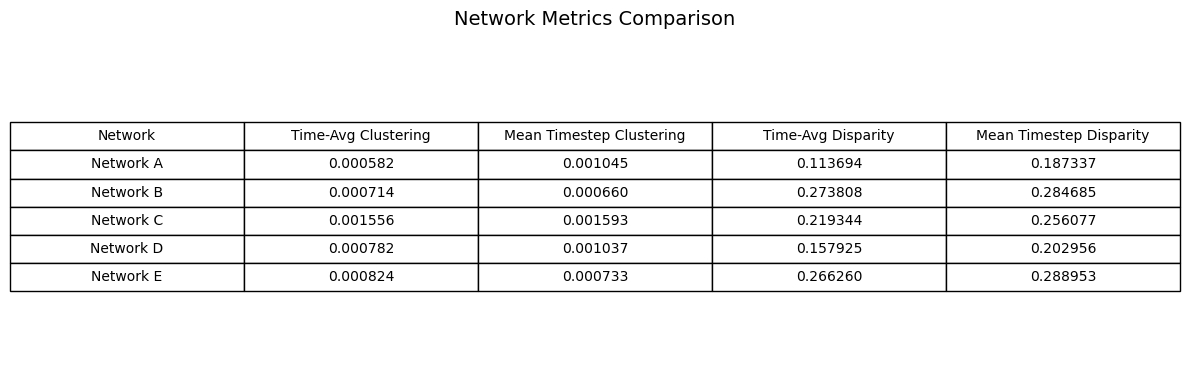

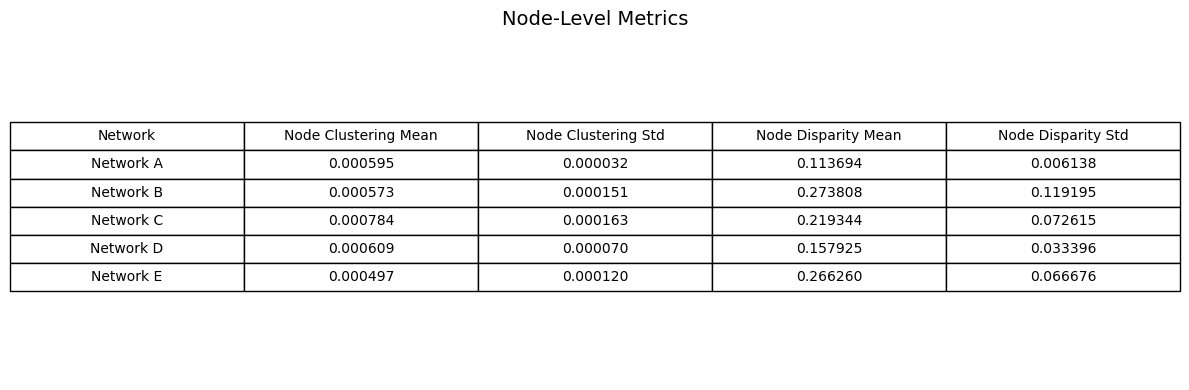

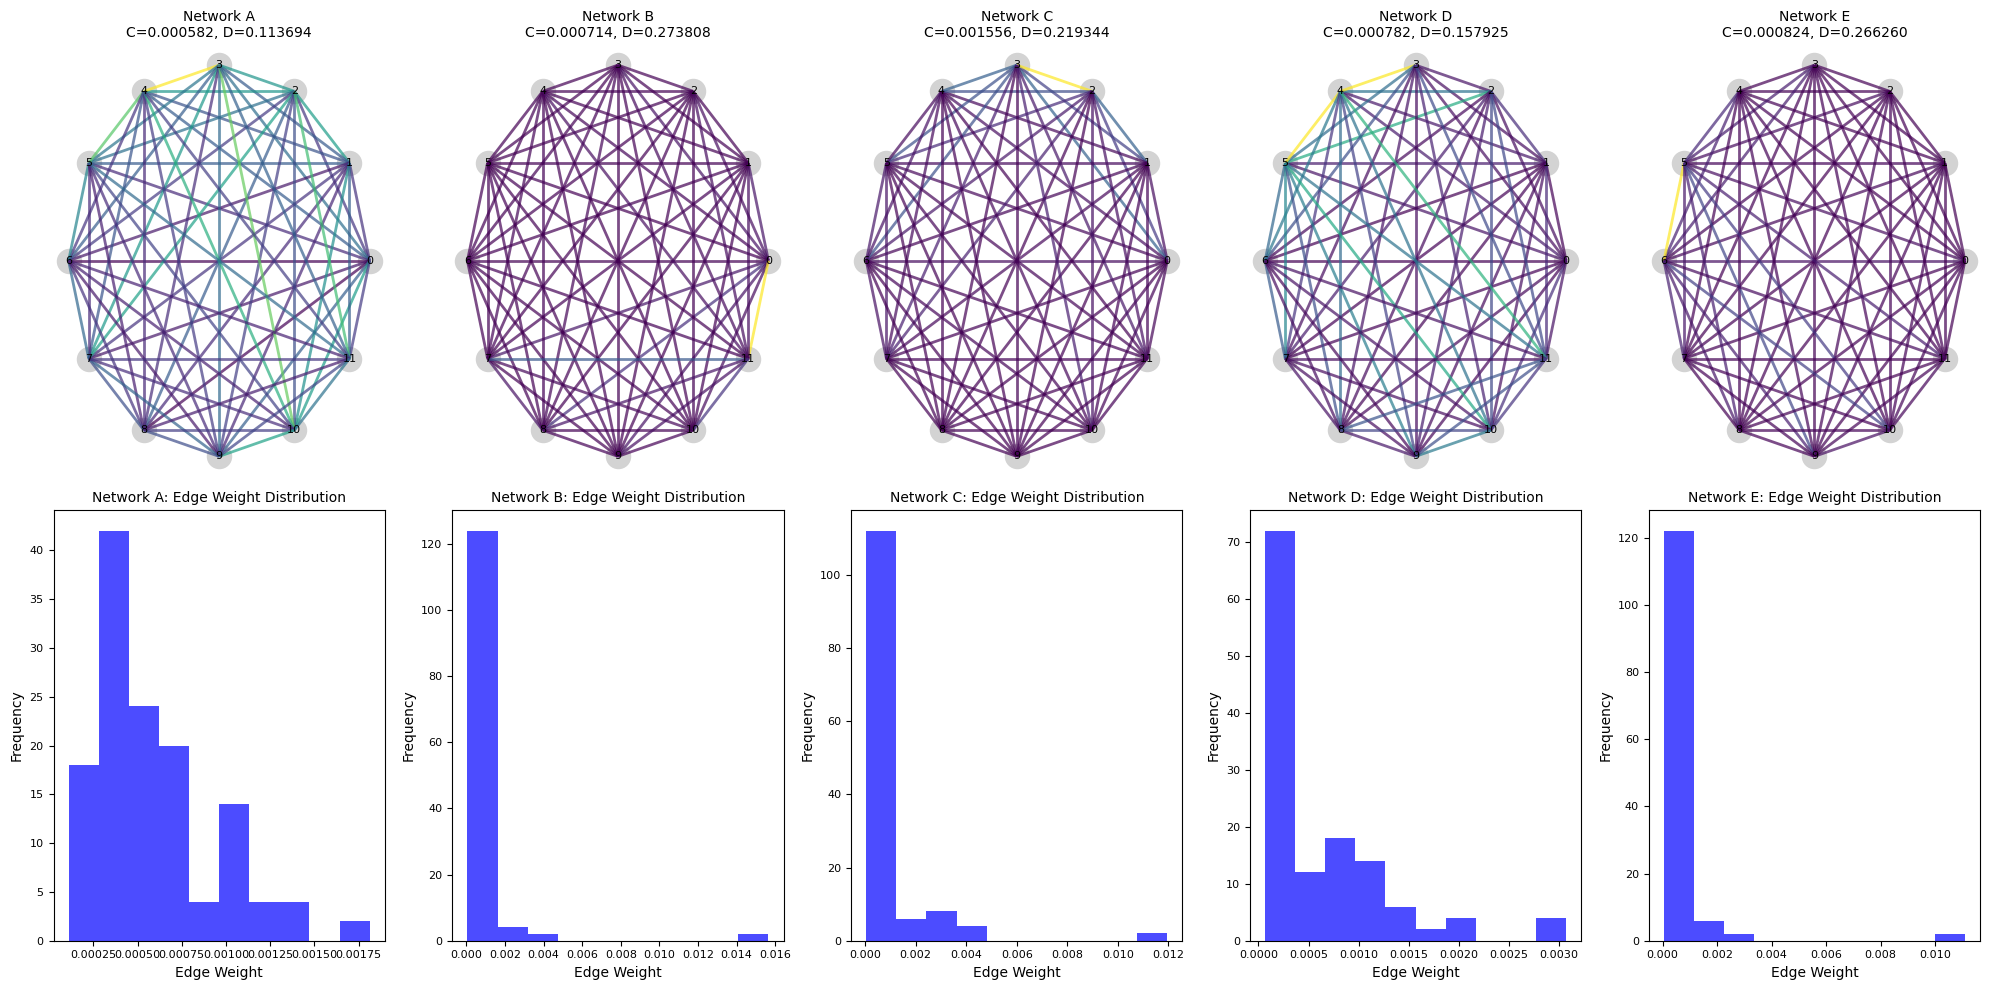

In [190]:
start =450
end=499
network_list = [
    MI_adj_random_all_c2_th[m][0][start:end],  # Time series for Network 1
    MI_adj_greedy_all_c2_th[m][0][start:end], 
    MI_adj_landscape_maximizes_all_c2_th[m][0][start:end],
    MI_adj_strongest_maximizes_all_c2_th[m][0][start:end],
    MI_adj_mimic_all_c2_th[m][0][start:end]# Time series for Network 2
    # ... and so on for all 5 networks
]

network_names = ["Network A", "Network B", "Network C", "Network D", "Network E"]

results = analyze_multiple_temporal_networks(network_list, network_names)

In [176]:
def analyze_temporal_network(adjacency_matrices, timestamps=None):
    """
    Analyze temporal evolution of network metrics
    
    Parameters:
    adjacency_matrices: list of numpy arrays, each representing network at a time point
    timestamps: optional list of time labels
    
    Returns:
    Dictionary of metrics
    """
    n_timepoints = len(adjacency_matrices)
    n_nodes = adjacency_matrices[0].shape[0]
    
    if timestamps is None:
        timestamps = list(range(n_timepoints))
    
    # Approach 1: Calculate metrics at each time step
    clustering_per_time = []
    disparity_per_time = []
    
    for t in range(n_timepoints):
        adj_mat = adjacency_matrices[t]
        clustering_per_time.append(clustering_coeff([adj_mat])[0])
        disparity_per_time.append(disparity_function([adj_mat], n_nodes)[0])
    
    # Approach 2: Calculate metrics on time-averaged matrix
    avg_adj_mat = np.mean(adjacency_matrices, axis=0)
    avg_clustering = clustering_coeff([avg_adj_mat])[0]
    avg_disparity = disparity_function([avg_adj_mat], n_nodes)[0]
    
    # Visualize results
    plt.figure(figsize=(12, 10))
    
    # Plot clustering coefficient evolution
    plt.subplot(2, 2, 1)
    plt.plot(timestamps, clustering_per_time, 'o-', label='Per-timestep')
    plt.axhline(y=avg_clustering, color='r', linestyle='--', label='From avg matrix')
    plt.axhline(y=np.mean(clustering_per_time), color='g', linestyle=':', label='Avg of per-timestep')
    plt.title('Clustering Coefficient Evolution')
    plt.xlabel('Time')
    plt.ylabel('Clustering')
    plt.legend()
    
    # Plot disparity evolution
    plt.subplot(2, 2, 2)
    plt.plot(timestamps, disparity_per_time, 'o-', label='Per-timestep')
    plt.axhline(y=avg_disparity, color='r', linestyle='--', label='From avg matrix')
    plt.axhline(y=np.mean(disparity_per_time), color='g', linestyle=':', label='Avg of per-timestep')
    plt.title('Disparity Evolution')
    plt.xlabel('Time')
    plt.ylabel('Disparity')
    plt.legend()
    
    # Visualize the time-averaged network
    plt.subplot(2, 2, 3)
    G_avg = nx.from_numpy_array(avg_adj_mat)
    pos = nx.circular_layout(G_avg)
    draw_network(G_avg, plt.gca(), f"Time-Averaged Network\nC={avg_clustering:.6f}, D={avg_disparity:.6f}")
    
    # Show metrics comparison table
    plt.subplot(2, 2, 4)
    metrics_data = {
        'Metric': ['Clustering', 'Disparity'],
        'Time-averaged Matrix': [f"{avg_clustering:.6f}", f"{avg_disparity:.6f}"],
        'Mean of Time-wise': [f"{np.mean(clustering_per_time):.6f}", f"{np.mean(disparity_per_time):.6f}"],
        'Std of Time-wise': [f"{np.std(clustering_per_time):.6f}", f"{np.std(disparity_per_time):.6f}"]
    }
    
    table = plt.table(
        cellText=[[metrics_data['Metric'][i], 
                   metrics_data['Time-averaged Matrix'][i],
                   metrics_data['Mean of Time-wise'][i],
                   metrics_data['Std of Time-wise'][i]] 
                 for i in range(len(metrics_data['Metric']))],
        colLabels=['Metric', 'Time-avg Matrix', 'Mean of Time-wise', 'Std Dev of Time-wise'],
        loc='center',
        cellLoc='center',
        colWidths=[0.25, 0.25, 0.25, 0.25]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'clustering_per_time': clustering_per_time,
        'disparity_per_time': disparity_per_time,
        'avg_clustering': avg_clustering,
        'avg_disparity': avg_disparity,
        'mean_clustering': np.mean(clustering_per_time),
        'mean_disparity': np.mean(disparity_per_time)
    }

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_53632/2306505113.py:31: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


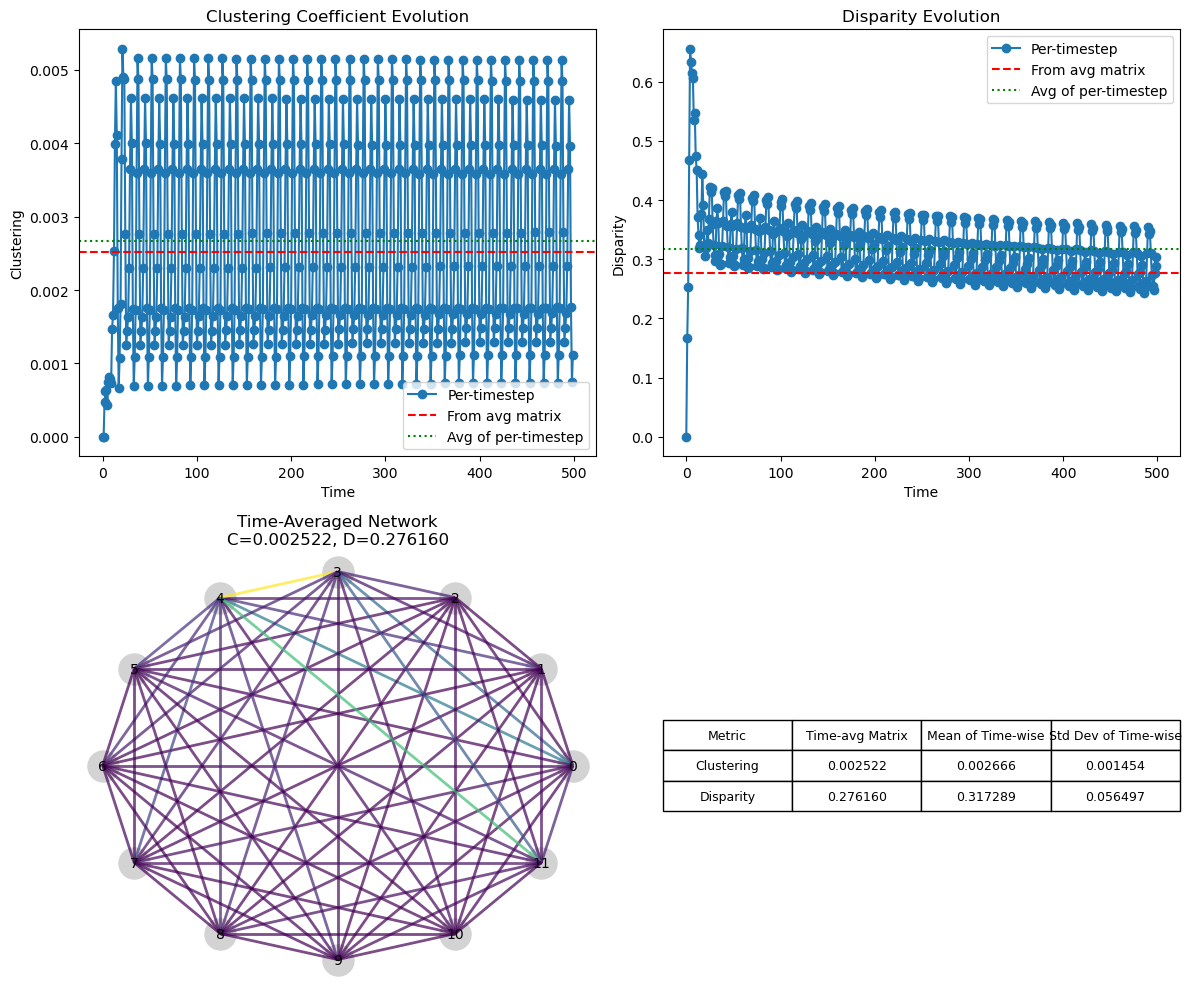

{'clustering_per_time': [np.int64(0),
  np.float64(0.0),
  np.float64(0.00047028071380244066),
  np.float64(0.000623267687182452),
  np.float64(0.000640583666256462),
  np.float64(0.0004358607411329415),
  np.float64(0.0007511461047971956),
  np.float64(0.000809086117764334),
  np.float64(0.0007823340905544169),
  np.float64(0.0007350104092414673),
  np.float64(0.0014718768370614226),
  np.float64(0.0016650194713982544),
  np.float64(0.002529826328548121),
  np.float64(0.003993629089673342),
  np.float64(0.004855174679249825),
  np.float64(0.004115208846868101),
  np.float64(0.0017504542525339695),
  np.float64(0.000667920859592914),
  np.float64(0.0010769220552180564),
  np.float64(0.0018133157232116629),
  np.float64(0.00378049792923147),
  np.float64(0.005289459484725984),
  np.float64(0.004897507712891859),
  np.float64(0.0048726220959212875),
  np.float64(0.0027645965307108553),
  np.float64(0.0012450145971130396),
  np.float64(0.0014391363558560017),
  np.float64(0.00163239352847

In [185]:
analyze_temporal_network(MI_adj_strongest_maximizes_all_c2_th[10][0])

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_53632/1674425045.py:118: RuntimeWarning: invalid value encountered in divide
  role_profiles = role_profiles / np.max(role_profiles, axis=0)


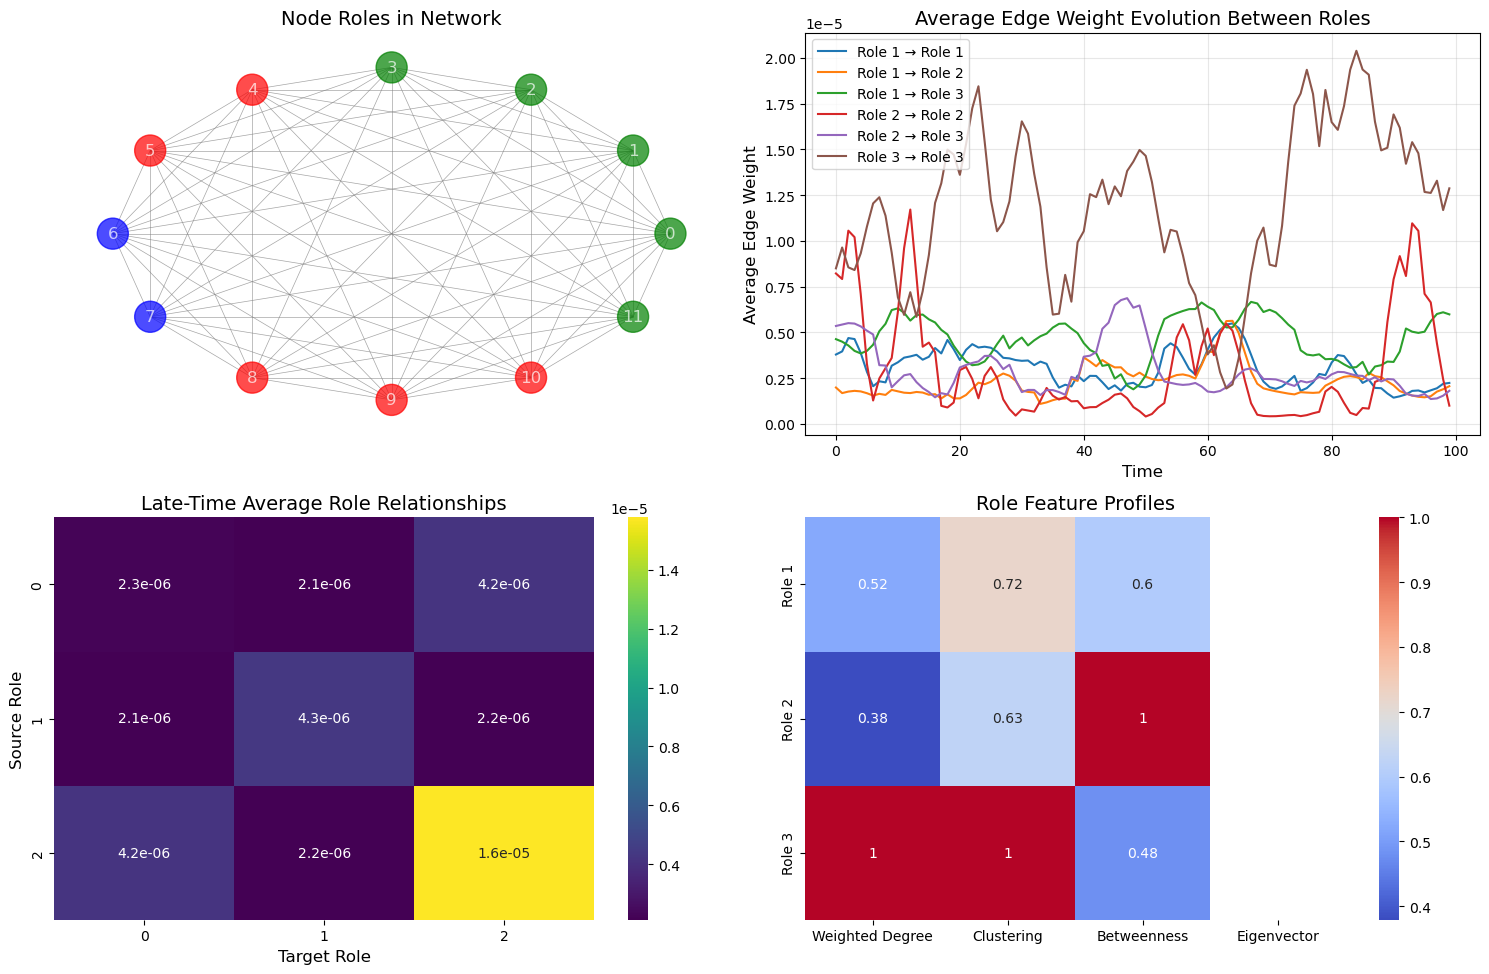

In [252]:
def analyze_node_roles(time_matrices, n_roles=3):
    """Identify node roles based on structural properties and average behavior by role"""
    n_timepoints = len(time_matrices)
    n_nodes = time_matrices[0].shape[0]
    
    # Calculate structural features for each node at each timepoint
    node_features = []
    
    for t in range(n_timepoints):
        adj_mat = time_matrices[t]
        G = nx.from_numpy_array(adj_mat)
        
        features = np.zeros((n_nodes, 4))
        
        # Feature 1: Weighted degree
        for i in range(n_nodes):
            features[i, 0] = np.sum(adj_mat[i])
        
        # Feature 2: Clustering coefficient
        clustering = nx.clustering(G, weight='weight')
        features[:, 1] = [clustering[i] for i in range(n_nodes)]
        
        # Feature 3: Betweenness centrality
        betweenness = nx.betweenness_centrality(G, weight='weight')
        features[:, 2] = [betweenness[i] for i in range(n_nodes)]
        
        # Feature 4: Eigenvector centrality
        try:
            eigenvector = nx.eigenvector_centrality(G, weight='weight')
            features[:, 3] = [eigenvector[i] for i in range(n_nodes)]
        except:
            features[:, 3] = 0  # Fallback if eigenvector centrality fails
            
        node_features.append(features)
    
    # Average features across late timepoints
    avg_features = np.mean(node_features, axis=0)
    
    # Cluster nodes into roles based on their features
    kmeans = KMeans(n_clusters=n_roles, random_state=42)
    roles = kmeans.fit_predict(avg_features)
    
    # Analyze edge weights between roles over time
    role_weights = np.zeros((n_timepoints, n_roles, n_roles))
    role_counts = np.zeros((n_roles, n_roles))
    
    for t in range(n_timepoints):
        adj_mat = time_matrices[t]
        for i in range(n_nodes):
            for j in range(n_nodes):
                if i != j and adj_mat[i, j] > 0:
                    role_i = roles[i]
                    role_j = roles[j]
                    role_weights[t, role_i, role_j] += adj_mat[i, j]
                    role_counts[role_i, role_j] += 1
    
    # Normalize by counts to get average weights
    for i in range(n_roles):
        for j in range(n_roles):
            if role_counts[i, j] > 0:
                role_weights[:, i, j] /= role_counts[i, j]
    
    # Visualize results
    fig = plt.figure(figsize=(15, 10))
    gs = GridSpec(2, 2, figure=fig)
    
    # Plot 1: Role assignments
    ax1 = fig.add_subplot(gs[0, 0])
    G_avg = nx.from_numpy_array(np.mean(time_matrices, axis=0))
    pos = nx.circular_layout(G_avg)
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    nx.draw_networkx(G_avg, pos=pos, with_labels=True, 
                    node_color=[colors[r] for r in roles],
                    node_size=500, font_color='white',
                    edge_color='gray', width=0.5, alpha=0.7,
                    ax=ax1)
    ax1.set_title("Node Roles in Network", fontsize=14)
    ax1.axis('off')
    
    # Plot 2: Role-to-role weight evolution
    ax2 = fig.add_subplot(gs[0, 1])
    for i in range(n_roles):
        for j in range(i, n_roles):
            if np.any(role_weights[:, i, j] > 0):
                label = f"Role {i+1} → Role {j+1}"
                ax2.plot(range(n_timepoints), role_weights[:, i, j], label=label)
    ax2.set_title("Average Edge Weight Evolution Between Roles", fontsize=14)
    ax2.set_xlabel("Time", fontsize=12)
    ax2.set_ylabel("Average Edge Weight", fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Heatmap of role relationships
    ax3 = fig.add_subplot(gs[1, 0])
    avg_role_weights = np.mean(role_weights[-int(n_timepoints*0.2):], axis=0)  # Last 20% of timepoints
    sns.heatmap(avg_role_weights, annot=True, cmap='viridis', ax=ax3)
    ax3.set_title("Late-Time Average Role Relationships", fontsize=14)
    ax3.set_xlabel("Target Role", fontsize=12)
    ax3.set_ylabel("Source Role", fontsize=12)
    
    # Plot 4: Role feature profiles
    ax4 = fig.add_subplot(gs[1, 1])
    feature_names = ['Weighted Degree', 'Clustering', 'Betweenness', 'Eigenvector']
    role_profiles = np.zeros((n_roles, 4))
    for r in range(n_roles):
        role_indices = np.where(roles == r)[0]
        role_profiles[r] = np.mean(avg_features[role_indices], axis=0)
    
    # Normalize for visualization
    role_profiles = role_profiles / np.max(role_profiles, axis=0)
    
    role_df = pd.DataFrame(role_profiles, columns=feature_names)
    role_df.index = [f'Role {i+1}' for i in range(n_roles)]
    sns.heatmap(role_df, annot=True, cmap='coolwarm', ax=ax4)
    ax4.set_title("Role Feature Profiles", fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'roles': roles,
        'role_weights': role_weights,
        'avg_features': avg_features,
        'role_profiles': role_profiles
    }

# Example usage:
result = analyze_node_roles(MI_adj_random_all_c2_th[10][0][350:450])

In [223]:
def analyze_motif_evolution(time_matrices):
    """Analyze the evolution of common network motifs over time"""
    n_timepoints = len(time_matrices)
    
    # Track various motif frequencies
    dyad_strengths = np.zeros(n_timepoints)
    triangle_strengths = np.zeros(n_timepoints)
    square_strengths = np.zeros(n_timepoints)
    star_strengths = np.zeros(n_timepoints)
    
    for t in range(n_timepoints):
        adj_mat = time_matrices[t]
        G = nx.from_numpy_array(adj_mat)
        
        # Dyads (direct connections)
        dyad_strengths[t] = np.mean(list(nx.get_edge_attributes(G, 'weight').values()))
        
        # Triangles
        M3_trace = np.trace(adj_mat @ adj_mat @ adj_mat)
        triangle_strengths[t] = M3_trace / 6  # Divide by 6 to account for double counting
        
        # Squares (4-cycles)
        M4_trace = np.trace(adj_mat @ adj_mat @ adj_mat @ adj_mat)
        square_strengths[t] = M4_trace / 8  # Divide by 8 to account for double counting
        
        # Stars (hub-spoke patterns)
        # We approximate star patterns by node degree variance
        degrees = np.array([G.degree(i, weight='weight') for i in range(G.number_of_nodes())])
        star_strengths[t] = np.var(degrees)
    
    # Visualize the evolution
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(range(n_timepoints), dyad_strengths)
    plt.title("Average Edge Strength Evolution")
    plt.xlabel("Time")
    plt.ylabel("Average Strength")
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 2)
    plt.plot(range(n_timepoints), triangle_strengths)
    plt.title("Triangle Motif Strength Evolution")
    plt.xlabel("Time")
    plt.ylabel("Triangle Strength")
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 3)
    plt.plot(range(n_timepoints), square_strengths)
    plt.title("Square Motif Strength Evolution")
    plt.xlabel("Time")
    plt.ylabel("Square Strength")
    plt.grid(True, alpha=0.3)
    
    plt.subplot(2, 2, 4)
    plt.plot(range(n_timepoints), star_strengths)
    plt.title("Star Motif Strength Evolution")
    plt.xlabel("Time")
    plt.ylabel("Degree Variance")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'dyad_strengths': dyad_strengths,
        'triangle_strengths': triangle_strengths,
        'square_strengths': square_strengths,
        'star_strengths': star_strengths
    }

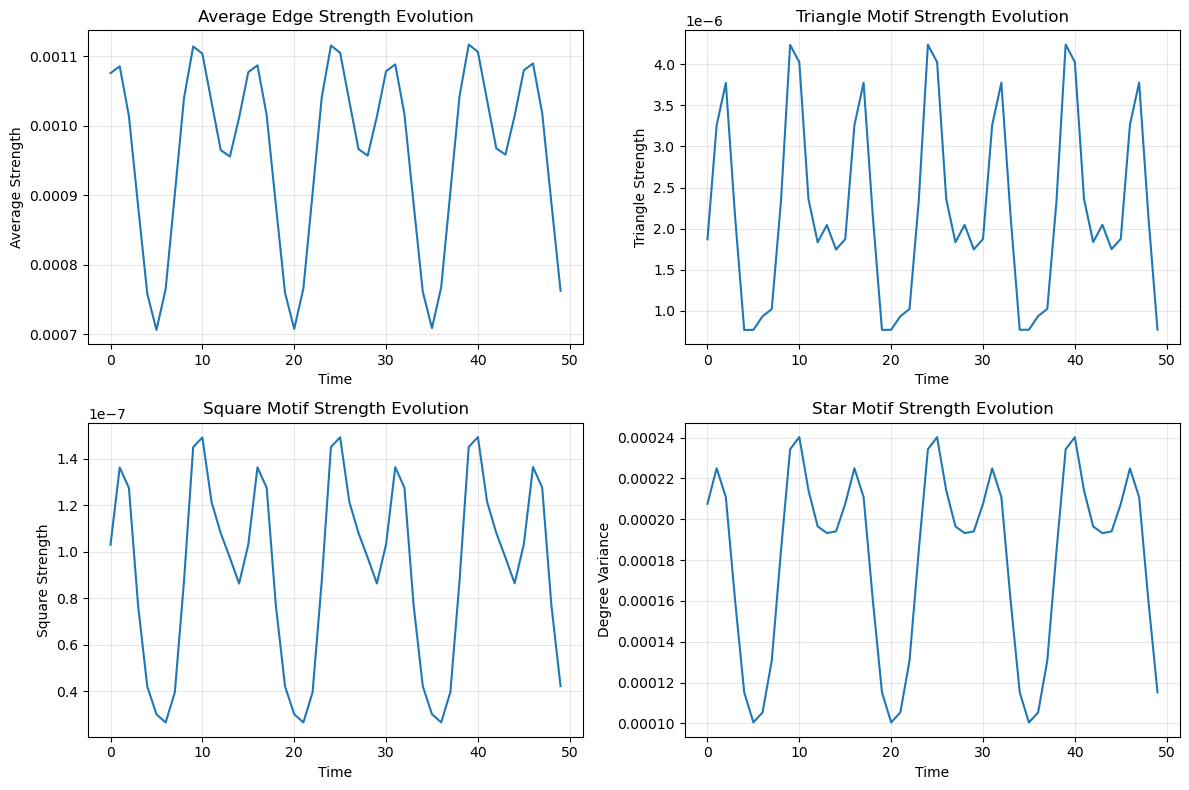

{'dyad_strengths': array([0.00107552, 0.00108532, 0.0010139 , 0.00088468, 0.00075818,
        0.00070594, 0.00076455, 0.00090135, 0.00103948, 0.00111384,
        0.00110348, 0.00103372, 0.00096471, 0.00095547, 0.00101149,
        0.00107689, 0.00108671, 0.00101523, 0.00088603, 0.00075947,
        0.00070731, 0.00076585, 0.00090268, 0.00104085, 0.00111522,
        0.00110482, 0.00103509, 0.00096611, 0.0009568 , 0.00101283,
        0.00107825, 0.00108802, 0.00101656, 0.00088737, 0.00076087,
        0.00070865, 0.00076724, 0.00090405, 0.0010422 , 0.00111653,
        0.00110619, 0.00103644, 0.00096744, 0.00095814, 0.00101419,
        0.00107957, 0.00108938, 0.00101795, 0.00088875, 0.00076221]),
 'triangle_strengths': array([1.86855019e-06, 3.25821974e-06, 3.77452301e-06, 2.15529934e-06,
        7.64086088e-07, 7.65825468e-07, 9.30390368e-07, 1.01789113e-06,
        2.32899339e-06, 4.23771843e-06, 4.02673619e-06, 2.35623278e-06,
        1.83192405e-06, 2.04291853e-06, 1.74411390e-06, 1.8704

In [328]:
analyze_motif_evolution(MI_adj_landscape_maximizes_all_c2_th[24][0][350:400])

In [226]:
def analyze_spectral_evolution(time_matrices):
    """Analyze the spectral properties of the network over time"""
    n_timepoints = len(time_matrices)
    n_nodes = time_matrices[0].shape[0]
    
    # Track eigenvalues
    largest_evals = np.zeros(n_timepoints)
    spectral_gaps = np.zeros(n_timepoints)
    entropy = np.zeros(n_timepoints)
    
    for t in range(n_timepoints):
        adj_mat = time_matrices[t]
        
        # Compute eigenvalues
        evals = np.linalg.eigvalsh(adj_mat)
        evals = np.sort(evals)[::-1]  # Sort in descending order
        
        largest_evals[t] = evals[0]
        spectral_gaps[t] = evals[0] - evals[1] if len(evals) > 1 else evals[0]
        
        # Spectral entropy (normalized)
        abs_evals = np.abs(evals)
        sum_abs = np.sum(abs_evals)
        if sum_abs > 0:
            probs = abs_evals / sum_abs
            entropy[t] = -np.sum(probs * np.log2(probs + 1e-10))
    
    # Visualize the evolution
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(range(n_timepoints), largest_evals)
    plt.title("Largest Eigenvalue Evolution")
    plt.xlabel("Time")
    plt.ylabel("Largest Eigenvalue")
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 2)
    plt.plot(range(n_timepoints), spectral_gaps)
    plt.title("Spectral Gap Evolution")
    plt.xlabel("Time")
    plt.ylabel("Spectral Gap")
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 3, 3)
    plt.plot(range(n_timepoints), entropy)
    plt.title("Spectral Entropy Evolution")
    plt.xlabel("Time")
    plt.ylabel("Entropy")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'largest_evals': largest_evals,
        'spectral_gaps': spectral_gaps,
        'entropy': entropy
    }


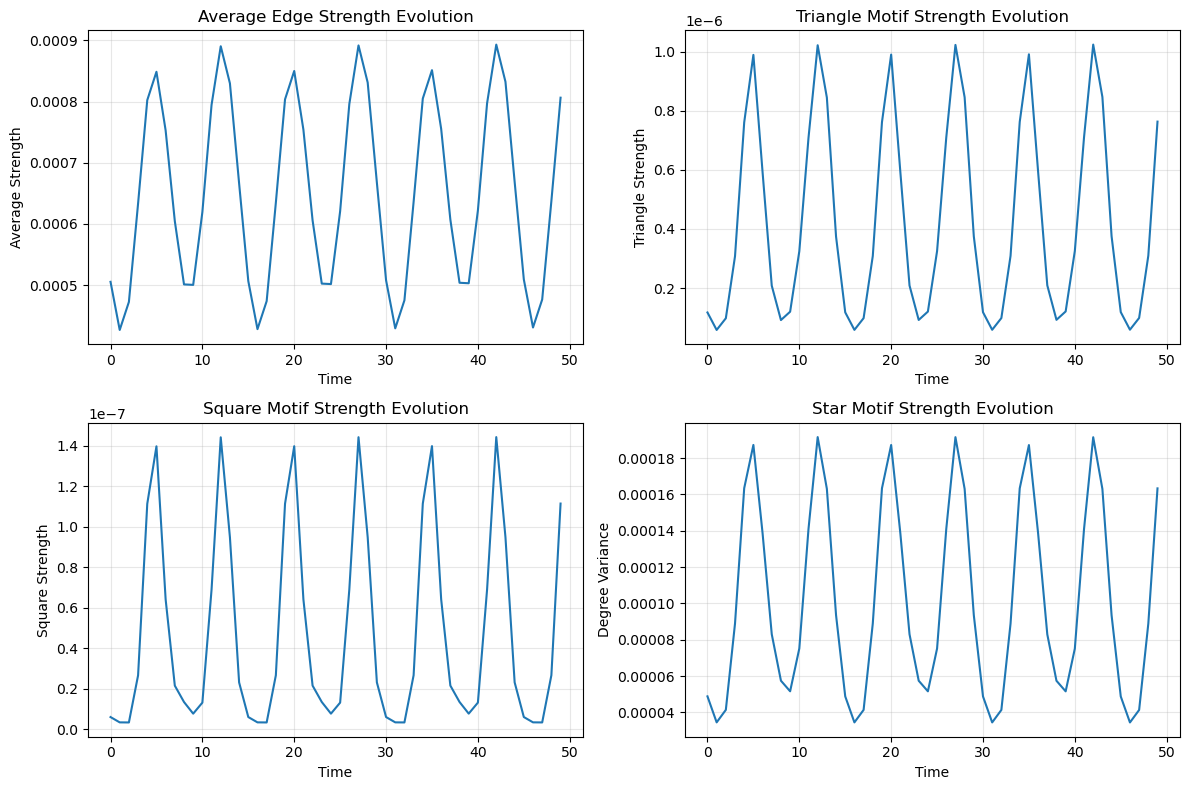

{'dyad_strengths': array([0.00050536, 0.00042668, 0.00047253, 0.00063343, 0.00080248,
        0.00084881, 0.0007529 , 0.00060455, 0.00050116, 0.0005004 ,
        0.00061948, 0.00079468, 0.00089055, 0.00082983, 0.00066633,
        0.00050665, 0.00042802, 0.00047384, 0.00063471, 0.00080376,
        0.00085013, 0.00075421, 0.00060587, 0.00050245, 0.00050172,
        0.00062079, 0.00079603, 0.00089191, 0.00083116, 0.00066761,
        0.00050799, 0.00042931, 0.00047517, 0.00063607, 0.00080508,
        0.00085146, 0.00075553, 0.00060723, 0.00050383, 0.00050306,
        0.00062215, 0.00079739, 0.00089326, 0.00083254, 0.00066898,
        0.00050931, 0.00043068, 0.0004765 , 0.00063741, 0.00080646]),
 'triangle_strengths': array([1.17334236e-07, 5.81130460e-08, 9.76399978e-08, 3.07892563e-07,
        7.60984689e-07, 9.89541716e-07, 5.92416261e-07, 2.08011754e-07,
        9.16176850e-08, 1.19926444e-07, 3.24502094e-07, 7.08473759e-07,
        1.02219817e-06, 8.45110135e-07, 3.74325414e-07, 1.1772

In [278]:
#analyze_spectral_evolution(MI_adj_greedy_all_c2_th[10][0][350:400])
analyze_motif_evolution(MI_adj_mimic_all_c2_th[10][0][350:400])

/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_64448/2623722462.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


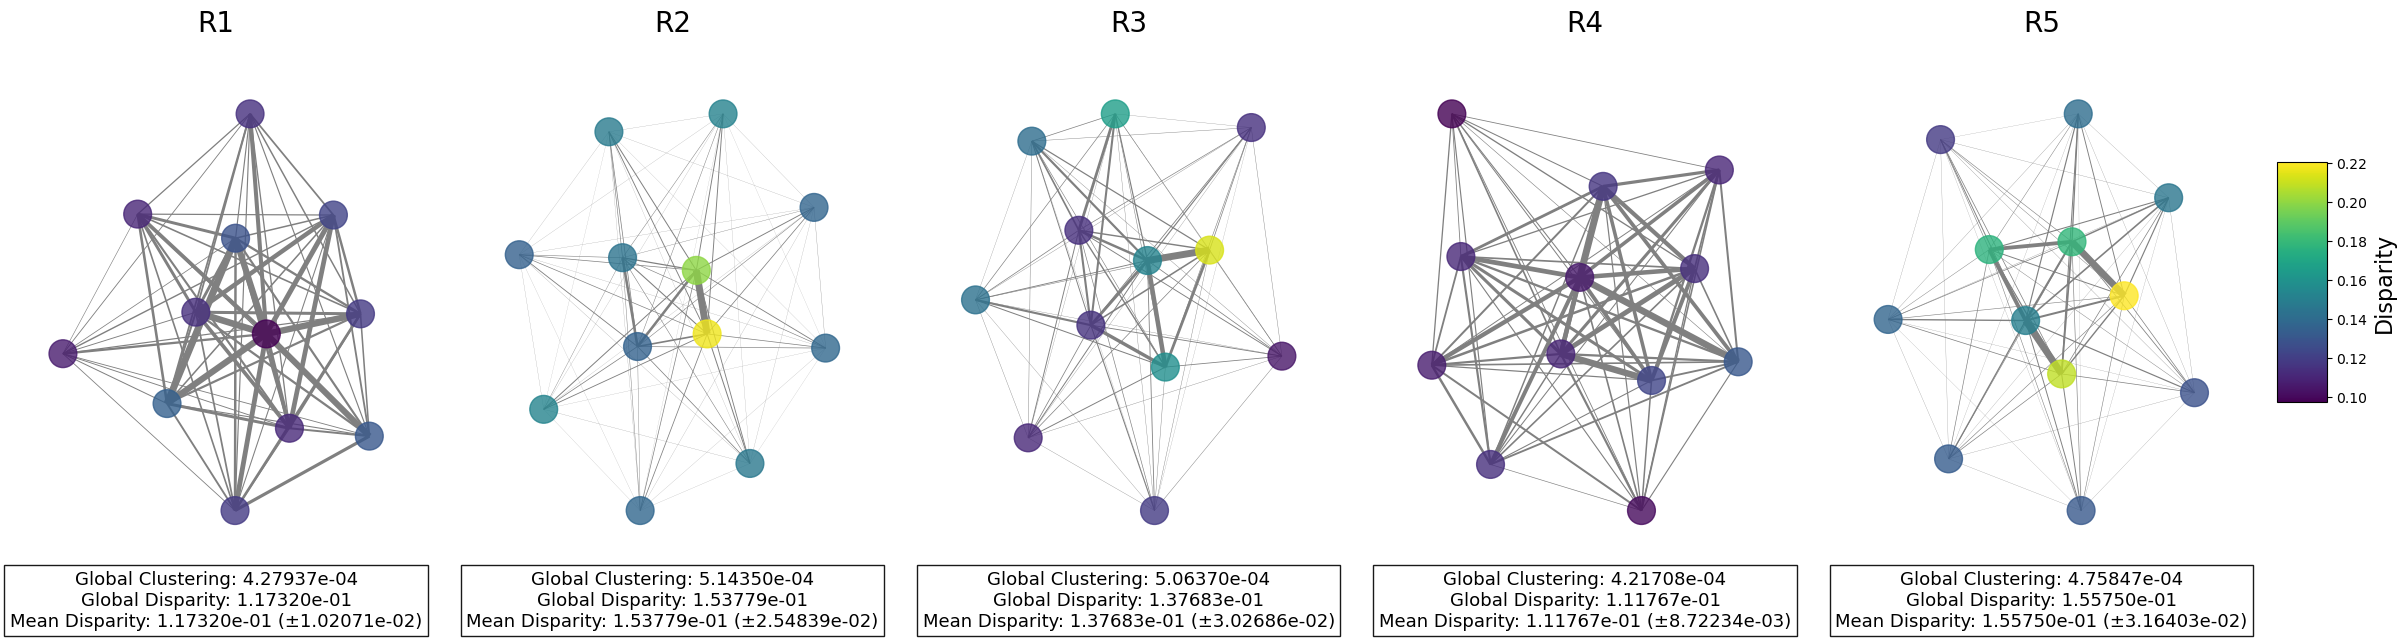

In [28]:
def disparity_per_node(adjacency_matrix):
    """Calculate disparity measure for each node in the graph using the provided formula"""
    adj_mat = np.array(adjacency_matrix)
    n_nodes = adj_mat.shape[0]
    node_disparity = {}
    
    for i in range(n_nodes):
        row_sum_squared = np.sum(adj_mat[i])**2
        row_sum_of_squared_elements = np.sum(adj_mat[i]**2)
        
        # Check for zero division
        if row_sum_squared == 0:
            node_disparity[i] = 0
        else:
            node_disparity[i] = row_sum_of_squared_elements / row_sum_squared
            
    return node_disparity

def clustering_coeff(adjacency_matrix_list):
    """Calculate global clustering coefficient for a list of adjacency matrices"""
    C_list = []
    for adj_mat in adjacency_matrix_list:
        adj_mat = np.array(adj_mat)
        M_sq = adj_mat @ adj_mat
        sum_of_M_sq = np.sum(M_sq)
        M_cube = adj_mat @ adj_mat @ adj_mat
        M_cube_trace = np.trace(M_cube)
        if sum_of_M_sq == 0:
            C_list.append(0)
        else:
            C_list.append(M_cube_trace / sum_of_M_sq)
    return np.array(C_list)

def disparity_function(adjacency_matrix_list, N):
    """Calculate global disparity for a list of adjacency matrices"""
    D_list = []
    for adj_mat in adjacency_matrix_list:
        M_row_sum_squared = np.sum(adj_mat, axis=1)**2
        M_row_sum_of_squared_elements = np.sum(adj_mat**2, axis=1)
        # Check for zero division before performing division
        Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)
        D_list.append(np.sum(Di) / N)
    return np.array(D_list)

def clustering_per_node(adjacency_matrix):
    """Calculate clustering coefficient for each node using the provided formula"""
    adj_mat = np.array(adjacency_matrix)
    n_nodes = adj_mat.shape[0]
    node_clustering = {}
    
    # Create a networkx graph to use for node-specific calculations
    G = nx.from_numpy_array(adj_mat)
    
    for i in range(n_nodes):
        neighbors = list(G.neighbors(i))
        if len(neighbors) <= 1:
            node_clustering[i] = 0.0
            continue
            
        triangles = 0
        possible_triangles = len(neighbors) * (len(neighbors) - 1) / 2
        
        if possible_triangles == 0:
            node_clustering[i] = 0.0
            continue
            
        # Count triangles for this node
        for j in neighbors:
            for k in neighbors:
                if j < k and G.has_edge(j, k):
                    triangles += 1
                    
        node_clustering[i] = triangles / possible_triangles
        
    return node_clustering

def visualize_multiple_networks(datasets, dataset_names=None):
    """
    Visualize multiple temporal networks using representative network method
    
    Parameters:
    datasets: list of lists of adjacency matrices, each representing a temporal network
    dataset_names: optional list of names for the datasets
    
    Returns:
    Dictionary with metrics for each dataset and method
    """
    if dataset_names is None:
        dataset_names = [f"R {i+1}" for i in range(len(datasets))]
    
    n_datasets = len(datasets)
    
    # First pass: calculate all disparity values to determine global min/max
    all_node_disparity = []
    rep_matrices = []
    
    for dataset in datasets:
        # Calculate representative matrix
        n_timepoints = len(dataset)
        late_period = int(n_timepoints * 0.25)
        rep_matrix = np.mean(dataset[-late_period:], axis=0)
        rep_matrices.append(rep_matrix)
        
        # Calculate disparity for each node
        node_disparity_values = list(disparity_per_node(rep_matrix).values())
        all_node_disparity.extend(node_disparity_values)
    
    # Determine global min and max disparity values
    global_min_disparity = min(all_node_disparity)
    global_max_disparity = max(all_node_disparity)
    
    # Create a figure with 1 row and n_datasets columns
    fig = plt.figure(figsize=(5*n_datasets, 6))
    gs = GridSpec(1, n_datasets, figure=fig)
    
    # Store metrics for all datasets
    all_metrics = {name: {} for name in dataset_names}
    
    # For each dataset, create a representative network
    for col, (dataset, name, rep_matrix) in enumerate(zip(datasets, dataset_names, rep_matrices)):
        # Create subplot
        ax = fig.add_subplot(gs[0, col])
        
        # Generate representative network with global disparity range
        rep_matrix, G_rep, metrics = create_representative_network(
            dataset, 
            rep_matrix=rep_matrix,
            ax=ax, 
            title=f"{name}\n",
            global_min_disparity=global_min_disparity,
            global_max_disparity=global_max_disparity
        )
        
        # Store metrics
        all_metrics[name] = metrics
    
    # Add a single colorbar for the entire figure
    cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                             norm=plt.Normalize(vmin=global_min_disparity, 
                                              vmax=global_max_disparity))
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('Disparity',fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, bottom=0.05, right=0.9, hspace=0.3)
    plt.savefig('MI_12_Q_therm_all_rules_spring_network_c4.png', bbox_inches='tight', pad_inches=0.5, dpi=300)
    plt.show()
    
    # Print summary metrics
    #print("\nSummary Metrics:")
    #for name in dataset_names:
    #    print(f"\n{name}:")
    #    metrics = all_metrics[name]
    #    for key, value in metrics.items():
    #        print(f"    - {key}: {value}")
    
    return all_metrics

def create_representative_network(time_matrices, ax=None, title=None, rep_matrix=None, 
                            global_min_disparity=None, global_max_disparity=None):
    """
    Create and visualize a representative network from time-evolving data
    
    Parameters:
    time_matrices: list of adjacency matrices over time
    ax: matplotlib axis for plotting (if None, creates a new figure)
    title: title for the plot
    rep_matrix: pre-computed representative matrix (if None, it will be calculated)
    global_min_disparity: minimum disparity value for color normalization
    global_max_disparity: maximum disparity value for color normalization
    
    Returns:
    Representative adjacency matrix, networkx graph, and metrics
    """
    n_timepoints = len(time_matrices)
    n_nodes = time_matrices[0].shape[0]
    
    # Calculate representative matrix if not provided
    if rep_matrix is None:
        # Calculate representative matrix - using last 20% of time points
        late_period = int(n_timepoints * 0.2)
        rep_matrix = np.mean(time_matrices[-late_period:], axis=0)
    
    # Create a new figure if needed
    if ax is None:
        plt.figure(figsize=(10, 8))
        ax = plt.gca()
    
    # Create networkx graph
    G_rep = nx.from_numpy_array(rep_matrix)
    
    # Edge weights for thickness
    edges = G_rep.edges()
    edge_weights = nx.get_edge_attributes(G_rep, 'weight')
    if edge_weights:
        max_weight = max(edge_weights.values()) if edge_weights else 1.0
        weights = [G_rep[u][v]['weight'] * 5.0 / max_weight for u, v in edges]
    else:
        weights = [1.0] * len(edges)
    
    # Node sizes (fixed)
    node_sizes = [400] * n_nodes
    
    # Calculate clustering coefficient for each node using provided formula
    node_clustering = list(clustering_per_node(rep_matrix).values())
    
    # Calculate disparity for each node using provided formula
    node_disparity = list(disparity_per_node(rep_matrix).values())
    
    # Position nodes
    pos = nx.spring_layout(G_rep, weight='weight', k=0.3, iterations=300, seed=42)
    
    # Draw the network with disparity coloring
    # Use global min/max disparity values if provided, otherwise use local values
    if global_min_disparity is not None and global_max_disparity is not None:
        vmin, vmax = global_min_disparity, global_max_disparity
    else:
        vmin, vmax = min(node_disparity), max(node_disparity)
        
    nodes = nx.draw_networkx_nodes(G_rep, pos, 
                                  node_size=node_sizes,
                                  node_color=node_disparity,
                                  cmap=plt.cm.viridis,
                                  vmin=vmin,
                                  vmax=vmax,
                                  alpha=0.8,
                                  ax=ax)
    
    # Individual colorbar is skipped - we'll add a global one later
    
    # Draw edges with varying thickness
    edges = nx.draw_networkx_edges(G_rep, pos, 
                                  width=weights,
                                  edge_color='gray',
                                  alpha=1,
                                  ax=ax)
    
    # Draw labels for smaller networks
    if n_nodes <= 10:
        nx.draw_networkx_labels(G_rep, pos, font_size=8, ax=ax)
    
    # Calculate key metrics for the representative network
    metrics = {}
    
    # Basic network metrics
    metrics['density'] = nx.density(G_rep)
    metrics['num_edges'] = G_rep.number_of_edges()
    
    # Global clustering using the provided formula
    metrics['global_clustering'] = clustering_coeff([rep_matrix])[0]
    
    # Global disparity using the provided formula
    n_nodes = rep_matrix.shape[0]
    metrics['global_disparity'] = disparity_function([rep_matrix], n_nodes)[0]
    
    # Node-level metrics
    metrics['mean_clustering'] = np.mean(node_clustering)
    metrics['std_clustering'] = np.std(node_clustering)
    
    # Disparity metrics
    metrics['mean_disparity'] = np.mean(node_disparity)
    metrics['std_disparity'] = np.std(node_disparity)
    
    try:
        if nx.is_connected(G_rep):
            metrics['avg_path_length'] = nx.average_shortest_path_length(G_rep, weight='weight')
        else:
            # Calculate for largest connected component
            gcc = max(nx.connected_components(G_rep), key=len)
            metrics['avg_path_length'] = nx.average_shortest_path_length(
                G_rep.subgraph(gcc), weight='weight')
    except:
        metrics['avg_path_length'] = 'N/A'
    
    # Display mean and std of clustering and disparity under the graph
    if title:
        ax.set_title(title, fontsize=20)
    
    # Add text with metrics below the graph
    plt.text(0.5, -0.1, 
             f"Global Clustering: {metrics['global_clustering']:.5e}\n"
             f"Global Disparity: {metrics['global_disparity']:.5e}\n"
             #f"Mean Clustering: {metrics['mean_clustering']:.6e} (±{metrics['std_clustering']:.6e})\n"
             f"Mean Disparity: {metrics['mean_disparity']:.5e} (±{metrics['std_disparity']:.5e})",
             horizontalalignment='center',
             verticalalignment='center',
             transform=ax.transAxes,
             fontsize=13,
             bbox=dict(facecolor='white', alpha=0.9))
    
    ax.axis('off')
    
    
    return rep_matrix, G_rep, metrics


m=45
start =300
end=499
network_list = [
    MI_adj_random_all_c4_th[m][0][start:end],  # Time series for Network 1
    MI_adj_greedy_all_c4_th[m][0][start:end], 
    MI_adj_landscape_maximizes_all_c4_th[m][0][start:end],
    MI_adj_strongest_maximizes_all_c4_th[m][0][start:end],
    MI_adj_mimic_all_c4_th[m][0][start:end]  # Time series for Network 2
]

network_names = ["R1", "R2", "R3", "R4", "R5"]

all_metrics = visualize_multiple_networks(network_list, dataset_names=network_names)





/var/folders/58/gxcqk5bd4055b6n0b6yszvlw0000gn/T/ipykernel_64448/1749964621.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


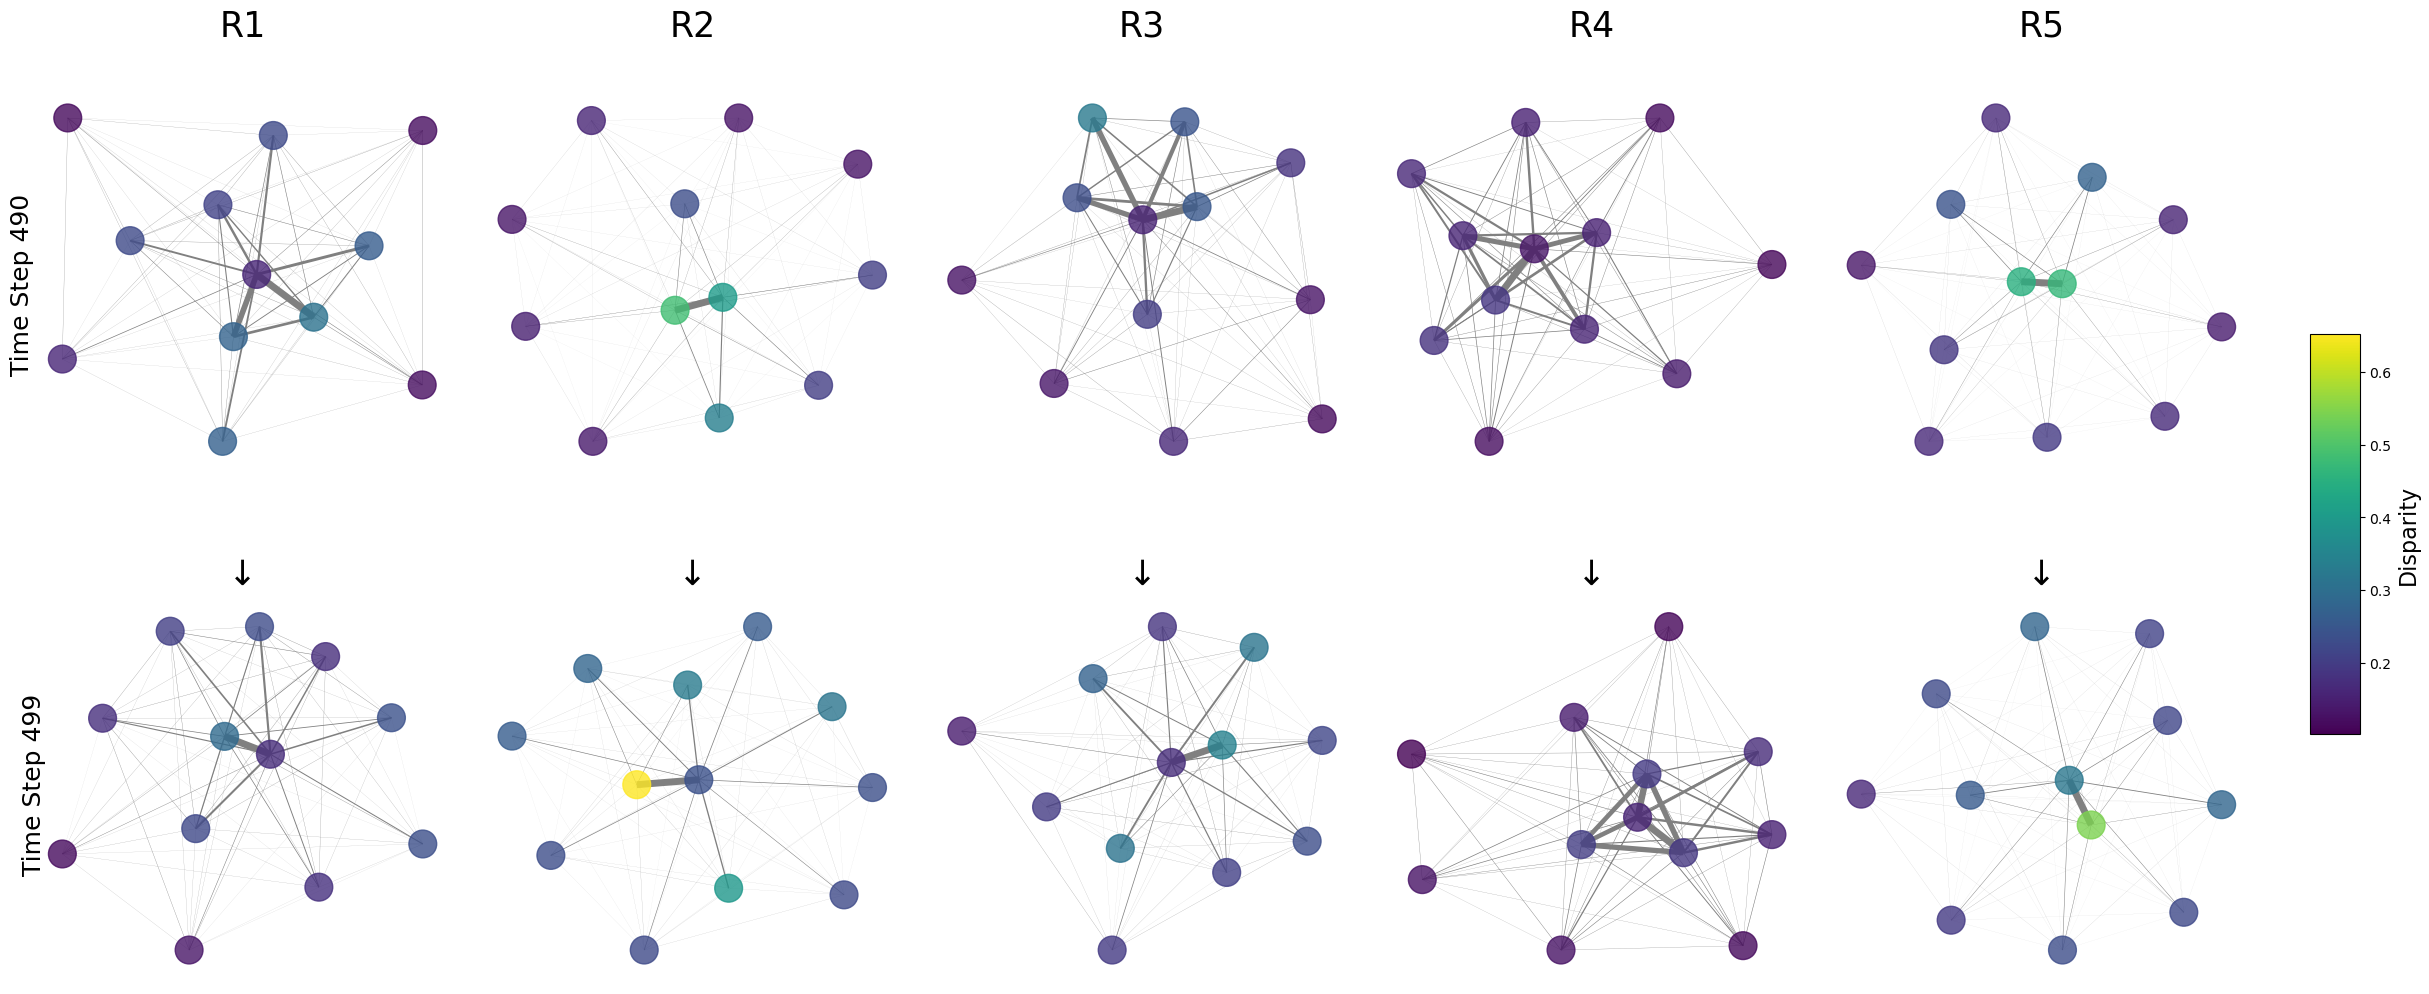


Summary Metrics:

R1:
  Early Time Step:
    - density: 1.0
    - num_edges: 66
    - global_clustering: 0.0007478570071780366
    - global_disparity: 0.20455503193789382
    - mean_clustering: 1.0
    - std_clustering: 0.0
    - mean_disparity: 0.20455503193789382
    - std_disparity: 0.06448342484425482
    - avg_path_length: 0.00013346100043815258
  Late Time Step:
    - density: 1.0
    - num_edges: 66
    - global_clustering: 0.0005811935362812733
    - global_disparity: 0.19726786098209861
    - mean_clustering: 1.0
    - std_clustering: 0.0
    - mean_disparity: 0.19726786098209861
    - std_disparity: 0.046409457512015535
    - avg_path_length: 0.0001764232428528065

R2:
  Early Time Step:
    - density: 1.0
    - num_edges: 66
    - global_clustering: 0.0004977950880717605
    - global_disparity: 0.2251459539522913
    - mean_clustering: 1.0
    - std_clustering: 0.0
    - mean_disparity: 0.2251459539522913
    - std_disparity: 0.11319078795594177
    - avg_path_length: 0.000

In [23]:
def disparity_per_node(adjacency_matrix):
    """Calculate disparity measure for each node in the graph using the provided formula"""
    adj_mat = np.array(adjacency_matrix)
    n_nodes = adj_mat.shape[0]
    node_disparity = {}
    
    for i in range(n_nodes):
        row_sum_squared = np.sum(adj_mat[i])**2
        row_sum_of_squared_elements = np.sum(adj_mat[i]**2)
        
        # Check for zero division
        if row_sum_squared == 0:
            node_disparity[i] = 0
        else:
            node_disparity[i] = row_sum_of_squared_elements / row_sum_squared
            
    return node_disparity

def clustering_coeff(adjacency_matrix_list):
    """Calculate global clustering coefficient for a list of adjacency matrices"""
    C_list = []
    for adj_mat in adjacency_matrix_list:
        adj_mat = np.array(adj_mat)
        M_sq = adj_mat @ adj_mat
        sum_of_M_sq = np.sum(M_sq)
        M_cube = adj_mat @ adj_mat @ adj_mat
        M_cube_trace = np.trace(M_cube)
        if sum_of_M_sq == 0:
            C_list.append(0)
        else:
            C_list.append(M_cube_trace / sum_of_M_sq)
    return np.array(C_list)

def disparity_function(adjacency_matrix_list, N):
    """Calculate global disparity for a list of adjacency matrices"""
    D_list = []
    for adj_mat in adjacency_matrix_list:
        M_row_sum_squared = np.sum(adj_mat, axis=1)**2
        M_row_sum_of_squared_elements = np.sum(adj_mat**2, axis=1)
        # Check for zero division before performing division
        Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)
        D_list.append(np.sum(Di) / N)
    return np.array(D_list)

def clustering_per_node(adjacency_matrix):
    """Calculate clustering coefficient for each node using the provided formula"""
    adj_mat = np.array(adjacency_matrix)
    n_nodes = adj_mat.shape[0]
    node_clustering = {}
    
    # Create a networkx graph to use for node-specific calculations
    G = nx.from_numpy_array(adj_mat)
    
    for i in range(n_nodes):
        neighbors = list(G.neighbors(i))
        if len(neighbors) <= 1:
            node_clustering[i] = 0.0
            continue
            
        triangles = 0
        possible_triangles = len(neighbors) * (len(neighbors) - 1) / 2
        
        if possible_triangles == 0:
            node_clustering[i] = 0.0
            continue
            
        # Count triangles for this node
        for j in neighbors:
            for k in neighbors:
                if j < k and G.has_edge(j, k):
                    triangles += 1
                    
        node_clustering[i] = triangles / possible_triangles
        
    return node_clustering

def visualize_network_evolution(datasets, time_step1, time_step2, dataset_names=None):
    """
    Visualize networks at two different time steps to show evolution
    
    Parameters:
    datasets: list of lists of adjacency matrices, each representing a temporal network
    time_step1: first time step to visualize
    time_step2: second time step to visualize
    dataset_names: optional list of names for the datasets
    
    Returns:
    Dictionary with metrics for each dataset and time step
    """
    if dataset_names is None:
        dataset_names = [f"Network {i+1}" for i in range(len(datasets))]
    
    n_datasets = len(datasets)
    
    # Verify time steps are valid
    max_time_steps = min([len(dataset) for dataset in datasets])
    if time_step1 >= max_time_steps or time_step2 >= max_time_steps:
        raise ValueError(f"Time steps must be less than {max_time_steps}")
    
    # First pass: calculate all disparity values to determine global min/max
    all_node_disparity = []
    matrices = {
        'early': [],
        'late': []
    }
    
    for dataset in datasets:
        # Get matrices at the two time steps
        early_matrix = dataset[time_step1]
        late_matrix = dataset[time_step2]
        
        matrices['early'].append(early_matrix)
        matrices['late'].append(late_matrix)
        
        # Calculate disparity for each node
        early_disparity = list(disparity_per_node(early_matrix).values())
        late_disparity = list(disparity_per_node(late_matrix).values())
        
        all_node_disparity.extend(early_disparity)
        all_node_disparity.extend(late_disparity)
    
    # Determine global min and max disparity values
    global_min_disparity = min(all_node_disparity)
    global_max_disparity = max(all_node_disparity)
    
    # Create a figure with 2 rows (time steps) and n_datasets columns
    fig = plt.figure(figsize=(5*n_datasets, 10))
    gs = GridSpec(2, n_datasets, figure=fig, height_ratios=[1, 1])
    
    # Store metrics for all datasets and time steps
    all_metrics = {name: {'early': {}, 'late': {}} for name in dataset_names}
    
    # For each dataset and time step, create a network visualization
    for col, (name, early_matrix, late_matrix) in enumerate(zip(dataset_names, 
                                                               matrices['early'], 
                                                               matrices['late'])):
        # Early time step (row 0)
        ax_early = fig.add_subplot(gs[0, col])
        early_metrics = visualize_single_network(
            early_matrix,
            ax=ax_early,
            title=f"{name}\n",
            global_min_disparity=global_min_disparity,
            global_max_disparity=global_max_disparity
        )
        all_metrics[name]['early'] = early_metrics
        
        # Late time step (row 1)
        ax_late = fig.add_subplot(gs[1, col])
        late_metrics = visualize_single_network(
            late_matrix,
            ax=ax_late,
            title='↓',
            global_min_disparity=global_min_disparity,
            global_max_disparity=global_max_disparity
        )
        all_metrics[name]['late'] = late_metrics
    
    # Add a single colorbar for the entire figure
    cax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, 
                               norm=plt.Normalize(vmin=global_min_disparity, 
                                                 vmax=global_max_disparity))
    sm.set_array([])
    cbar = fig.colorbar(sm, cax=cax)
    cbar.set_label('Disparity',fontsize=16)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, bottom=0.05, right=0.9, hspace=0.3)
    
    # Add super titles for the rows
    #fig.text(0.5, 0.98, f"Network Evolution Comparison", ha='center', va='center', fontsize=16)
    fig.text(0.005, 0.75, f"Time Step {time_step1}", ha='center', va='center', fontsize=18, rotation=90)
    fig.text(0.005, 0.25, f"Time Step {time_step2}", ha='left', va='center', fontsize=18, rotation=90)
    #fig.text(0.5, 0.5, "↓", ha='center', va='center', fontsize=80, color='black')

    plt.savefig('MI_12_Q_therm_all_rules_spring_network_time_evolution_495-499_c4.png', bbox_inches='tight', pad_inches=0.5, dpi=300)

    plt.show()
    
    # Print summary metrics
    print("\nSummary Metrics:")
    for name in dataset_names:
        print(f"\n{name}:")
        print("  Early Time Step:")
        for key, value in all_metrics[name]['early'].items():
            print(f"    - {key}: {value}")
        print("  Late Time Step:")
        for key, value in all_metrics[name]['late'].items():
            print(f"    - {key}: {value}")
    
    return all_metrics

def visualize_single_network(adjacency_matrix, ax=None, title=None, 
                           global_min_disparity=None, global_max_disparity=None):
    """
    Create and visualize a network from a single adjacency matrix
    
    Parameters:
    adjacency_matrix: adjacency matrix for the network
    ax: matplotlib axis for plotting
    title: title for the plot
    global_min_disparity: minimum disparity value for color normalization
    global_max_disparity: maximum disparity value for color normalization
    
    Returns:
    Dictionary with network metrics
    """
    n_nodes = adjacency_matrix.shape[0]
    
    # Create a new figure if needed
    if ax is None:
        plt.figure(figsize=(10, 8))
        ax = plt.gca()
    
    # Create networkx graph
    G = nx.from_numpy_array(adjacency_matrix)
    
    # Edge weights for thickness
    edges = G.edges()
    edge_weights = nx.get_edge_attributes(G, 'weight')
    if edge_weights:
        max_weight = max(edge_weights.values()) if edge_weights else 1.0
        weights = [G[u][v]['weight'] * 5.0 / max_weight for u, v in edges]
    else:
        weights = [1.0] * len(edges)
    
    # Node sizes (fixed)
    node_sizes = [400] * n_nodes
    
    # Calculate clustering coefficient for each node
    node_clustering = list(clustering_per_node(adjacency_matrix).values())
    
    # Calculate disparity for each node
    node_disparity = list(disparity_per_node(adjacency_matrix).values())
    
    # Position nodes
    pos = nx.spring_layout(G, weight='weight', k=0.3, iterations=300, seed=42)
    
    # Draw the network with disparity coloring
    # Use global min/max disparity values if provided, otherwise use local values
    if global_min_disparity is not None and global_max_disparity is not None:
        vmin, vmax = global_min_disparity, global_max_disparity
    else:
        vmin, vmax = min(node_disparity), max(node_disparity)
        
    nodes = nx.draw_networkx_nodes(G, pos, 
                                  node_size=node_sizes,
                                  node_color=node_disparity,
                                  cmap=plt.cm.viridis,
                                  vmin=vmin,
                                  vmax=vmax,
                                  alpha=0.8,
                                  ax=ax)
    
    # Draw edges with varying thickness
    edges = nx.draw_networkx_edges(G, pos, 
                                  width=weights,
                                  edge_color='gray',
                                  alpha=1,
                                  ax=ax)
    
    # Draw labels for smaller networks
    if n_nodes <= 10:
        nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)
    
    # Calculate key metrics for the network
    metrics = {}
    
    # Basic network metrics
    metrics['density'] = nx.density(G)
    metrics['num_edges'] = G.number_of_edges()
    
    # Global clustering using the provided formula
    metrics['global_clustering'] = clustering_coeff([adjacency_matrix])[0]
    
    # Global disparity using the provided formula
    metrics['global_disparity'] = disparity_function([adjacency_matrix], n_nodes)[0]
    
    # Node-level metrics
    metrics['mean_clustering'] = np.mean(node_clustering)
    metrics['std_clustering'] = np.std(node_clustering)
    
    # Disparity metrics
    metrics['mean_disparity'] = np.mean(node_disparity)
    metrics['std_disparity'] = np.std(node_disparity)
    
    try:
        if nx.is_connected(G):
            metrics['avg_path_length'] = nx.average_shortest_path_length(G, weight='weight')
        else:
            # Calculate for largest connected component
            gcc = max(nx.connected_components(G), key=len)
            metrics['avg_path_length'] = nx.average_shortest_path_length(
                G.subgraph(gcc), weight='weight')
    except:
        metrics['avg_path_length'] = 'N/A'
    
    # Display mean and std of clustering and disparity under the graph
    if title:
        ax.set_title(title, fontsize=25)
    
    # Add text with metrics below the graph
   # plt.text(0.5, -0.15, 
   #          f"Global Clustering: {metrics['global_clustering']:.5e}\n"
   #          f"Global Disparity: {metrics['global_disparity']:.6e}\n"
   #          #f"Mean Clustering: {metrics['mean_clustering']:.6e} (±{metrics['std_clustering']:.6e})\n"
   #          f"Mean Disparity: {metrics['mean_disparity']:.6e} (±{metrics['std_disparity']:.6e})",
   #          horizontalalignment='center',
   #          verticalalignment='center',
   #          transform=ax.transAxes,
   #          fontsize=8,
   #          bbox=dict(facecolor='white', alpha=0.7))
    
    ax.axis('off')
    
    return metrics

# Example usage:
start=0
end=500
# Define networks
network_list = [
    MI_adj_random_all_c4_th[m][0][start:end],  # Time series for Network 1
    MI_adj_greedy_all_c4_th[m][0][start:end], 
    MI_adj_landscape_maximizes_all_c4_th[m][0][start:end],
    MI_adj_strongest_maximizes_all_c4_th[m][0][start:end],
    MI_adj_mimic_all_c4_th[m][0][start:end]  # Time series for Network 2
]

network_names = ["R1", "R2", "R3", "R4", "R5"]

# Select time steps to visualize (e.g., early and late)
early_time_step = 490  # Index of early time step
late_time_step = 499  # Index of late time step

# Visualize network evolution
all_metrics = visualize_network_evolution(
    network_list, 
    early_time_step, 
    late_time_step, 
    dataset_names=network_names
)
